In [ ]:
# Project Objectives
# Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

# Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

# Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

# a) Billing for services that were not provided.

# b) Duplicate submission of a claim for the same service.

# c) Misrepresenting the service provided.

# d) Charging for a more complex or expensive service than was actually provided.

# e) Billing for a covered service when the service actually provided was not covered.

# Problem Statement
# The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

# Introduction to the Dataset
# For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets s see their details :

# A) Inpatient Data

# This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

# B) Outpatient Data

# This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

# C) Beneficiary Details Data

# This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

In [3]:
# Import Libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Displaying max_columns to 30
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'black','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'red','style':'italic'}

In [5]:
# Our Data is comprised of total 4 CSV files: Beneficiary Data, IP-Data, OP-Data, Fraud or not Data. 
#So we will do EDA on these one by one. 

### Load All Datasets

In [6]:
# Train Datasets
train=pd.read_csv('Train-1542865627584.csv')
ip_train_df=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
op_train_df=pd.read_csv('Train_Outpatientdata-1542865627584.csv')
bene_train_df=pd.read_csv('Train_Beneficiarydata-1542865627584.csv') 


# Test Datasets
test=pd.read_csv('Test-1542969243754.csv')
ip_test_df=pd.read_csv('Test_Inpatientdata-1542969243754.csv')
op_test_df=pd.read_csv('Test_Outpatientdata-1542969243754.csv')
bene_test_df=pd.read_csv('Test_Beneficiarydata-1542969243754.csv')

### Basic Data Understanding

In [7]:
# check the shape of all datasets
print("Shape of Train Data:",train.shape)
print("Shape of Train Beneficiary Data:",bene_train_df.shape)
print("Shape of Train I/P Data:",ip_train_df.shape)
print("Shape of Train O/P Data:",op_train_df.shape)
print("Shape of Test Data:",test.shape)
print("Shape of Test Beneficiary Data:",bene_test_df.shape)
print("Shape of Test I/P Data:",ip_test_df.shape)
print("Shape of Test O/P Data:",op_test_df.shape)


Shape of Train Data: (5410, 2)
Shape of Train Beneficiary Data: (138556, 25)
Shape of Train I/P Data: (40474, 30)
Shape of Train O/P Data: (517737, 27)
Shape of Test Data: (1353, 1)
Shape of Test Beneficiary Data: (63968, 25)
Shape of Test I/P Data: (9551, 30)
Shape of Test O/P Data: (125841, 27)


In [8]:
print(train.head(2))
print('*********************************************************************************************')
print(bene_train_df.head(2))
print('*********************************************************************************************')
print(ip_train_df.head(2))
print('*********************************************************************************************')
print(op_train_df.head(2))
print('*********************************************************************************************')
print(test.head(2))
print('*********************************************************************************************')
print(bene_test_df.head(2))
print('*********************************************************************************************')
print(ip_test_df.head(2))
print('*********************************************************************************************')
print(op_test_df.head(2))

   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
*********************************************************************************************
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                  

### Analyse train and test Dataset

In [9]:
# Check for Null values in train and test DF
print('Null Values in train DF:\n', train.isnull().sum(),sep="")
print('***********************************************************')
print('Null Values in train DF:\n', test.isnull().sum(),sep="")
# NO Null values in these datasets. 
# there are only two columns in provider table, provider ID and whether a fraud or not.
# In test there is no provider Fraud column as thats thhe taregt variable

Null Values in train DF:
Provider          0
PotentialFraud    0
dtype: int64
***********************************************************
Null Values in train DF:
Provider    0
dtype: int64


In [10]:
# Check if any proider ID is duplicate
print("No of duplicate provider ID in train DF is:", train['Provider'].duplicated().sum())
print("No of duplicate provider ID in test DF is:", test['Provider'].duplicated().sum())

No of duplicate provider ID in train DF is: 0
No of duplicate provider ID in test DF is: 0


In [11]:
train.info()  # both a=features are object types so we need to convert them into numerical form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


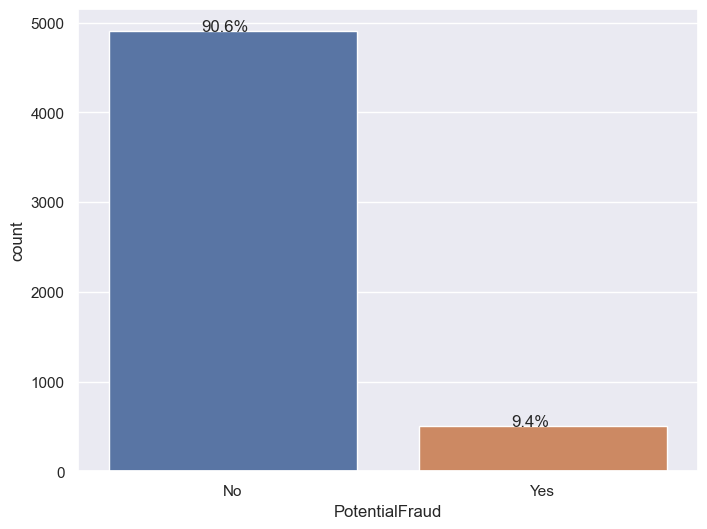

In [12]:
# check the distribution of train data
plt.figure(figsize=(8,6))
ax=sns.countplot(data=train,x='PotentialFraud')
for i in ax.patches:
        percentage='{:.1f}%'.format(100*i.get_height()/len(train))
        x=i.get_x()+i.get_width()/2-0.1
        y=i.get_y()+i.get_height()
        ax.annotate(percentage,(x,y),size=12)
plt.xticks()
plt.show()
# we can see that the data is highly imbalance and we have 90.6% of the provider which are not fraud and 
# remaining 9.4% of the providers are fraud.

### Analyse the beneficiary data

In [13]:
bene_train_df.info()
# There are many null values in DOD column
# we have 4 categorical variable and remaining all are int type
# Probably DOD-Date of death is blank as those persons are alive and not dead, so we need to handle it.
# DOB/DOB are in object format so we need to convert it to Date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [14]:
bene_test_df.info()
# There are many null values in DOD column
# we have 4 categorical variable and remaining all are int type
# Probably DOD-Date of death is blank as those persons are alive and not dead, so we need to handle it.
# DOB/DOB are in object format so we need to convert it to Date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [15]:
bene_train_df.isnull().sum()
# 137135 records are having a null value in DOD(Date of Deadth) column out of 138556 records
# The reasoning for this many NAN can be that these patients are still alive. So we need to handle this column. We should not drop it
# We will be adding a new column with dead/alive category. So it makes more sense.

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [16]:
bene_train_df.isnull().sum()/len(bene_train_df)*100
# Only DOD column we need to handle

BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [17]:
bene_test_df.isnull().sum()/len(bene_test_df)*100
# Only DOD column we need to handle for test_beneficiary data as well.

BeneID                              0.000000
DOB                                 0.000000
DOD                                99.102676
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

#### Total Unique Beneficiaries in the Data

In [18]:
print('Total unique train Beneficiary IDs:',bene_train_df['BeneID'].nunique())
print('Total unique test Beneficiary IDs:',bene_test_df['BeneID'].nunique())
#we can say that all records are unique in train and test. we can check for duplicates as well

Total unique train Beneficiary IDs: 138556
Total unique test Beneficiary IDs: 63968


In [19]:
bene_train_df['BeneID'].duplicated().any(),bene_test_df['BeneID'].duplicated().any()
# So we can say there are no duplicate beneficiary ID

(False, False)

In [20]:
bene_train_df['Gender'].value_counts()
# we can see that we have 1,2 in gender fields, we will change it to 0 and 1 for better Data manipulation and model building

2    79106
1    59450
Name: Gender, dtype: int64

In [21]:
bene_test_df['Gender'].value_counts()
# We need to change it as well

2    36721
1    27247
Name: Gender, dtype: int64

In [22]:
# changing the gender value for 1,2 to 0,1     # 2 if female   1-Male
bene_train_df['Gender']=bene_train_df['Gender'].apply(lambda val: 0 if val==2 else 1)
bene_test_df['Gender']=bene_test_df['Gender'].apply(lambda val: 0 if val==2 else 1)

In [23]:
bene_train_df['Gender'].value_counts()
bene_test_df['Gender'].value_counts()

0    36721
1    27247
Name: Gender, dtype: int64

In [24]:
# See how many unique value columns contains:
print(bene_train_df.nunique())
print('*****************************************************************')
print(bene_test_df.nunique())

BeneID                             138556
DOB                                   900
DOD                                    11
Gender                                  2
Race                                    4
RenalDiseaseIndicator                   2
State                                  52
County                                314
NoOfMonths_PartACov                    13
NoOfMonths_PartBCov                    13
ChronicCond_Alzheimer                   2
ChronicCond_Heartfailure                2
ChronicCond_KidneyDisease               2
ChronicCond_Cancer                      2
ChronicCond_ObstrPulmonary              2
ChronicCond_Depression                  2
ChronicCond_Diabetes                    2
ChronicCond_IschemicHeart               2
ChronicCond_Osteoporasis                2
ChronicCond_rheumatoidarthritis         2
ChronicCond_stroke                      2
IPAnnualReimbursementAmt             3004
IPAnnualDeductibleAmt                 147
OPAnnualReimbursementAmt          

In [25]:
# function to plot countplots
def plot_count_plot(DF,feature,figsize=(10,6),hue=None):
    plt.figure(figsize=figsize)
    ax=sns.countplot(data=DF,x=feature,hue=hue)
    for i in ax.patches:
        percentage='{:.1f}%'.format(100*i.get_height()/len(DF))
        x=i.get_x()+i.get_width()/2-0.1
        y=i.get_y()+i.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()
    print('Number of records of each Category is:')
    print(DF[feature].value_counts())
    

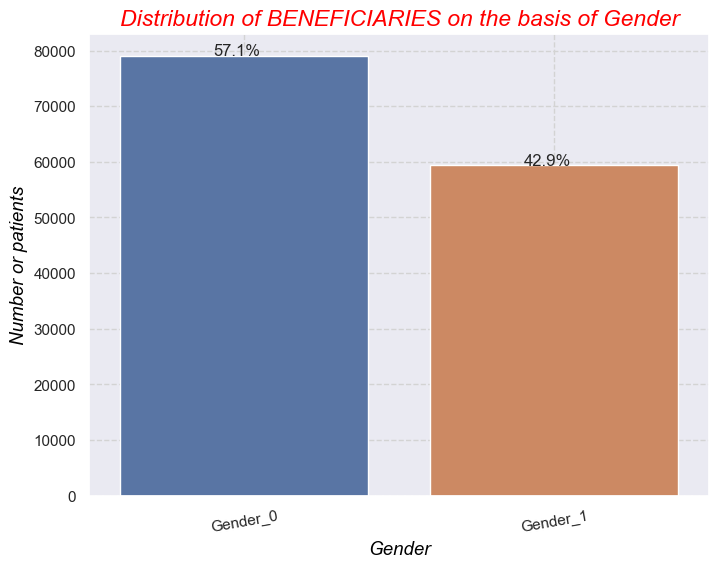

Number of records of each Category is:
0    79106
1    59450
Name: Gender, dtype: int64


In [26]:
# Plotting the train Data
plt.figure(figsize=(8,6))
ax=sns.countplot(data=bene_train_df,x='Gender')
for i in ax.patches:
    percentage='{:.1f}%'.format(100*i.get_height()/len(bene_train_df))
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
plt.xlabel("Gender", fontdict=label_font_dict)
plt.xticks(labels=["Gender_0","Gender_1"], ticks=[0,1], rotation=10)
plt.ylabel("Number or patients", fontdict=label_font_dict)
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of BENEFICIARIES on the basis of Gender", fontdict=title_font_dict)
plt.show()
print('Number of records of each Category is:')
print(bene_train_df['Gender'].value_counts())


# we can conclude that the ratio between gender 0 to gender1 is 57:1%

In [27]:
bene_train_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

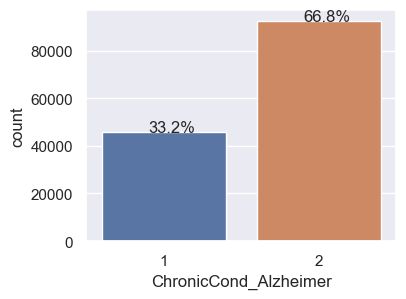

Number of records of each Category is:
2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64


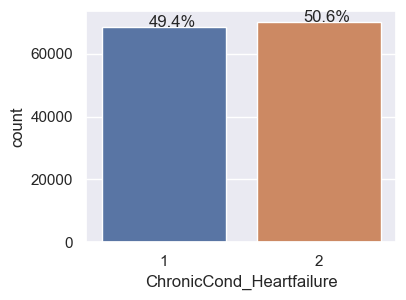

Number of records of each Category is:
2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64


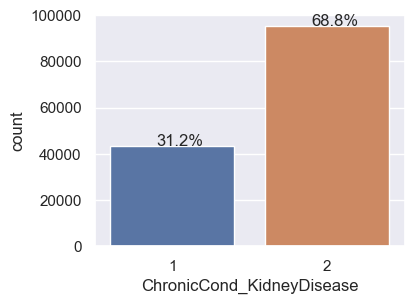

Number of records of each Category is:
2    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64


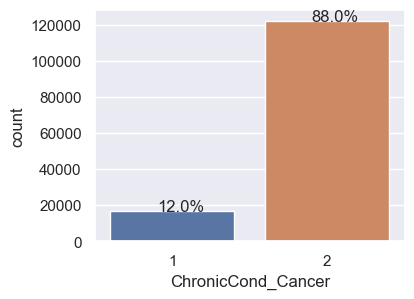

Number of records of each Category is:
2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64


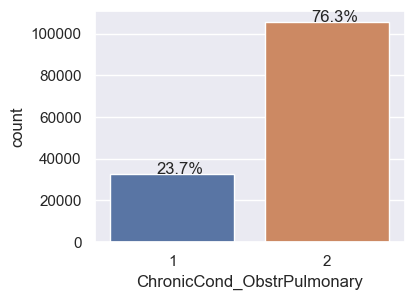

Number of records of each Category is:
2    105697
1     32859
Name: ChronicCond_ObstrPulmonary, dtype: int64


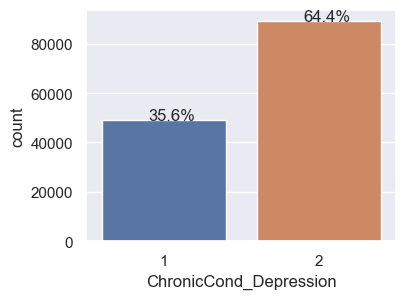

Number of records of each Category is:
2    89296
1    49260
Name: ChronicCond_Depression, dtype: int64


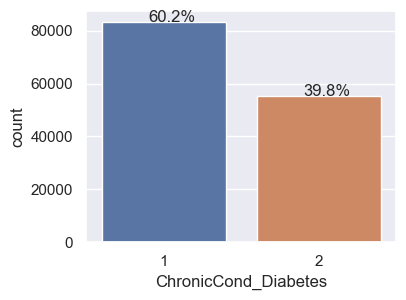

Number of records of each Category is:
1    83391
2    55165
Name: ChronicCond_Diabetes, dtype: int64


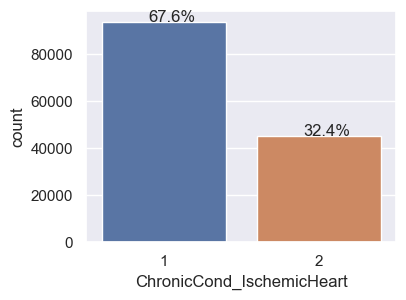

Number of records of each Category is:
1    93644
2    44912
Name: ChronicCond_IschemicHeart, dtype: int64


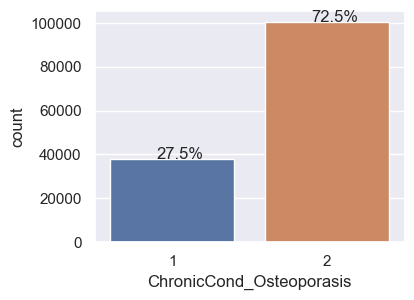

Number of records of each Category is:
2    100497
1     38059
Name: ChronicCond_Osteoporasis, dtype: int64


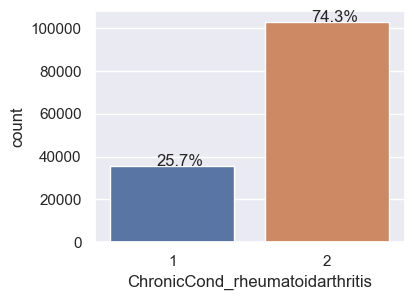

Number of records of each Category is:
2    102972
1     35584
Name: ChronicCond_rheumatoidarthritis, dtype: int64


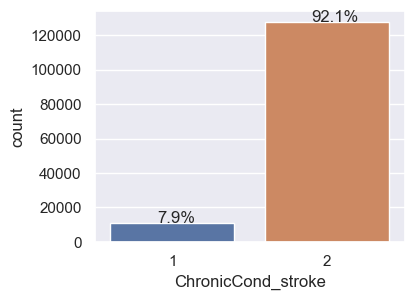

Number of records of each Category is:
2    127602
1     10954
Name: ChronicCond_stroke, dtype: int64


In [28]:
# Plotting countplots for ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
#'ChronicCond_Cancer','ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 
#'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
#to understand the distribution of data
cols=['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer',
      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
for values in cols:
    plot_count_plot(bene_train_df,values,figsize=(4,3))
# Al these columns we need to update 1,2 with 0,1 as ot will be easier to build model with 0,1
# Other observations
#'ChronicCond_Alzheimer'--33.2% have chronic alzheimer and 66.8% does not have
#'ChronicCond_Heartfailure'--49.4% have faced heart failure atleast once rest zero time
# 'ChronicCond_KidneyDisease'--31% have kidney Disease
# 'ChronicCond_Cancer'--12% have cancer
# 'ChronicCond_ObstrPulmonary'--24% have ObstrPulmonary
# 'ChronicCond_Depression'--36 % of the patients have depression
# 'ChronicCond_Diabetes'--60% of the patients are diabetic
# 'ChronicCond_IschemicHeart'-- 68% of the patients have IschemicHeart
# 'ChronicCond_Osteoporasis'--28% of the ;patients have Osteoporasis
# 'ChronicCond_rheumatoidarthritis'--26% of the patients have rheumatoidarthritis
# 'ChronicCond_stroke'-- 8% of the patients hav efaced a chronic stroke.

In [29]:
# we will change above values from 1,2 to 1,0
bene_train_df=bene_train_df.replace({'ChronicCond_Alzheimer':2, 'ChronicCond_Heartfailure':2,
                                     'ChronicCond_KidneyDisease':2,'ChronicCond_Cancer':2,'ChronicCond_ObstrPulmonary':2,
                                     'ChronicCond_Depression':2,'ChronicCond_Diabetes':2, 'ChronicCond_IschemicHeart':2,
                                     'ChronicCond_Osteoporasis':2, 'ChronicCond_rheumatoidarthritis':2,
                                     'ChronicCond_stroke':2},0)
bene_test_df=bene_test_df.replace({'ChronicCond_Alzheimer':2, 'ChronicCond_Heartfailure':2,
                                     'ChronicCond_KidneyDisease':2,'ChronicCond_Cancer':2,'ChronicCond_ObstrPulmonary':2,
                                     'ChronicCond_Depression':2,'ChronicCond_Diabetes':2, 'ChronicCond_IschemicHeart':2,
                                     'ChronicCond_Osteoporasis':2, 'ChronicCond_rheumatoidarthritis':2,
                                     'ChronicCond_stroke':2},0)

In [30]:
bene_train_df[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer',
      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']].nunique()

ChronicCond_Alzheimer              2
ChronicCond_Heartfailure           2
ChronicCond_KidneyDisease          2
ChronicCond_Cancer                 2
ChronicCond_ObstrPulmonary         2
ChronicCond_Depression             2
ChronicCond_Diabetes               2
ChronicCond_IschemicHeart          2
ChronicCond_Osteoporasis           2
ChronicCond_rheumatoidarthritis    2
ChronicCond_stroke                 2
dtype: int64

In [31]:
bene_test_df[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer',
      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']].nunique()

ChronicCond_Alzheimer              2
ChronicCond_Heartfailure           2
ChronicCond_KidneyDisease          2
ChronicCond_Cancer                 2
ChronicCond_ObstrPulmonary         2
ChronicCond_Depression             2
ChronicCond_Diabetes               2
ChronicCond_IschemicHeart          2
ChronicCond_Osteoporasis           2
ChronicCond_rheumatoidarthritis    2
ChronicCond_stroke                 2
dtype: int64

In [32]:
cols=['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer',
      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
print('Train beneficiary Chronic conditions details')
for values in cols:
    print(bene_train_df[values].value_counts())
    print('*********************************************************')
print("\n***************************************************************************************************************")
print('Test beneficiary Chronic conditions details')
for values in cols:
    print(bene_test_df[values].value_counts())
    print('*********************************************************')
# we can see that all formatting done and now all are 0,1

Train beneficiary Chronic conditions details
0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64
*********************************************************
0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64
*********************************************************
0    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64
*********************************************************
0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64
*********************************************************
0    105697
1     32859
Name: ChronicCond_ObstrPulmonary, dtype: int64
*********************************************************
0    89296
1    49260
Name: ChronicCond_Depression, dtype: int64
*********************************************************
1    83391
0    55165
Name: ChronicCond_Diabetes, dtype: int64
*********************************************************
1    93644
0    44912
Name: ChronicCond_IschemicHeart, dtype: int64
********************

In [33]:
# Currently DOB/DOD column is coming as object type. So we will convert it to Date type 
bene_train_df['DOD']=pd.to_datetime(bene_train_df['DOD'])
bene_train_df['DOB']=pd.to_datetime(bene_train_df['DOB'])
bene_test_df['DOD']=pd.to_datetime(bene_test_df['DOD'])
bene_test_df['DOB']=pd.to_datetime(bene_test_df['DOB'])
bene_train_df.head()

BeneID        DOB DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 NaT       1     1                     0     39   
1  BENE11002 1936-09-01 NaT       0     1                     0     39   
2  BENE11003 1936-08-01 NaT       1     1                     0     52   
3  BENE11004 1922-07-01 NaT       1     1                     0     39   
4  BENE11005 1935-09-01 NaT       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      0   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         0                          0                   0   
2                         0                          0                   0   
3                         1                          0                   0   
4                         0                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     0   
2                           0                       0                     0   
3                           0                       0                     1   
4                           1                       0                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         0   
2                          1                         0   
3                          1                         1   
4                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   
2                                0                   0   
3                                1                   0   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [34]:
bene_test_df.head()

BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01        NaT       1     1                     0     39   
1  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   
2  BENE11010 1936-07-01        NaT       0     1                     0     41   
3  BENE11011 1914-03-01        NaT       0     2                     0      1   
4  BENE11014 1938-04-01        NaT       0     1                     Y     45   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     610                   12                   12                      1   
2      30                   12                   12                      0   
3     360                   12                   12                      0   
4     780                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         1                          0                   0   
2                         1                          0                   1   
3                         1                          1                   0   
4                         1                          1                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     1   
2                           1                       0                     1   
3                           0                       1                     1   
4                           1                       1                     0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         1   
2                          1                         1   
3                          0                         0   
4                          1                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   
2                                0                   0   
3                                1                   1   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   
2                         0                      0                      1170   
3                      5000                   1068                       250   
4                     21260                   2136                       120   

   OPAnnualDeductibleAmt  
0                     70  
1                    160  
2                    660  
3                    320  
4                    100

In [35]:
print(bene_train_df.info())
print('***************************************************************************************')
print(bene_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [36]:
# Adding a new column Dead or Alive on the basis of DOD column as we can see that only 1421 records have DOD value and 
#rest are not null which means that those patients are alive
# possible reasoning could be to see if we are getting more fraud claims for dead patients


In [37]:
bene_train_df['Whether_Dead']=bene_train_df['DOD'].apply(lambda val:0 if val!=val else 1)
bene_test_df['Whether_Dead']=bene_test_df['DOD'].apply(lambda val:0 if val!=val else 1)

In [38]:
bene_train_df['Whether_Dead'].value_counts()
# 1-Dead and 0- Not Dead

0    137135
1      1421
Name: Whether_Dead, dtype: int64

In [39]:
bene_test_df['Whether_Dead'].value_counts()
# 1-Dead and 0- Not Dead

0    63394
1      574
Name: Whether_Dead, dtype: int64

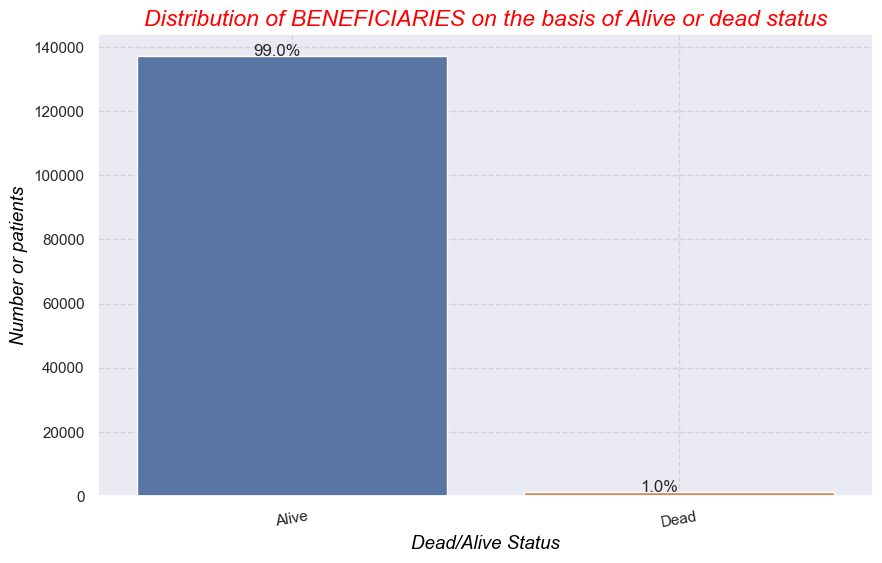

Number of records of each Category is:
0    137135
1      1421
Name: Whether_Dead, dtype: int64


In [40]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=bene_train_df,x='Whether_Dead')
for i in ax.patches:
    percentage='{:.1f}%'.format(100*i.get_height()/len(bene_train_df))
    x=i.get_x()+i.get_width()/2-0.1
    y=i.get_y()+i.get_height()
    ax.annotate(percentage,(x,y),size=12)
plt.xlabel("Dead/Alive Status", fontdict=label_font_dict)
plt.xticks(labels=["Alive","Dead"], ticks=[0,1], rotation=10)
plt.ylabel("Number or patients", fontdict=label_font_dict)
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of BENEFICIARIES on the basis of Alive or dead status", fontdict=title_font_dict)
plt.show()
print('Number of records of each Category is:')
print(bene_train_df['Whether_Dead'].value_counts())
# we can see that only 1 % of the patients are dead 

In [41]:
# we can see that there are many values in DOD(Date of Death) column which are NULL, it means that those patients are still alive.
print("Max date of death inn train data is:", bene_train_df['DOD'].max())
print("Max date of death inn test data is:", bene_test_df['DOD'].max())
# the max date is 2009-12-01 which means that we have data near to that date only. FOr analysis purpose we will consider it end date

Max date of death inn train data is: 2009-12-01 00:00:00
Max date of death inn test data is: 2009-12-01 00:00:00


In [42]:
# so we will fill all NAN Dates with max DOD date for analysis puprpose 
#as we can't drop this column beacuse we will need it to calculate age and age is a significant column
bene_train_df['DOD']=bene_train_df['DOD'].fillna(bene_train_df['DOD'].max())
print(bene_train_df['DOD'].isnull().sum())
bene_test_df['DOD']=bene_test_df['DOD'].fillna(bene_test_df['DOD'].max())
print(bene_test_df['DOD'].isnull().sum())

0
0


In [43]:
bene_train_df['DOD'].value_counts()

2009-12-01    137317
2009-10-01       168
2009-09-01       164
2009-11-01       149
2009-08-01       144
2009-07-01       141
2009-05-01       119
2009-06-01       119
2009-04-01        94
2009-03-01        91
2009-02-01        50
Name: DOD, dtype: int64

In [44]:
import datetime as dt

In [45]:
# Now we will calculate the age
bene_train_df['Age']=np.round(((bene_train_df['DOD']-bene_train_df['DOB']).dt.days)/365,1)
bene_test_df['Age']=np.round(((bene_test_df['DOD']-bene_test_df['DOB']).dt.days)/365,1)

In [46]:
bene_train_df.head(2)

BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 2009-12-01       1     1                     0     39   
1  BENE11002 1936-09-01 2009-12-01       0     1                     0     39   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         0                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   

   OPAnnualDeductibleAmt  Whether_Dead   Age  
0                     70             0  67.0  
1                     50             0  73.3

In [47]:
bene_test_df.head(2)

BeneID        DOB        DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001 1943-01-01 2009-12-01       1     1                     0     39   
1  BENE11007 1940-09-01 2009-12-01       1     2                     0     45   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     610                   12                   12                      1   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         1                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   

   OPAnnualDeductibleAmt  Whether_Dead   Age  
0                     70             0  67.0  
1                    160             1  69.3

In [48]:
print(bene_train_df.info())
print('********************************************************************')
print(bene_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              138556 non-null  datetime64[ns]
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [49]:
# Dropping the DOD column as we already created a whether Dead column specific to same info
bene_train_df.drop(['DOD'],axis=1,inplace=True)
bene_test_df.drop(['DOD'],axis=1,inplace=True)

In [50]:
# RenalDiseaseIndicator contains 0 and Y as va;lues so changin g it to 0 and 1
bene_train_df['RenalDiseaseIndicator']=bene_train_df['RenalDiseaseIndicator'].map({'0':0,"Y":1})
bene_test_df['RenalDiseaseIndicator']=bene_test_df['RenalDiseaseIndicator'].map({'0':0,"Y":1})

In [51]:
print(bene_train_df.info())
print('********************************************************************')
print(bene_test_df.info())
# Noe all columns are in numerical format and no null values for both train and test beneficiary data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   Gender                           138556 non-null  int64         
 3   Race                             138556 non-null  int64         
 4   RenalDiseaseIndicator            138556 non-null  int64         
 5   State                            138556 non-null  int64         
 6   County                           138556 non-null  int64         
 7   NoOfMonths_PartACov              138556 non-null  int64         
 8   NoOfMonths_PartBCov              138556 non-null  int64         
 9   ChronicCond_Alzheimer            138556 non-null  int64         
 10  ChronicCond_Heartfailure         138556 non-

<BarContainer object of 52 artists>


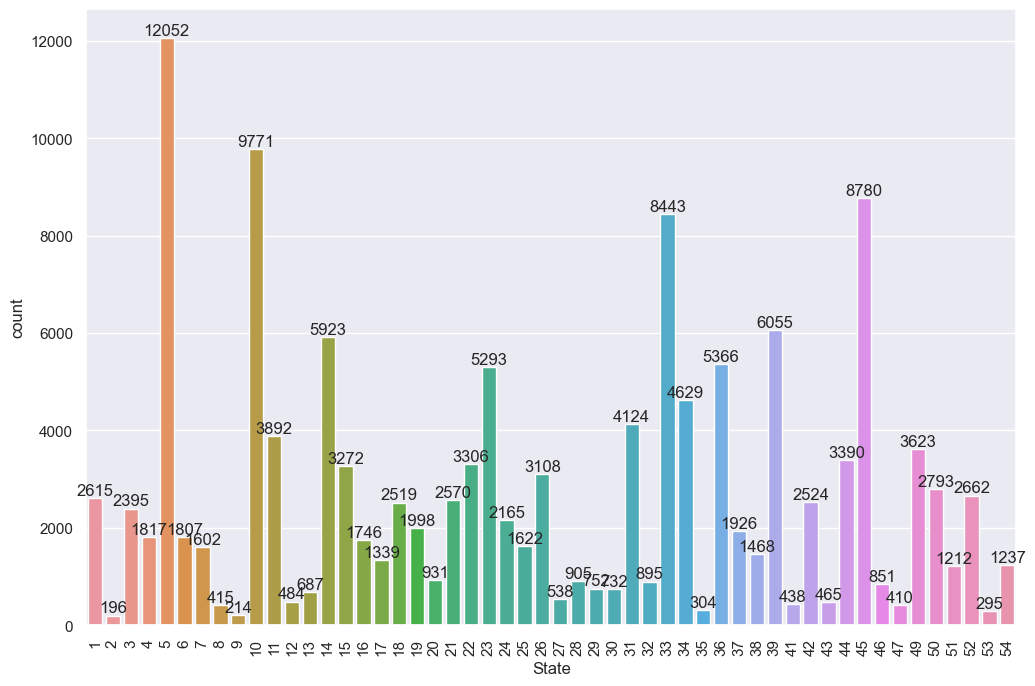

In [52]:
# Distribution of number of patients on the basis of state
plt.figure(figsize=(12,8))
ax=sns.countplot(data=bene_train_df,x='State')
for i in ax.containers:
    print(i)
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.show()
# the no of beneficiary varies from state to state. However we have the maximum number of beneficiary from state 5.
# one thing we can se eat a later point is if only few states are generating frauds claims

<BarContainer object of 45 artists>


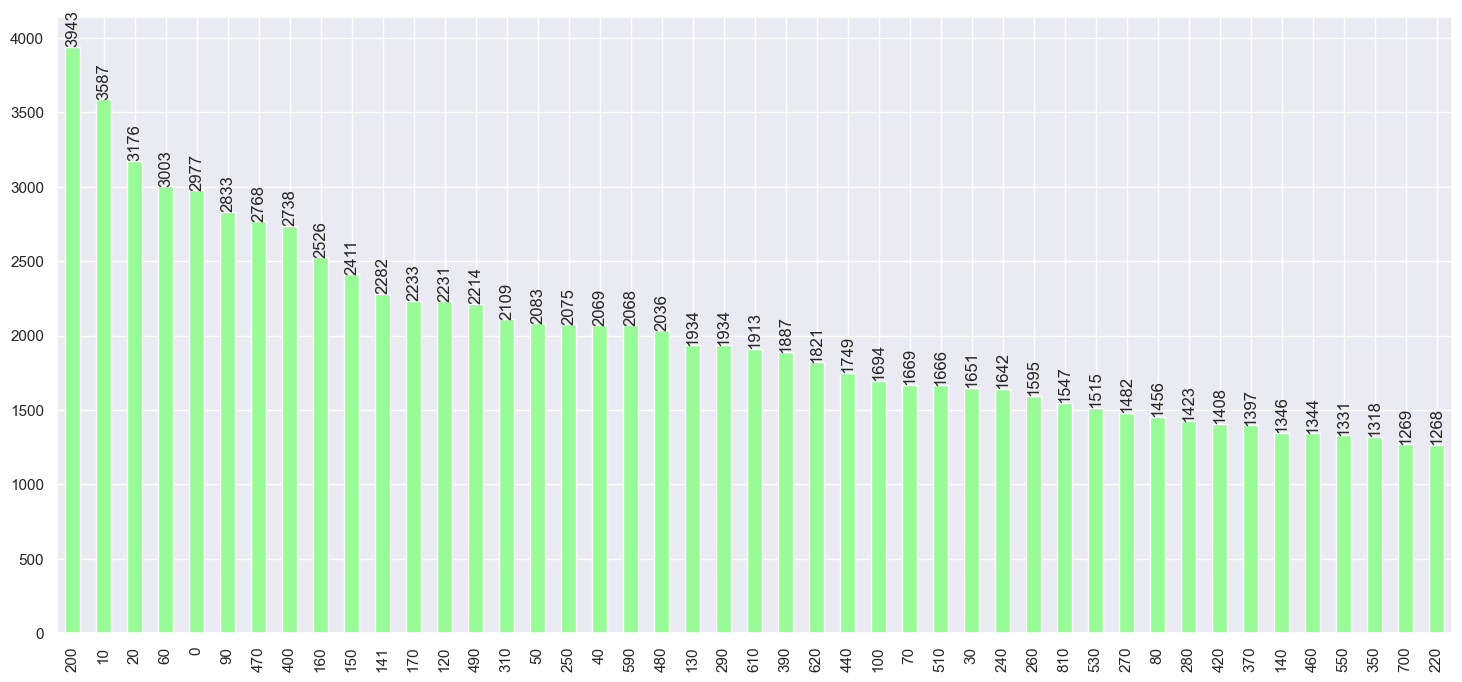

In [53]:
# Distribution of number of patients on the basis of state
plt.figure(figsize=(18,8))
fig = bene_train_df['County'].value_counts()[0:45].plot(kind='bar', color='palegreen')
for i in fig.containers:
    print(i)
    fig.bar_label(i,rotation=90,)
plt.xticks(rotation=90)
plt.show()
#Some counties are having very high number of beneficiaries and others have very less.
# one thing we must see is if there are any county codes generating more number of frauds.

In [54]:
bene_train_df['County'].value_counts()

200    3943
10     3587
20     3176
60     3003
0      2977
       ... 
742       1
117       1
834       1
753       1
521       1
Name: County, Length: 314, dtype: int64

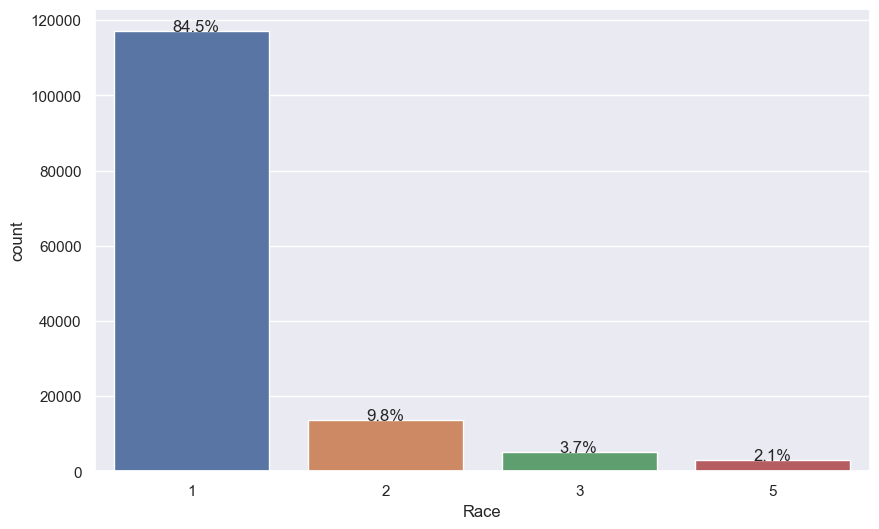

Number of records of each Category is:
1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64


In [55]:
plot_count_plot(bene_train_df,'Race')
# the data is highly imbal;nced as we can see that almost 84.5% of the train data is from race-1 and remaining
# 15% is splitted into 2,3,4 race. 

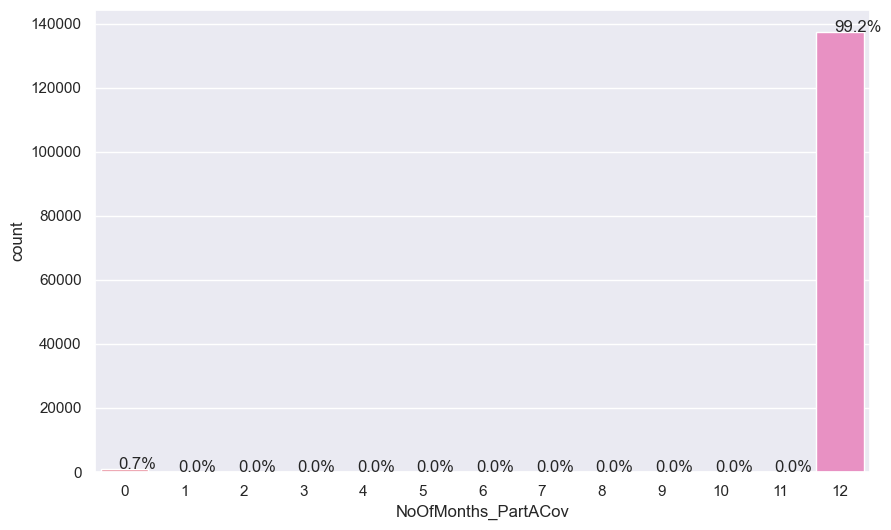

Number of records of each Category is:
12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: NoOfMonths_PartACov, dtype: int64


In [56]:
plot_count_plot(bene_train_df,'NoOfMonths_PartACov')
# almost 99.2% of the patients have 12 months of medicare PartA coverage
# medicare Part A- means hospital/IP coverage 
# MOstly this field should not have any impact on our target variable

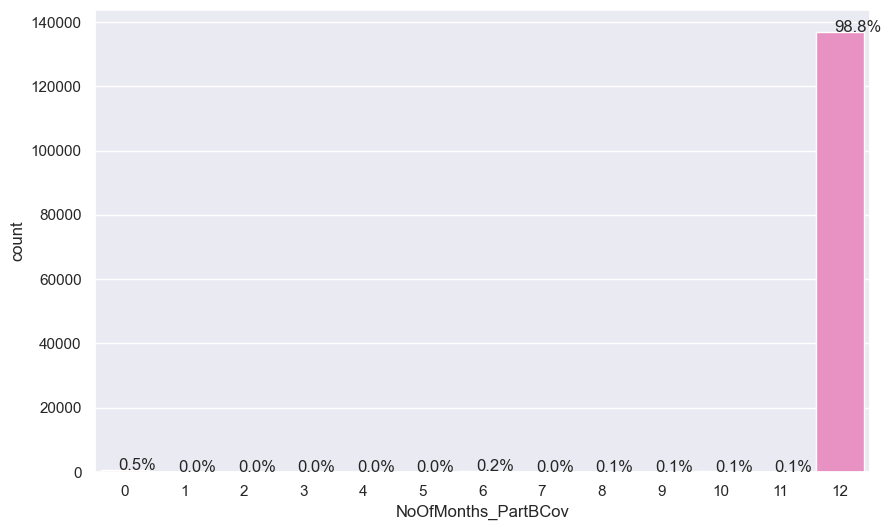

Number of records of each Category is:
12    136902
0        675
6        282
10       150
11       143
9        122
8         71
7         63
5         50
4         35
3         27
2         19
1         17
Name: NoOfMonths_PartBCov, dtype: int64


In [57]:
plot_count_plot(bene_train_df,'NoOfMonths_PartBCov')
# almost 98.8% of the patients have 12 months of medicare PartB coverage
## medicare Part B- means medical/Outpatient coverage
## apart from this we also have part C and part D- 
#Part C includes most of Part A (Hospital Insurance) and Part B (Medical Insurance) coverage and typically offer extra benefits such as vison, hearing and dental care .
# Part D is from provides prescription drug coverage.
# MOstly this field should not have any impact on our target variable

In [58]:
# Lets plot the patient distribution wrt year of birth
df_year_of_birth=pd.DataFrame()
df_year_of_birth['Year']=bene_train_df['DOB'].dt.year
df_year_of_birth.head()

Year
0  1943
1  1936
2  1936
3  1922
4  1935

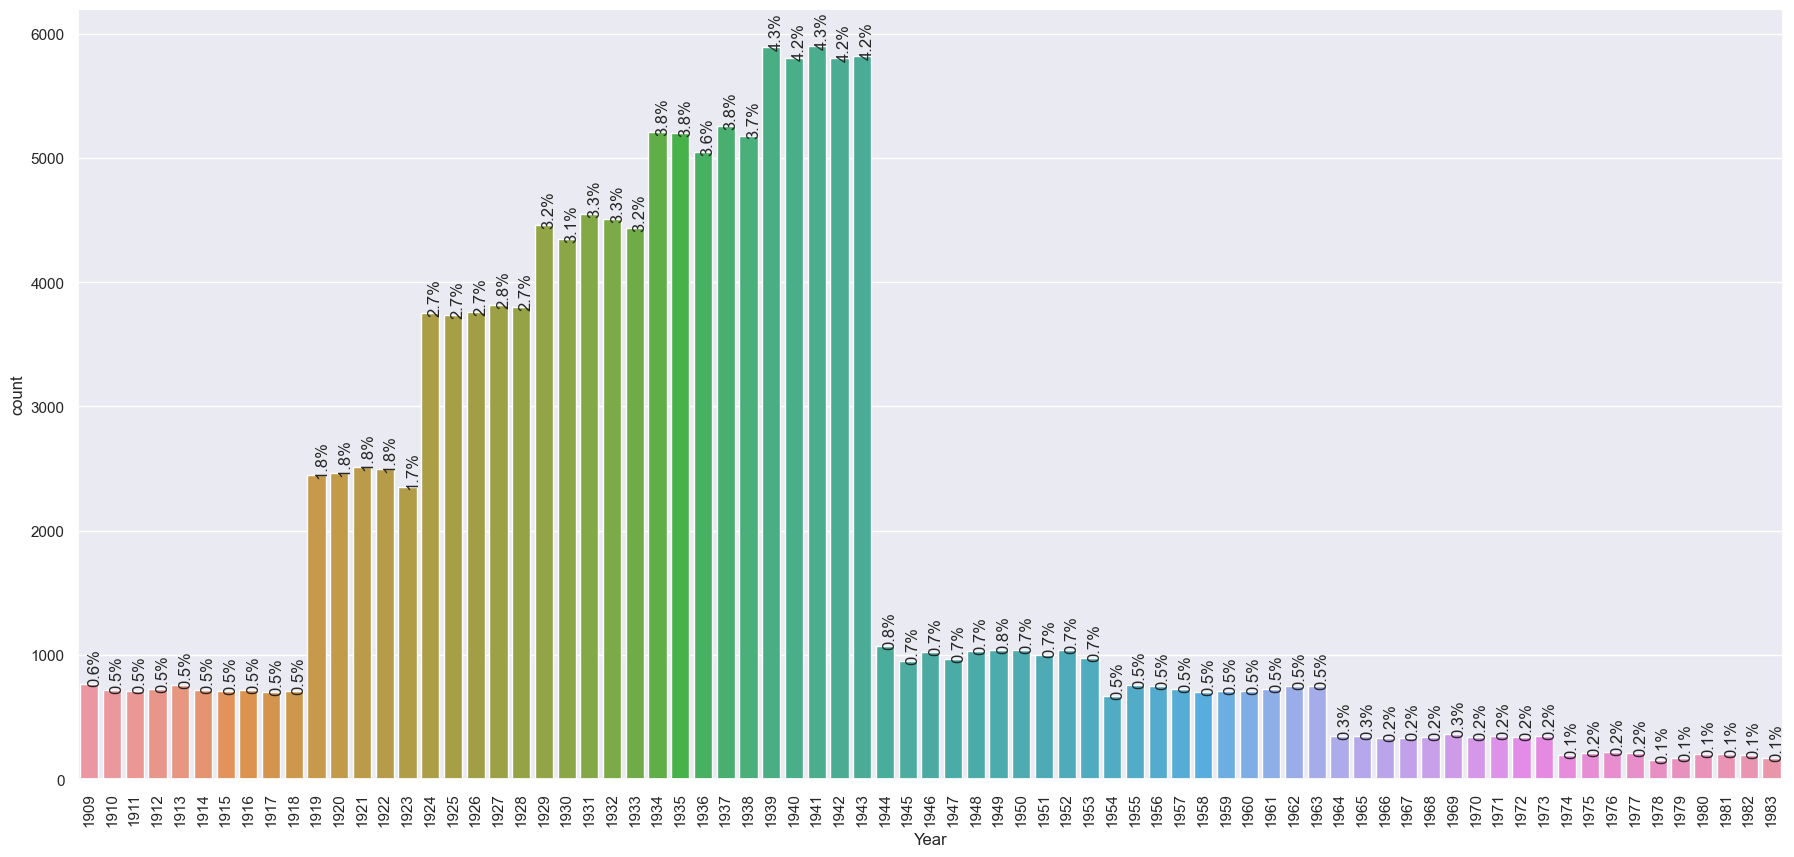

In [59]:
plt.figure(figsize=(22,10))
ax=sns.countplot(data=df_year_of_birth,x='Year')
for i in ax.patches:
        percentage='{:.1f}%'.format(100*i.get_height()/len(df_year_of_birth))
        x=i.get_x()+i.get_width()/2-0.1
        y=i.get_y()+i.get_height()
        ax.annotate(percentage,(x,y),size=12,rotation=90)
plt.xticks(rotation=90)
plt.show()
# we can see that majority of the the beneficiaries are from 1919 to 1943
# this is hjustified by the fact that normallly only people above 65 or more age can take medicare.

<AxesSubplot: xlabel='Age', ylabel='Count'>

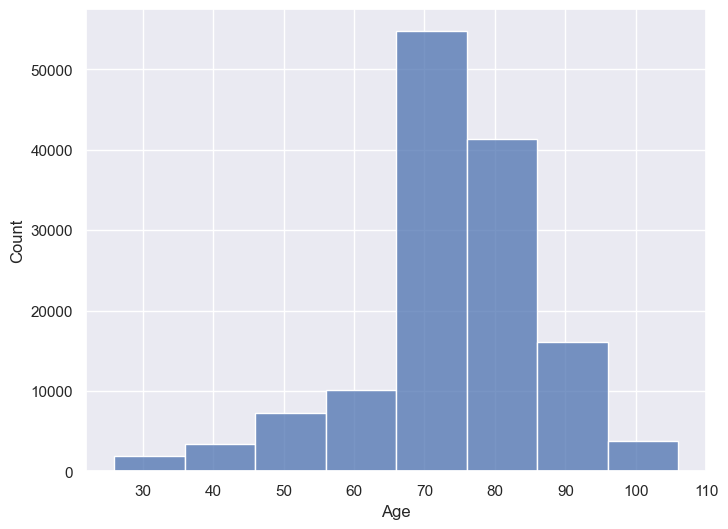

In [60]:
plt.figure(figsize=(8,6))
sns.histplot(data=bene_train_df,x='Age',bins=8,binwidth=10)
# mpst of the patients are between 65 to 95 age

### Analyse the train/test IP Data 

In [61]:
ip_train_df.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN

In [62]:
ip_test_df.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-09-09                  5789             1068.0   
1            NaN  2008-12-25                  5939             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-09-16                332               5780               5533   
1  2009-01-08                661               1889              41071   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0                496               V420              40390               2851   
1               5990               5601               4588               5845   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               5990                570              41071   
1               4549              29570              34831   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                4280              4443.0              5849.0   
1                 NaN              5551.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN

In [63]:
print("Shape of IP train data:",ip_train_df.shape)
print("Shape of IP test data:",ip_test_df.shape)

Shape of IP train data: (40474, 30)
Shape of IP test data: (9551, 30)


In [64]:
# check for datatypes 
print("Info of IP train data:",ip_train_df.info())
print('************************************************************************')
print("Info of IP test data:",ip_test_df.info())
# we have many fetures with object type which we may need to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [65]:
# check for null values 
print("Null values in IP train data:",ip_train_df.isnull().sum()/len(ip_train_df)*100)
print('************************************************************************')
print("Null values in IP test data:",ip_test_df.isnull().sum()/len(ip_test_df)*100)

Null values in IP train data: BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProce

In [66]:
# AdmissionDt and DischargeDt are object type so we will convert it to date format 
#and then we will use these features to calculate lduration of stay
# Train Dataset
ip_train_df['AdmissionDt']=pd.to_datetime(ip_train_df['AdmissionDt'],format = '%Y-%m-%d')
ip_train_df['DischargeDt']=pd.to_datetime(ip_train_df['DischargeDt'],format = '%Y-%m-%d')
ip_train_df['AdmitDays']=((ip_train_df['DischargeDt']-ip_train_df['AdmissionDt']).dt.days)+1

# Test Dataset
ip_test_df['AdmissionDt']=pd.to_datetime(ip_test_df['AdmissionDt'],format = '%Y-%m-%d')
ip_test_df['DischargeDt']=pd.to_datetime(ip_test_df['DischargeDt'],format = '%Y-%m-%d')
ip_test_df['AdmitDays']=((ip_test_df['DischargeDt']-ip_test_df['AdmissionDt']).dt.days)+1

In [67]:
ip_train_df.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ... ClmDiagnosisCode_3  \
0  2009-04-18                201               1970  ...               5853   
1  2009-09-02                750               6186  ...              56400   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               7843               2768              71590               2724   
1                NaN                NaN                NaN                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0              19889               5849                 NaN   
1                NaN                NaN                 NaN   

  ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                NaN                 NaN                 NaN   
1             7092.0                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  AdmitDays  
0                 NaN                 NaN                 NaN          7  
1                 NaN                 NaN                 NaN          3  

[2 rows x 31 columns]

In [68]:
ip_test_df.head(2)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-09-09                  5789             1068.0   
1            NaN  2008-12-25                  5939             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  ... ClmDiagnosisCode_3  \
0  2009-09-16                332               5780  ...                496   
1  2009-01-08                661               1889  ...               5990   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               V420              40390               2851               5990   
1               5601               4588               5845               4549   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                570              41071                4280   
1              29570              34831                 NaN   

  ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0             4443.0              5849.0                 NaN   
1             5551.0                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  AdmitDays  
0                 NaN                 NaN                 NaN          8  
1                 NaN                 NaN                 NaN         15  

[2 rows x 31 columns]

In [69]:
# check for min and max length of stay
print("Min AdmitDays for train IP Data",ip_train_df['AdmitDays'].min())
print("Max AdmitDays for train IP Data",ip_train_df['AdmitDays'].max())

print("Min AdmitDays for test IP Data",ip_test_df['AdmitDays'].min())
print("Max AdmitDays for test IP Data",ip_test_df['AdmitDays'].max())


Min AdmitDays for train IP Data 1
Max AdmitDays for train IP Data 36
Min AdmitDays for test IP Data 1
Max AdmitDays for test IP Data 36


### Analyse the train/test OP Data 

In [70]:
op_train_df.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                 56409  
1                  0                 79380

In [71]:
op_test_df.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0      PHY347633              V5832              V5861               2724   
1      PHY381777               9594              E9174               4019   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               3182              V5869              42731                NaN   
1                NaN                NaN                NaN                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                   NaN  
1                  0                   NaN

In [72]:
print("Shape of OP train data:",op_train_df.shape)
print("Shape of OP test data:",op_test_df.shape)

Shape of OP train data: (517737, 27)
Shape of OP test data: (125841, 27)


In [73]:
# check for datatypes 
print("Info of OP train data:",op_train_df.info())
print('************************************************************************')
print("Info of OP test data:",op_test_df.info())
# we have many fetures with object type which we may need to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [74]:
# check for null values 
print("Null values in OP train data:\n",op_train_df.isnull().sum()/len(op_train_df)*100)
print('************************************************************************')
print("Null values in OP test data:\n",op_test_df.isnull().sum()/len(op_test_df)*100)

# we have many null values in the OP data

Null values in OP train data:
 BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmi

## Data Merging

In [75]:
print("Features in Inpatient Train data", ip_train_df.columns)
print("Features in outpatient Train data", op_train_df.columns)

Features in Inpatient Train data Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitDays'],
      dtype='object')
Features in outpatient Train data Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'C

In [76]:
# we can see most of the features are commen only 3 are different i.e AdmissionDt,DischargeDt,DiagnosisGroupCode
# so we will merge these datsets 
# we will use all as keys in outpatient data as we dont want duplicate columns 
train_allpatient_df=pd.merge(op_train_df,ip_train_df,left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],how='outer')
test_allpatient_df=pd.merge(op_test_df,ip_test_df,left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],how='outer')

In [77]:
print('Shape of train all patient data',train_allpatient_df.shape)
print('Shape of test all patient data',test_allpatient_df.shape)

Shape of train all patient data (558211, 31)
Shape of test all patient data (135392, 31)


In [78]:
print("Unique BeneID in train allpatient data", train_allpatient_df['BeneID'].nunique())
print("Unique BeneID in train Beneficiary data", bene_train_df['BeneID'].nunique())
print("Unique BeneID in test allpatient data", test_allpatient_df['BeneID'].nunique())
print("Unique BeneID in test Beneficiary data", bene_test_df['BeneID'].nunique())
# all numbers are matching so we will merge the data with beneficiary data

Unique BeneID in train allpatient data 138556
Unique BeneID in train Beneficiary data 138556
Unique BeneID in test allpatient data 63968
Unique BeneID in test Beneficiary data 63968


### Merging the all patients data with benficiary data


In [79]:
# we will merge on the bais of beneID
train_allclaim_df=pd.merge(train_allpatient_df,bene_train_df,left_on='BeneID',right_on='BeneID',how='inner')
test_allclaim_df=pd.merge(test_allpatient_df,bene_test_df,left_on='BeneID',right_on='BeneID',how='inner')
print('Shape of All claim train data:',train_allclaim_df.shape)
print('Shape of All claim test data:',test_allclaim_df.shape)

Shape of All claim train data: (558211, 56)
Shape of All claim test data: (135392, 56)


In [80]:
train_allclaim_df.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  ...  \
0                NaN                NaN                NaN  ...   
1                NaN                NaN                NaN  ...   

  ChronicCond_KidneyDisease ChronicCond_Cancer ChronicCond_ObstrPulmonary  \
0                         0                  0                          0   
1                         0                  0                          0   

  ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                      0                     0                          0   
1                      0                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                0   
1                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   0                         0                      0   
1                   0                         0                      0   

  OPAnnualReimbursementAmt OPAnnualDeductibleAmt Whether_Dead   Age  
0                       30                    50            0  73.3  
1                       90                    40            0  73.4  

[2 rows x 56 columns]

In [81]:
test_allclaim_df.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0      PHY347633              V5832              V5861               2724   
1      PHY381777               9594              E9174               4019   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  ...  \
0               3182              V5869              42731  ...   
1                NaN                NaN                NaN  ...   

  ChronicCond_KidneyDisease ChronicCond_Cancer ChronicCond_ObstrPulmonary  \
0                         1                  0                          0   
1                         1                  0                          0   

  ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                      1                     1                          1   
1                      1                     1                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                1   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   1                     36000                   3204   

  OPAnnualReimbursementAmt OPAnnualDeductibleAmt Whether_Dead   Age  
0                       60                    70            0  67.0  
1                       60                    70            0  67.0  

[2 rows x 56 columns]

## Merge Potential frauds with provder details data

In [82]:
train_alldata=pd.merge(train_allclaim_df,train,on='Provider')
test_alldata=pd.merge(test_allclaim_df,test,on='Provider')

In [83]:
print('Shape of All train data:',train_alldata.shape)
print('Shape of All test data:',test_alldata.shape)

Shape of All train data: (558211, 57)
Shape of All test data: (135392, 56)


In [84]:
# check the final DF
train_alldata.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      40          PHY334319                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN              71988                NaN                NaN   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  ...  \
0                NaN                NaN                NaN  ...   
1                NaN                NaN                NaN  ...   

  ChronicCond_Cancer ChronicCond_ObstrPulmonary ChronicCond_Depression  \
0                  0                          0                      0   
1                  0                          0                      0   

  ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                    0                          0                         0   
1                    1                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                0                   0   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                         0                      0                        30   
1                         0                      0                      1810   

  OPAnnualDeductibleAmt Whether_Dead   Age PotentialFraud  
0                    50            0  73.3            Yes  
1                   760            0  87.5            Yes  

[2 rows x 57 columns]

In [85]:
test_alldata.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11536  CLM169510   2009-02-01  2009-02-01  PRV55962   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                     100          PHY404476                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0      PHY347633              V5832              V5861               2724   
1            NaN               7915               7881               2724   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  ...  \
0               3182              V5869              42731  ...   
1                NaN                NaN                NaN  ...   

  ChronicCond_KidneyDisease ChronicCond_Cancer ChronicCond_ObstrPulmonary  \
0                         1                  0                          0   
1                         1                  0                          0   

  ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                      1                     1                          1   
1                      1                     1                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         1                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   1                      3000                   1068   

  OPAnnualReimbursementAmt OPAnnualDeductibleAmt Whether_Dead   Age  
0                       60                    70            0  67.0  
1                     1580                   160            0  85.6  

[2 rows x 56 columns]

In [86]:
# train_alldata.to_csv("train_alldata.csv")
# test_alldata.to_csv("test_alldata.csv")

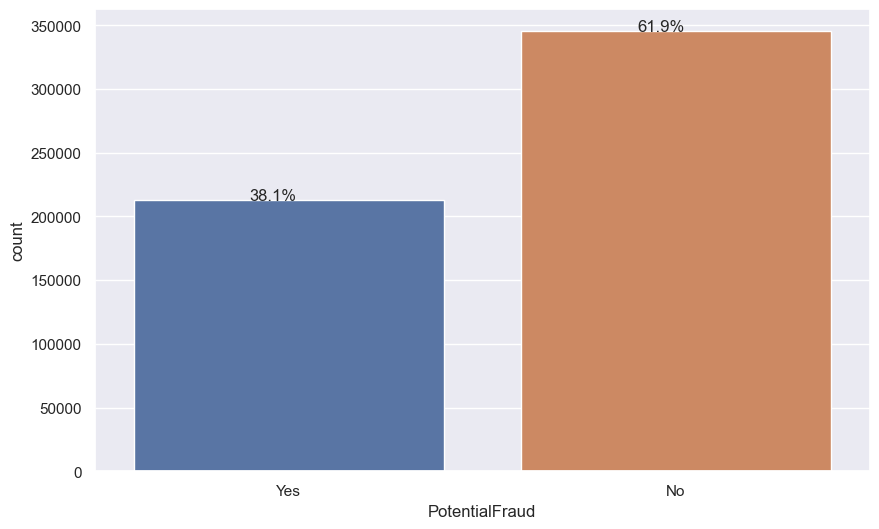

Number of records of each Category is:
No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


In [87]:
# Potential fraud in all data
plot_count_plot(train_alldata,'PotentialFraud',figsize=(10,6),hue=None)

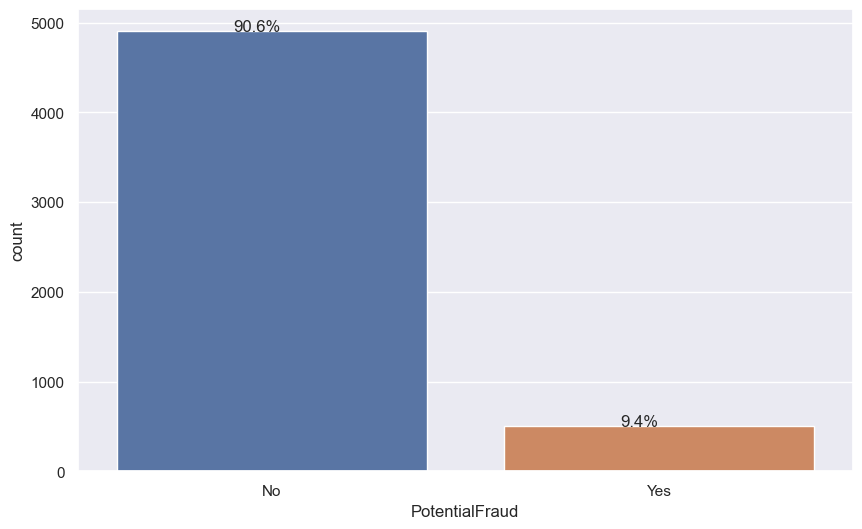

Number of records of each Category is:
No     4904
Yes     506
Name: PotentialFraud, dtype: int64


In [88]:
# Potential fraud in train data
plot_count_plot(train,'PotentialFraud',figsize=(10,6),hue=None)

In [89]:
# From the above two plots we can say that though only 9.4% of the providers are contributing to fraud transaction
# the number of fraud claims are almost 38%. So must get insights why the proportion is so high 
# and analyse the amounts/diagnosis/procedures contributing to so many fraud claims.


In [90]:
# st = 'State'
# hue = 'PotentialFraud'
# hue_type = train_alldata[hue].dtype.type

# groups = train_alldata[st].unique()    
# proportions = train_alldata.groupby(st)[hue].value_counts(normalize=True)
# print(groups)
# print(proportions)

In [91]:
# Function to calculate percentages with hue
def percentage_along_hue(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

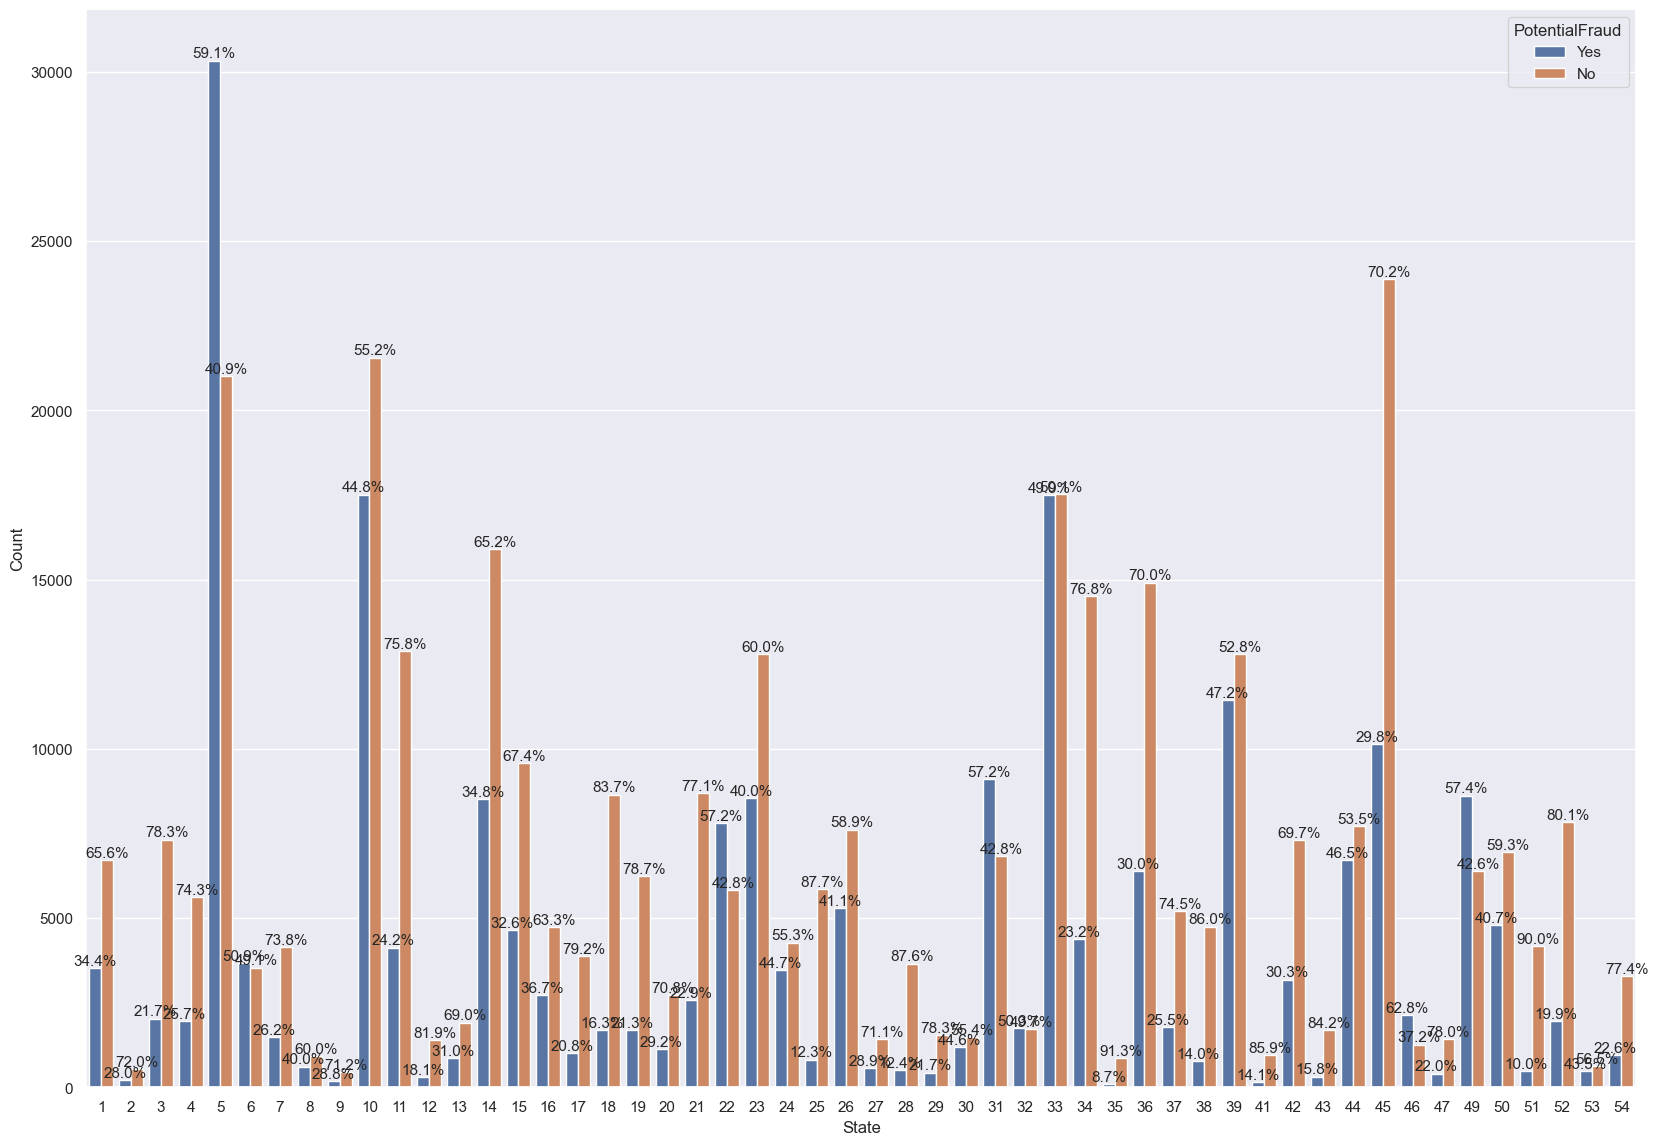

In [92]:
# plot to see percentage of frauds in each state
plt.figure(figsize=(20, 14))
ax3 = sns.countplot(x="State", hue="PotentialFraud", data=train_alldata)
ax3.set(xlabel='State', ylabel='Count')

percentage_along_hue(ax3)
plt.show()
# we can see that highest number of frauds are in state 5 i.e more than 30000 claims out of almost 52k claims

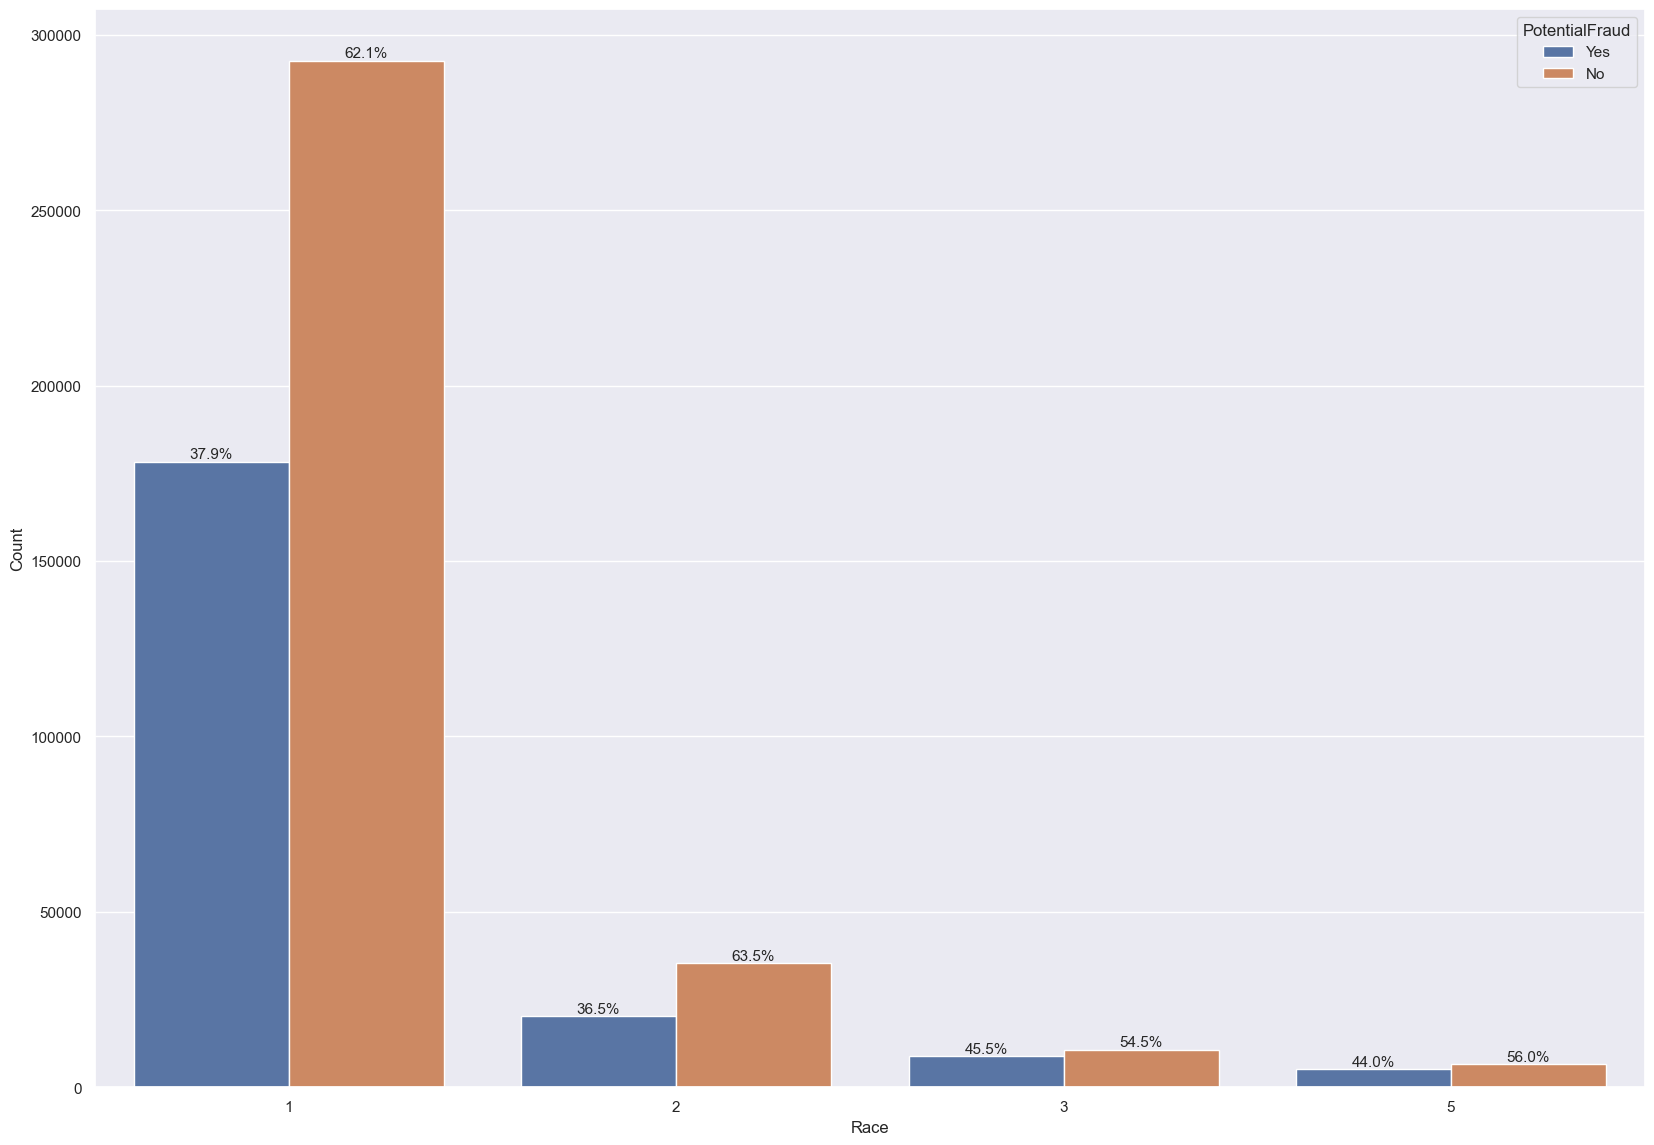

In [93]:
# plot to see percentage of frauds in each race
plt.figure(figsize=(20, 14))
ax3 = sns.countplot(x="Race", hue="PotentialFraud", data=train_alldata)
ax3.set(xlabel='Race', ylabel='Count')

percentage_along_hue(ax3)
plt.show()
# no valid insights

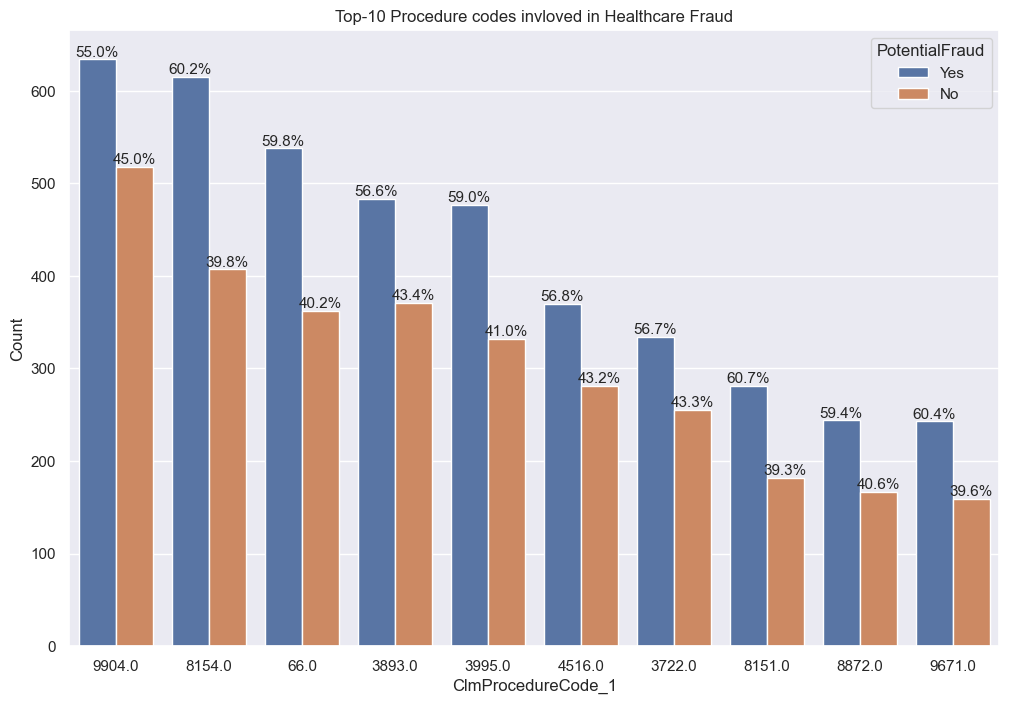

In [94]:
# Top 10 procedures codes-1 involved in frauds

plt.figure(figsize=(12,8))
ax3 = sns.countplot(x="ClmProcedureCode_1", hue="PotentialFraud", data=train_alldata,
                    order=train_alldata.ClmProcedureCode_1.value_counts().iloc[:10].index)
ax3.set(xlabel='ClmProcedureCode_1', ylabel='Count')
percentage_along_hue(ax3)
plt.title('Top-10 Procedure codes invloved in Healthcare Fraud')
plt.show()

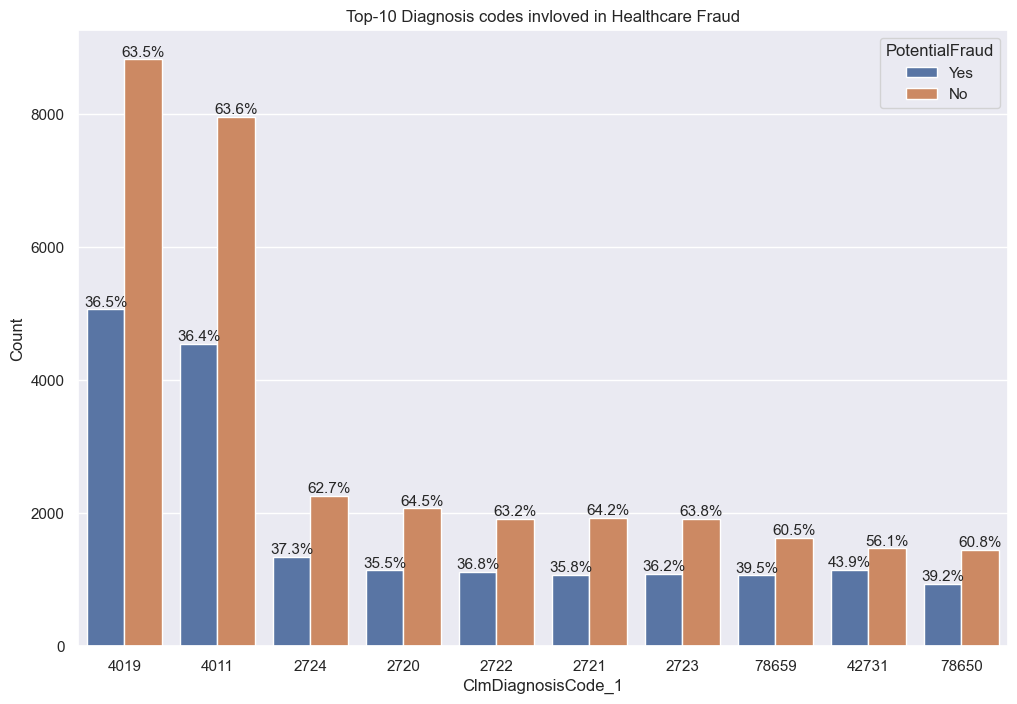

In [95]:
# Top 10 Diagnosis involved in frauds

plt.figure(figsize=(12,8))
ax3 = sns.countplot(x="ClmDiagnosisCode_1", hue="PotentialFraud", data=train_alldata,
                    order=train_alldata.ClmDiagnosisCode_1.value_counts().iloc[:10].index)
ax3.set(xlabel='ClmDiagnosisCode_1', ylabel='Count')
percentage_along_hue(ax3)
plt.title('Top-10 Diagnosis codes invloved in Healthcare Fraud')
plt.show()
# we can see for diag 4019 we have almost 5000 fraud claims and 9000 non fraud claims 

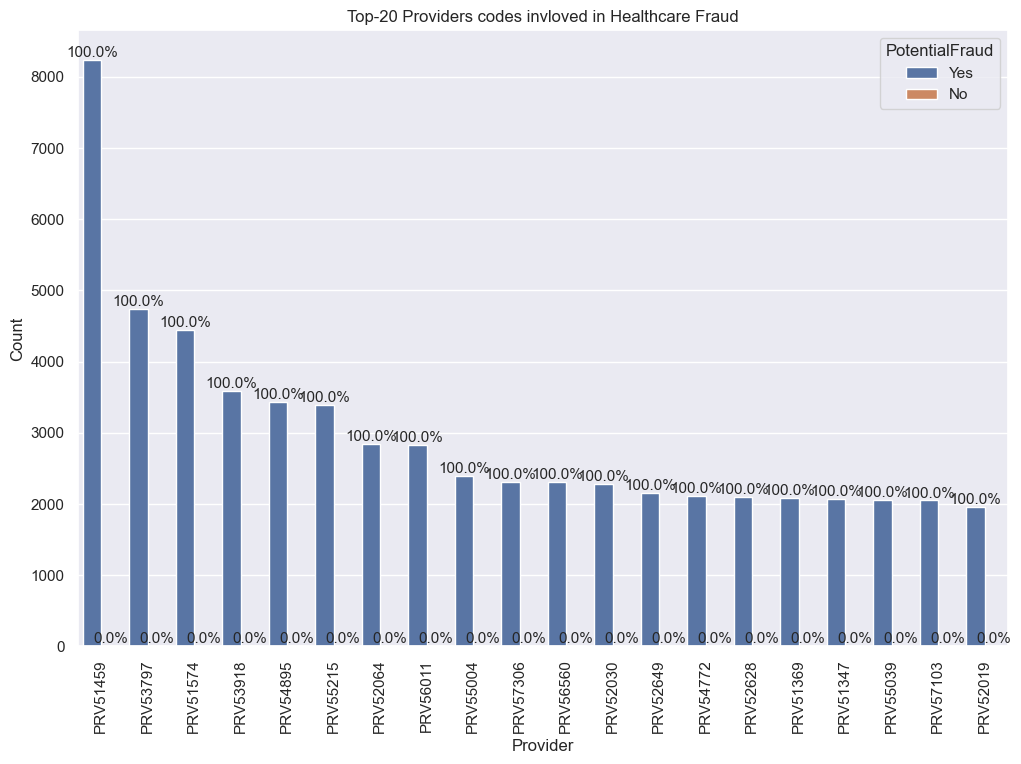

In [96]:
# Top 20 Providers involved in frauds

plt.figure(figsize=(12,8))
ax3 = sns.countplot(x="Provider", hue="PotentialFraud", data=train_alldata,
                    order=train_alldata.Provider.value_counts().iloc[:20].index)
ax3.set(xlabel='Provider', ylabel='Count')
percentage_along_hue(ax3)
plt.xticks(rotation=90)
plt.title('Top-20 Providers codes invloved in Healthcare Fraud')
plt.show()
# many providers are involved in frauds in 100% of there claims
# This data is taking a very big assumption whcih is if a provider does 1 fraud claim then all the claims 
# will be marked as fraud that is the reason we are getting 100%  frauds for these providers.
# This is how the data is provided

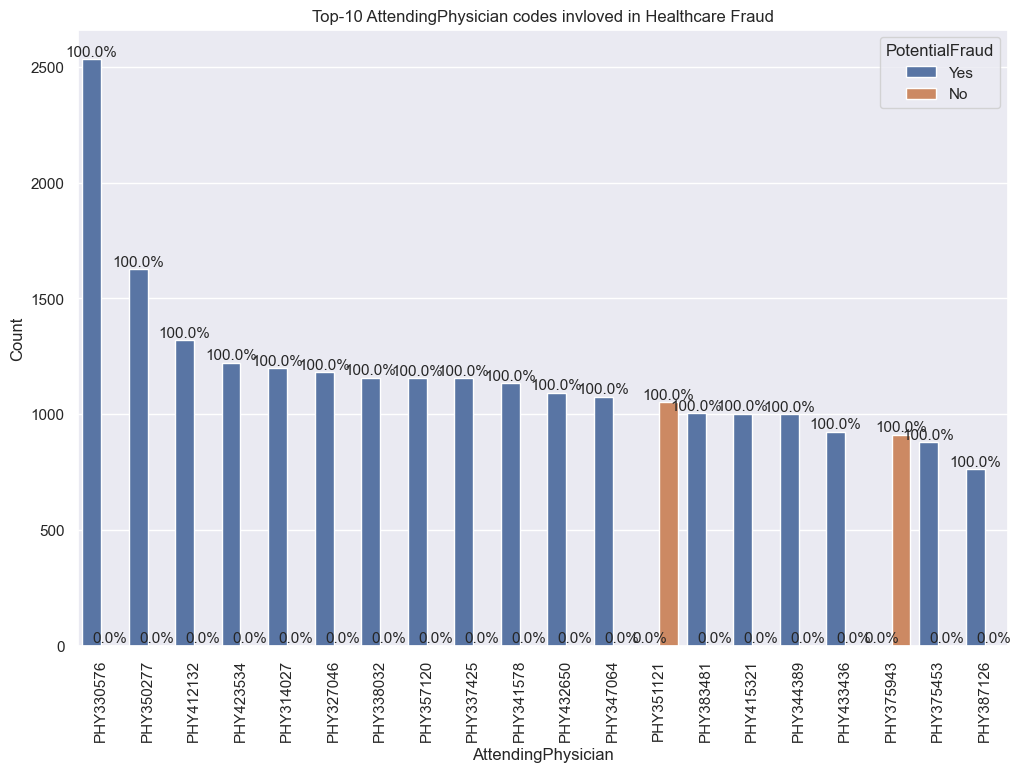

In [97]:
# Top 20 AttendingPhysician involved in frauds

plt.figure(figsize=(12,8))
ax3 = sns.countplot(x="AttendingPhysician", hue="PotentialFraud", data=train_alldata,
                    order=train_alldata.AttendingPhysician.value_counts().iloc[:20].index)
ax3.set(xlabel='AttendingPhysician', ylabel='Count')
percentage_along_hue(ax3)
plt.xticks(rotation=90)
plt.title('Top-10 AttendingPhysician codes invloved in Healthcare Fraud')
plt.show()
# a=except for two attending physicians all are involved in 100% of frauds in top 20.

In [98]:
# Lets see number of ChronicCond_Alzheimer patients and there IP/OP expenditure
bene_train_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [99]:
bene_train_df.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum()
# we can see that the annual IP reimbursement of patient without Alzheimer is ~$260 million and that of Alzheimer is $247M
# one interesting insight would be despite the number of beneficiary with Alzheimer is half of those without Alzheimer
# whereas there reimbursements are almost same. Difeerence is approx 2-3% only.

ChronicCond_Alzheimer
0    259949690
1    247213280
Name: IPAnnualReimbursementAmt, dtype: int64

In [100]:
bene_train_df.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum()
# outpatient reimbursements are 105 Million for no Alzheimer and 74.7 Million for Alzheimer patients

ChronicCond_Alzheimer
0    105154550
1     74721530
Name: OPAnnualReimbursementAmt, dtype: int64

In [101]:
print('IP Annual Deductible amount:', bene_train_df.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum())
print('****************************************************************************************************************')
print('OP Annual Deductible amount:',bene_train_df.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum())

IP Annual Deductible amount: ChronicCond_Alzheimer
0    27200388
1    28200854
Name: IPAnnualDeductibleAmt, dtype: int64
****************************************************************************************************************
OP Annual Deductible amount: ChronicCond_Alzheimer
0    30832150
1    21502981
Name: OPAnnualDeductibleAmt, dtype: int64


In [102]:
# no of beneficiary with chronic vs non chronic Alzheimer
bene_train_df.groupby(['ChronicCond_Alzheimer'])['BeneID'].count()
# 92530 beneficiary does not have chronic Alzheimer and 46026 have chronic Alzheimer

ChronicCond_Alzheimer
0    92530
1    46026
Name: BeneID, dtype: int64

In [103]:
# calculate the average IP reimb Amount
cc_alh_ip_r=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Alzheimer'])['IPAnnualReimbursementAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Alzheimer'])['BeneID'].count(),2))
cc_alh_ip_r.columns=['Avg_IP_Reimb_Amt']
cc_alh_ip_r

Avg_IP_Reimb_Amt
ChronicCond_Alzheimer                  
0                               2809.36
1                               5371.17

In [104]:
# calculate the average OP reimb Amount,average IP deduct Amount,average OP deduct Amount
#average OP reimb Amount
cc_alh_op_r=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Alzheimer'])['OPAnnualReimbursementAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Alzheimer'])['BeneID'].count(),2))
cc_alh_op_r.columns=['Avg_OP_Reimb_Amt']
print(cc_alh_op_r)
#average IP deduct Amount
cc_alh_ip_ded=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Alzheimer'])['IPAnnualDeductibleAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Alzheimer'])['BeneID'].count(),2))
cc_alh_ip_ded.columns=['Avg_IP_Deduct_Amt']
print(cc_alh_ip_ded)
#average OP deduct Amount
cc_alh_op_ded=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Alzheimer'])['OPAnnualDeductibleAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Alzheimer'])['BeneID'].count(),2))
cc_alh_op_ded.columns=['Avg_OP_Deduct_Amt']
print(cc_alh_op_ded)

                       Avg_OP_Reimb_Amt
ChronicCond_Alzheimer                  
0                               1136.44
1                               1623.46
                       Avg_IP_Deduct_Amt
ChronicCond_Alzheimer                   
0                                 293.96
1                                 612.72
                       Avg_OP_Deduct_Amt
ChronicCond_Alzheimer                   
0                                 333.21
1                                 467.19


In [105]:
cc_alh_all_amts=pd.concat([cc_alh_ip_r,cc_alh_op_r,cc_alh_ip_ded,cc_alh_op_ded],axis=1)
cc_alh_all_amts

Avg_IP_Reimb_Amt  Avg_OP_Reimb_Amt  Avg_IP_Deduct_Amt  \
ChronicCond_Alzheimer                                                          
0                               2809.36           1136.44             293.96   
1                               5371.17           1623.46             612.72   

                       Avg_OP_Deduct_Amt  
ChronicCond_Alzheimer                     
0                                 333.21  
1                                 467.19

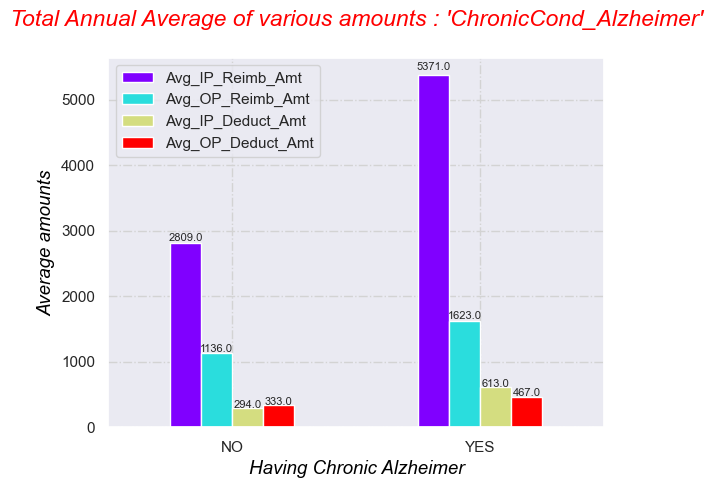

In [106]:
fig=cc_alh_all_amts.plot(kind='bar', colormap='rainbow')
for p in fig.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    fig.annotate(f'{round(height,0)}',(x+width/2,y+height*1.015),ha='center',
                fontsize=8,rotation=0)
plt.xlabel('Having Chronic Alzheimer',fontdict=label_font_dict)
plt.xticks(ticks=[0,1],labels=['NO','YES'],rotation=0)
plt.ylabel("Average amounts",fontdict=label_font_dict)
plt.grid(which='major', linestyle="-.", color='lightgrey')
plt.title("Total Annual Average of various amounts : 'ChronicCond_Alzheimer'\n", fontdict=title_font_dict)
plt.show()
# In case of beneficiaries with Chronic Alzehimer payers are paying hefty amounts for IP i.e. 
#alomost 50% more than in case of non Alzheimer.
# for others the difference is not that high.

In [107]:
# Lets analyse the ChronicCond_Heartfailure patients and there IP/OP expenditure
print('IP Annual Reimbursemnet amount:',bene_train_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualReimbursementAmt'].sum())
print('****************************************************************************************************************')
print('OP Annual Reimbursemnet amount:',bene_train_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualReimbursementAmt'].sum())
print('****************************************************************************************************************')
print('IP Annual Deductible amount:', bene_train_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualDeductibleAmt'].sum())
print('****************************************************************************************************************')
print('OP Annual Deductible amount:',bene_train_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualDeductibleAmt'].sum())
# IP Annual Reimbursemnet for Chronuc heart failuer is almost 3 times i.e $370M of non heartfailures i.e 136M

IP Annual Reimbursemnet amount: ChronicCond_Heartfailure
0    136306830
1    370856140
Name: IPAnnualReimbursementAmt, dtype: int64
****************************************************************************************************************
OP Annual Reimbursemnet amount: ChronicCond_Heartfailure
0     65595580
1    114280500
Name: OPAnnualReimbursementAmt, dtype: int64
****************************************************************************************************************
IP Annual Deductible amount: ChronicCond_Heartfailure
0    15097592
1    40303650
Name: IPAnnualDeductibleAmt, dtype: int64
****************************************************************************************************************
OP Annual Deductible amount: ChronicCond_Heartfailure
0    19685293
1    32649838
Name: OPAnnualDeductibleAmt, dtype: int64


In [108]:
# no of beneficiary with chronic vs non chronic Heartfailure
bene_train_df.groupby(['ChronicCond_Heartfailure'])['BeneID'].count()
# 68402 beneficiary does not have chronic Heartfailure and 70154 have chronic Heartfailure

ChronicCond_Heartfailure
0    70154
1    68402
Name: BeneID, dtype: int64

In [109]:
# calculate the average IP reimb Amount
cc_hf_ip_r=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualReimbursementAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Heartfailure'])['BeneID'].count(),2))
cc_hf_ip_r.columns=['Avg_IP_Reimb_Amt']
print(cc_hf_ip_r)
#average OP reimb Amount
cc_hf_op_r=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualReimbursementAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Heartfailure'])['BeneID'].count(),2))
cc_hf_op_r.columns=['Avg_OP_Reimb_Amt']
print(cc_hf_op_r)
#average IP deduct Amount
cc_hf_ip_ded=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Heartfailure'])['IPAnnualDeductibleAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Heartfailure'])['BeneID'].count(),2))
cc_hf_ip_ded.columns=['Avg_IP_Deduct_Amt']
print(cc_hf_ip_ded)
#average OP deduct Amount
cc_hf_op_ded=pd.DataFrame(round(bene_train_df.groupby(['ChronicCond_Heartfailure'])['OPAnnualDeductibleAmt'].sum()/bene_train_df.groupby(
    ['ChronicCond_Heartfailure'])['BeneID'].count(),2))
cc_hf_op_ded.columns=['Avg_OP_Deduct_Amt']
print(cc_hf_op_ded)

                          Avg_IP_Reimb_Amt
ChronicCond_Heartfailure                  
0                                  1942.97
1                                  5421.71
                          Avg_OP_Reimb_Amt
ChronicCond_Heartfailure                  
0                                   935.02
1                                  1670.72
                          Avg_IP_Deduct_Amt
ChronicCond_Heartfailure                   
0                                    215.21
1                                    589.22
                          Avg_OP_Deduct_Amt
ChronicCond_Heartfailure                   
0                                    280.60
1                                    477.32


In [110]:
cc_hf_all_amts=pd.concat([cc_hf_ip_r,cc_hf_op_r,cc_hf_ip_ded,cc_hf_op_ded],axis=1)
cc_hf_all_amts

Avg_IP_Reimb_Amt  Avg_OP_Reimb_Amt  \
ChronicCond_Heartfailure                                       
0                                  1942.97            935.02   
1                                  5421.71           1670.72   

                          Avg_IP_Deduct_Amt  Avg_OP_Deduct_Amt  
ChronicCond_Heartfailure                                        
0                                    215.21             280.60  
1                                    589.22             477.32

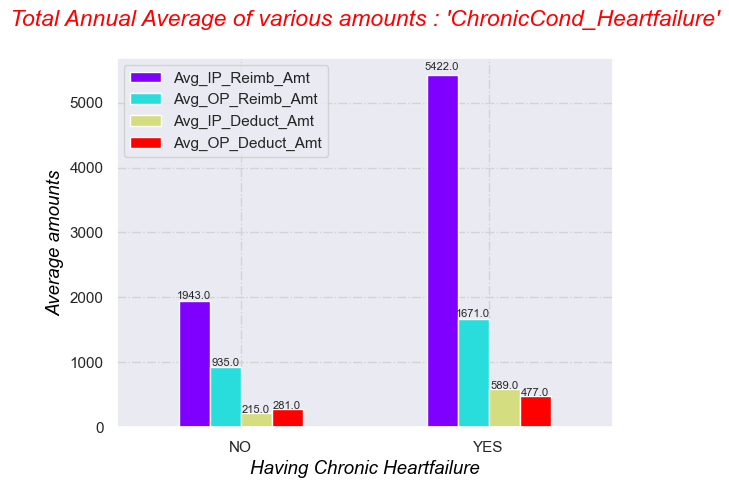

In [111]:
fig=cc_hf_all_amts.plot(kind='bar', colormap='rainbow')
for p in fig.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    fig.annotate(f'{round(height,0)}',(x+width/2,y+height*1.015),ha='center',
                fontsize=8,rotation=0)
plt.xlabel('Having Chronic Heartfailure',fontdict=label_font_dict)
plt.xticks(ticks=[0,1],labels=['NO','YES'],rotation=0)
plt.ylabel("Average amounts",fontdict=label_font_dict)
plt.grid(which='major', linestyle="-.", color='lightgrey')
plt.title("Total Annual Average of various amounts : 'ChronicCond_Heartfailure'\n", fontdict=title_font_dict)
plt.show()
# In case of beneficiaries with Chronic Heartfailure payers are paying hefty amounts for IP i.e. 
#alomost 180% more than in case of non Heartfailure.
# for others the difference is not that high.

In [112]:
# lets write a function to analyse the chronic condition beneficiaries expenditures
# Lets analyse the ChronicCond_Heartfailure patients and there IP/OP expenditure
def analyse_chronic_condition(df,col):
    print('Total number of beneficiaries with:',df.groupby([col])['BeneID'].count())
    print('***************************************************************************************************************')
    print('IP Annual Reimbursemnet amount for',df.groupby([col])['IPAnnualReimbursementAmt'].sum())
    print('***************************************************************************************************************')
    print('OP Annual Reimbursemnet amount for',df.groupby([col])['OPAnnualReimbursementAmt'].sum())
    print('***************************************************************************************************************')
    print('IP Annual Deductible amount for',df.groupby([col])['IPAnnualDeductibleAmt'].sum())
    print('***************************************************************************************************************')
    print('OP Annual Deductible amount for',df.groupby([col])['OPAnnualDeductibleAmt'].sum())

    cc_ip_r=pd.DataFrame(round(df.groupby([col])['IPAnnualReimbursementAmt'].sum()/df.groupby([col])['BeneID'].count(),2))
    cc_ip_r.columns=['Avg_IP_Reimb_Amt']

    cc_op_r=pd.DataFrame(round(df.groupby([col])['OPAnnualReimbursementAmt'].sum()/df.groupby(
        [col])['BeneID'].count(),2))
    cc_op_r.columns=['Avg_OP_Reimb_Amt']

    cc_ip_ded=pd.DataFrame(round(df.groupby([col])['IPAnnualDeductibleAmt'].sum()/df.groupby(
        [col])['BeneID'].count(),2))
    cc_ip_ded.columns=['Avg_IP_Deduct_Amt']

    cc_op_ded=pd.DataFrame(round(df.groupby([col])['OPAnnualDeductibleAmt'].sum()/df.groupby(
        [col])['BeneID'].count(),2))
    cc_op_ded.columns=['Avg_OP_Deduct_Amt']

    cc_all_amts=pd.concat([cc_ip_r,cc_op_r,cc_ip_ded,cc_op_ded],axis=1)
    print('\n***************************************************************************************************************')
    print("DataFrame with all average amounts")
    print('***************************************************************************************************************')
    print(cc_all_amts)
    xlabel='Having '+col
    title="Total Annual Average of various amounts :"+col+'\n'
    fig=cc_all_amts.plot(kind='bar', colormap='rainbow')
    for p in fig.patches:
        width=p.get_width()
        height=p.get_height()
        x,y=p.get_xy()
        fig.annotate(f'{round(height,0)}',(x+width/2,y+height*1.015),ha='center',
                    fontsize=8,rotation=0)
    plt.xlabel(xlabel,fontdict=label_font_dict)
    plt.xticks(ticks=[0,1],labels=['NO','YES'],rotation=0)
    plt.ylabel("Average amounts",fontdict=label_font_dict)
    plt.grid(which='major', linestyle="-.", color='lightgrey')
    plt.title(title, fontdict=title_font_dict)
    plt.show()


Total number of beneficiaries with: ChronicCond_KidneyDisease
0    95277
1    43279
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_KidneyDisease
0    182537230
1    324625740
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_KidneyDisease
0    90651980
1    89224100
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_KidneyDisease
0    21410534
1    33990708
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCond

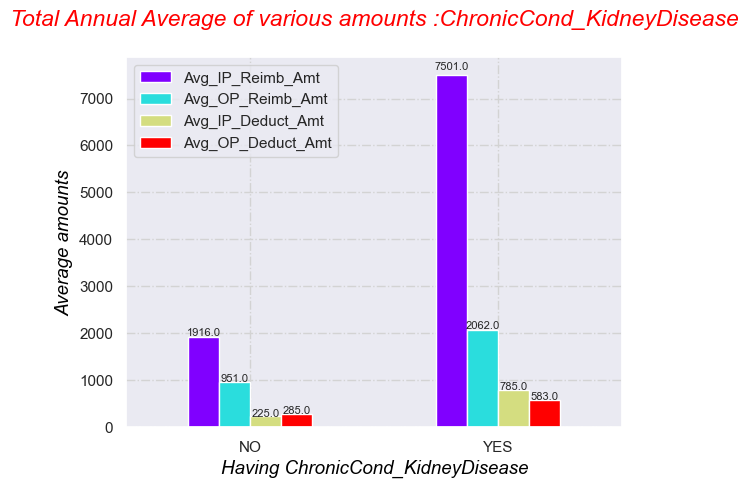

In [113]:
# Analyse the ChronicCond_KidneyDisease 
analyse_chronic_condition(bene_train_df,'ChronicCond_KidneyDisease')

In [114]:
# IP Annual Reimbursemnet for ChronicCond_KidneyDisease is almost double i.e $324M of non ChronicCond_KidneyDisease i.e 182M
# no of beneficiary with chronic vs non ChronicCond_KidneyDisease
# 95k beneficiary does not have ChronicCond_KidneyDisease and 43k have ChronicCond_KidneyDisease
# In case of beneficiaries with ChronicCond_KidneyDisease payers are paying hefty amounts for IP i.e. 
#alomost 300% more than in case of non ChronicCond_KidneyDisease.
# Op annual reimbursemnt is also double in case of chronic vs nonchronic kidney disease

Total number of beneficiaries with: ChronicCond_Cancer
0    121935
1     16621
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_Cancer
0    406314520
1    100848450
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_Cancer
0    150150630
1     29725450
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_Cancer
0    44824638
1    10576604
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCond_Cancer
0    43678371
1 

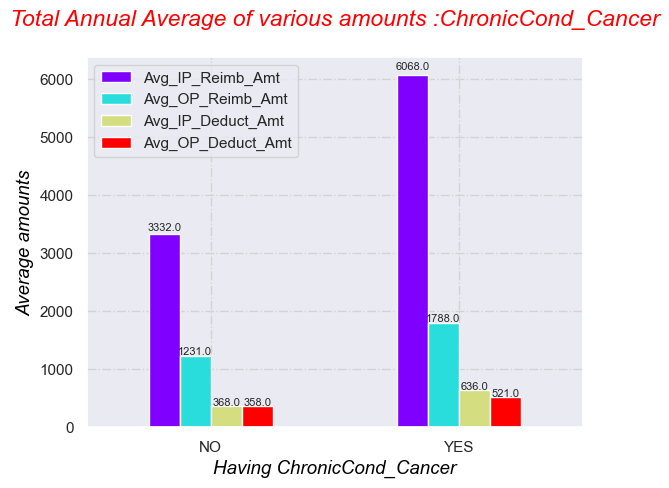

In [115]:
# Analyse the ChronicCond_Cancer 
analyse_chronic_condition(bene_train_df,'ChronicCond_Cancer')

In [116]:
# Comments: ChronicCond_Cancer
# IP Annual Reimbursemnet for ChronicCond_Cancer is almost 4 times i.e $400M of non ChronicCond_Cancer i.e 182M
# 121k beneficiary does not have ChronicCond_Cancer and 16.6k have ChronicCond_Cancer whereas the amounts are much more in such lesser patients
# In case of beneficiaries with ChronicCond_Cancer payers are paying hefty amounts for IP i.e. 
#alomost 100% more than in case of non ChronicCond_Cancer.
# rest there is not much difference

Total number of beneficiaries with: ChronicCond_ObstrPulmonary
0    105697
1     32859
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_ObstrPulmonary
0    265262490
1    241900480
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_ObstrPulmonary
0    120372870
1     59503210
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_ObstrPulmonary
0    28515058
1    26886184
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for Chr

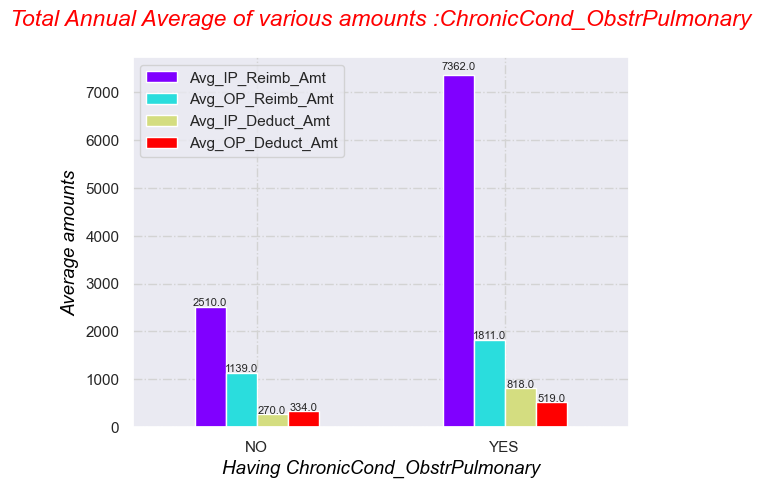

In [117]:
# Analyse the ChronicCond_ObstrPulmonary 
analyse_chronic_condition(bene_train_df,'ChronicCond_ObstrPulmonary')

In [118]:
# Comments: ChronicCond_ObstrPulmonary


Total number of beneficiaries with: ChronicCond_Depression
0    89296
1    49260
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_Depression
0    259771230
1    247391740
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_Depression
0    100869360
1     79006720
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_Depression
0    27320344
1    28080898
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCond_Depressio

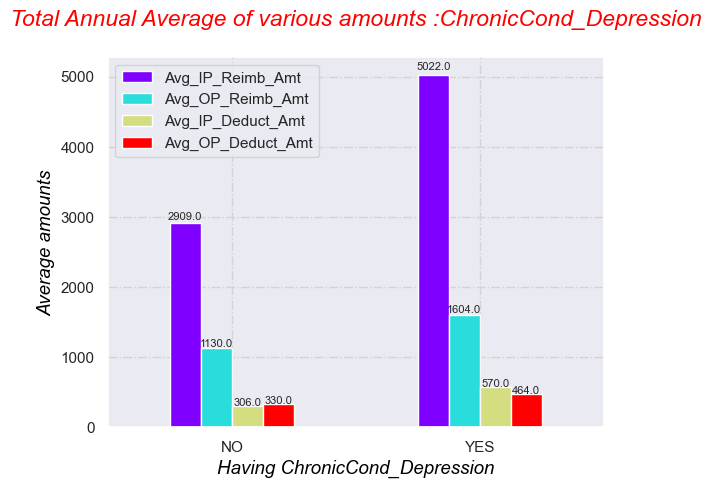

In [119]:
# Analyse the ChronicCond_Depression 
analyse_chronic_condition(bene_train_df,'ChronicCond_Depression')

In [120]:
# Comments: ChronicCond_Depression


Total number of beneficiaries with: ChronicCond_Diabetes
0    55165
1    83391
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_Diabetes
0    100996930
1    406166040
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_Diabetes
0     45845100
1    134030980
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_Diabetes
0    10849210
1    44552032
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCond_Diabetes
0    136

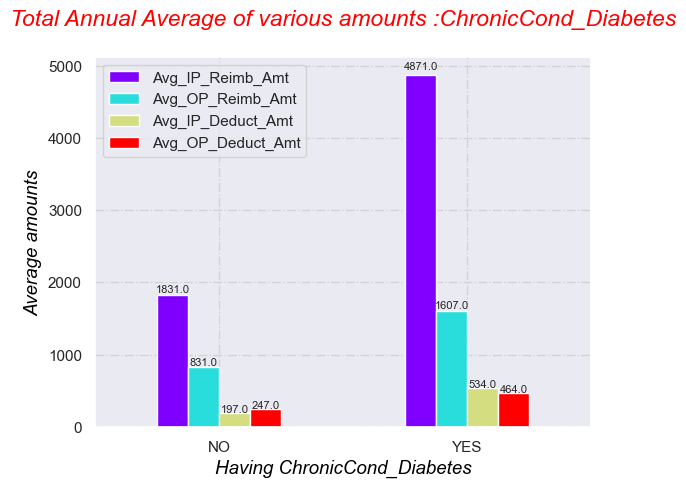

In [121]:
# Analyse the ChronicCond_Diabetes 
analyse_chronic_condition(bene_train_df,'ChronicCond_Diabetes')

In [122]:
# Comments: ChronicCond_Diabetes


Total number of beneficiaries with: ChronicCond_IschemicHeart
0    44912
1    93644
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_IschemicHeart
0     67253140
1    439909830
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_IschemicHeart
0     37436300
1    142439780
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_IschemicHeart
0     7955416
1    47445826
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCo

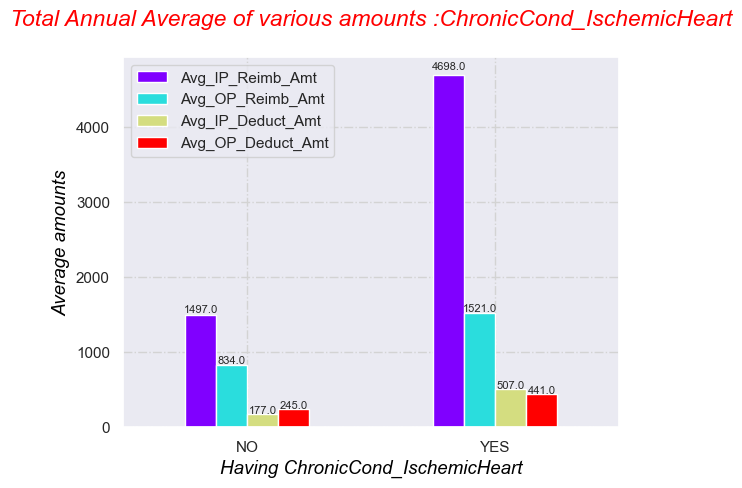

In [123]:
# Analyse the ChronicCond_IschemicHeart 
analyse_chronic_condition(bene_train_df,'ChronicCond_IschemicHeart')

In [124]:
# Comments: ChronicCond_IschemicHeart
# IP Annual Reimbursemnet for ChronicCond_IschemicHeart is almost 7 times i.e $439M of non ChronicCond_IschemicHeart i.e 67M


Total number of beneficiaries with: ChronicCond_Osteoporasis
0    100497
1     38059
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_Osteoporasis
0    331771120
1    175391850
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_Osteoporasis
0    122988950
1     56887130
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_Osteoporasis
0    35913580
1    19487662
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCond

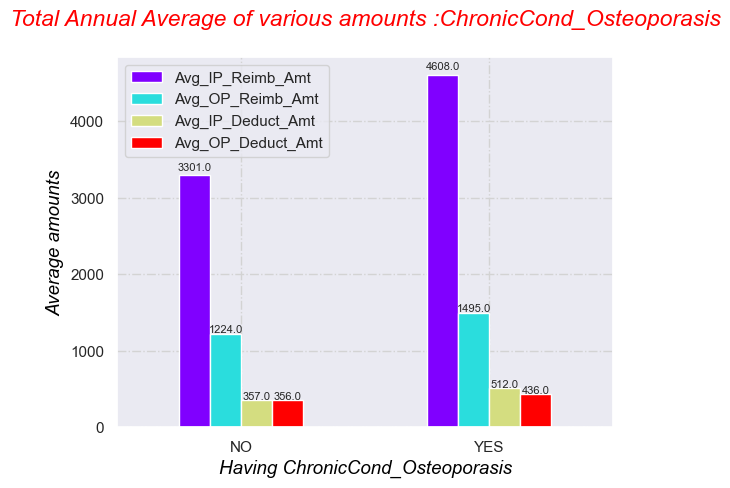

In [125]:
# Analyse the ChronicCond_Osteoporasis 
analyse_chronic_condition(bene_train_df,'ChronicCond_Osteoporasis')

In [126]:
# Comments: ChronicCond_Osteoporasis


Total number of beneficiaries with: ChronicCond_rheumatoidarthritis
0    102972
1     35584
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_rheumatoidarthritis
0    325612420
1    181550550
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_rheumatoidarthritis
0    124789990
1     55086090
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_rheumatoidarthritis
0    35380588
1    20020654
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deduc

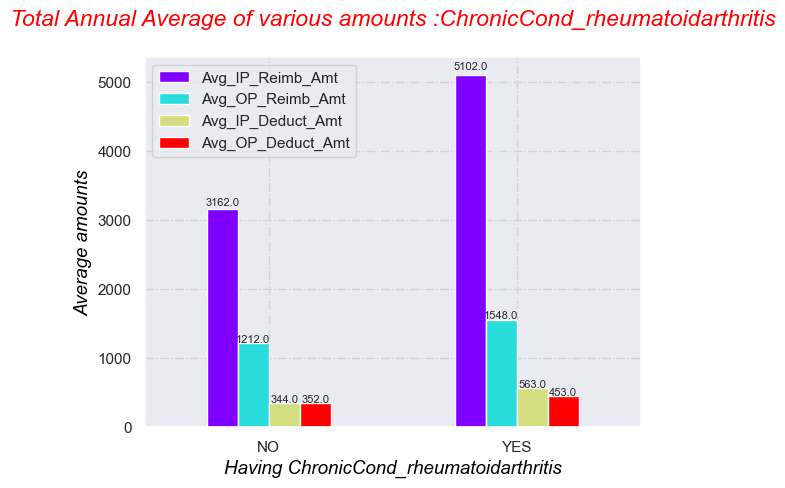

In [127]:
# Analyse the ChronicCond_rheumatoidarthritis 
analyse_chronic_condition(bene_train_df,'ChronicCond_rheumatoidarthritis')

In [128]:
# Comments: ChronicCond_rheumatoidarthritis


Total number of beneficiaries with: ChronicCond_stroke
0    127602
1     10954
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for ChronicCond_stroke
0    418309870
1     88853100
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for ChronicCond_stroke
0    158787470
1     21088610
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for ChronicCond_stroke
0    45965472
1     9435770
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for ChronicCond_stroke
0    46464362
1 

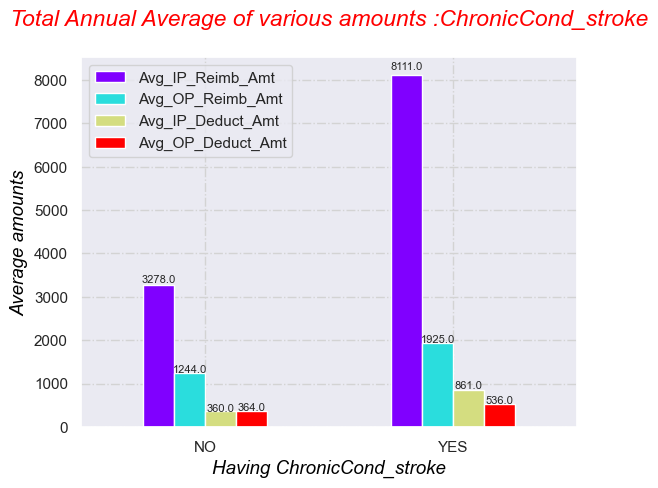

In [129]:
# Analyse the ChronicCond_stroke 
analyse_chronic_condition(bene_train_df,'ChronicCond_stroke')

In [130]:
# Comments: ChronicCond_stroke


Total number of beneficiaries with: RenalDiseaseIndicator
0    118978
1     19578
Name: BeneID, dtype: int64
***************************************************************************************************************
IP Annual Reimbursemnet amount for RenalDiseaseIndicator
0    363053070
1    144109900
Name: IPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
OP Annual Reimbursemnet amount for RenalDiseaseIndicator
0    124611800
1     55264280
Name: OPAnnualReimbursementAmt, dtype: int64
***************************************************************************************************************
IP Annual Deductible amount for RenalDiseaseIndicator
0    40736192
1    14665050
Name: IPAnnualDeductibleAmt, dtype: int64
***************************************************************************************************************
OP Annual Deductible amount for RenalDiseaseIndicator
0

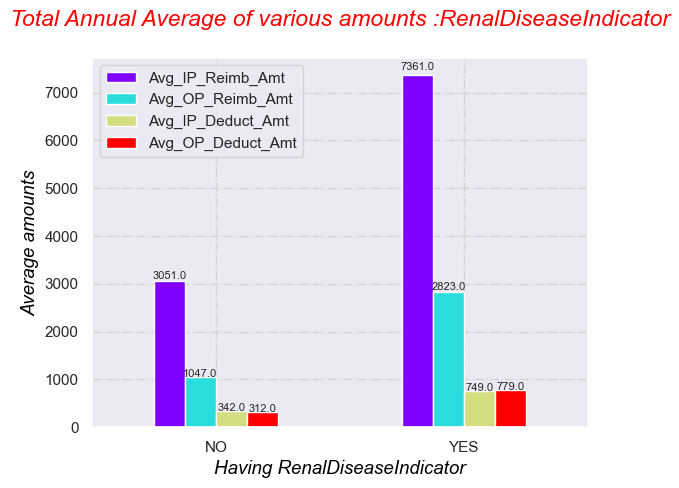

In [131]:
# Analyse the RenalDiseaseIndicator 
analyse_chronic_condition(bene_train_df,'RenalDiseaseIndicator')


In [132]:
def plot_stripplots(x_col,y_col,hue_col,lgd_title):
    plt.figure(figsize=(10,7))
    sns.stripplot(data=bene_train_df,x=x_col,y=y_col,hue=hue_col,palette='plasma')
    plt.xlabel("{}".format(x_col), fontdict=label_font_dict)
    plt.xticks(rotation=90, size=12)
    plt.ylabel("{}\n".format(y_col), fontdict=label_font_dict)
    plt.grid(which='major', linestyle="-.", color='lightpink')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer", fontdict=title_font_dict)
    plt.legend(loc='upper center',title=lgd_title)


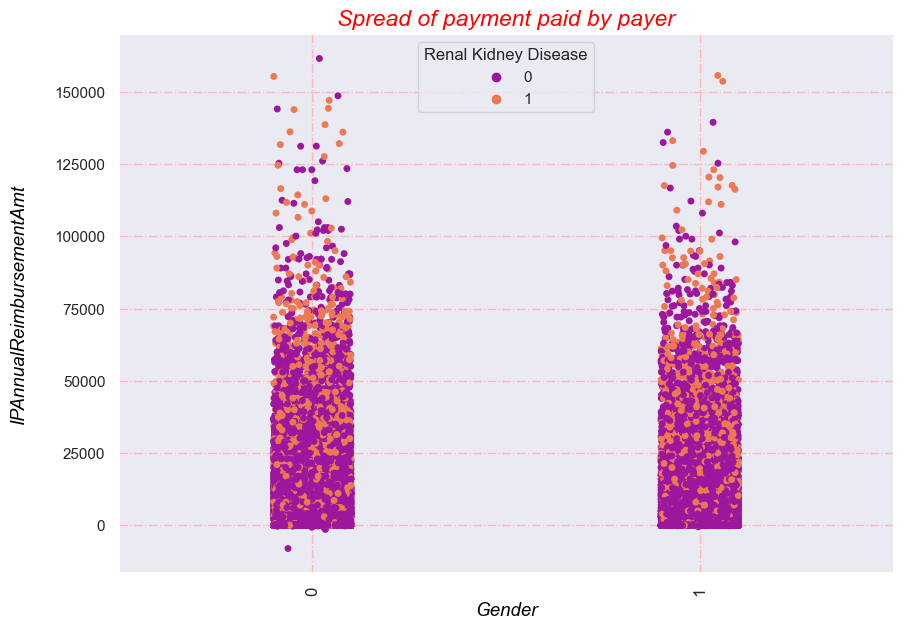

In [133]:
plot_stripplots(x_col='Gender', y_col='IPAnnualReimbursementAmt',hue_col="RenalDiseaseIndicator",  lgd_title="Renal Kidney Disease")

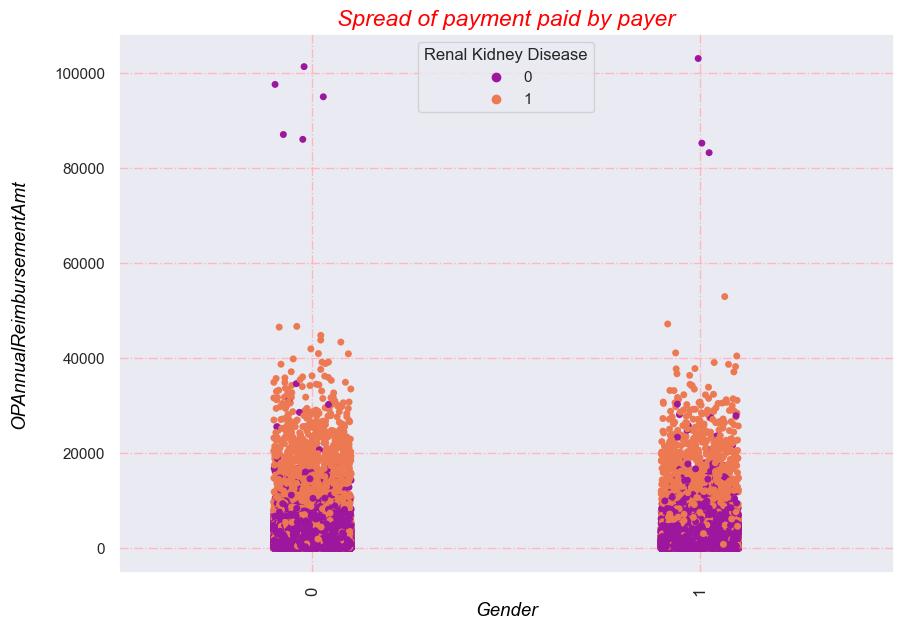

In [134]:
plot_stripplots(x_col='Gender', y_col='OPAnnualReimbursementAmt',hue_col="RenalDiseaseIndicator",  lgd_title="Renal Kidney Disease")

In [135]:
#Observation-
#Data shows complete overlapping of data points with some potential outliers
# other thing that we cab see are there are few points which are having negative reimbursement value which are possibly
# data error.


In [136]:
# check if we have negative values in train
print('Train Min IP Reimb:',bene_train_df['IPAnnualReimbursementAmt'].min())
print('Train Min OP Reimb:',bene_train_df['OPAnnualReimbursementAmt'].min())
print('Train Min IP Deduct:',bene_train_df['IPAnnualDeductibleAmt'].min())
print('Train Min OP Deduct:',bene_train_df['OPAnnualDeductibleAmt'].min())
print('Test Min IP Reimb:',bene_test_df['IPAnnualReimbursementAmt'].min())
print('Test Min OP Reimb:',bene_test_df['OPAnnualReimbursementAmt'].min())
print('Test Min IP Deduct:',bene_test_df['IPAnnualDeductibleAmt'].min())
print('Test Min OP Deduct:',bene_test_df['OPAnnualDeductibleAmt'].min())

Train Min IP Reimb: -8000
Train Min OP Reimb: -70
Train Min IP Deduct: 0
Train Min OP Deduct: 0
Test Min IP Reimb: -1000
Test Min OP Reimb: -60
Test Min IP Deduct: 0
Test Min OP Deduct: 0


In [137]:
bene_train_df.head()

BeneID        DOB  Gender  Race  RenalDiseaseIndicator  State  County  \
0  BENE11001 1943-01-01       1     1                      0     39     230   
1  BENE11002 1936-09-01       0     1                      0     39     280   
2  BENE11003 1936-08-01       1     1                      0     52     590   
3  BENE11004 1922-07-01       1     1                      0     39     270   
4  BENE11005 1935-09-01       1     1                      0     24     680   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      0   
2                   12                   12                      1   
3                   12                   12                      1   
4                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         0                          0                   0   
2                         0                          0                   0   
3                         1                          0                   0   
4                         0                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     0   
2                           0                       0                     0   
3                           0                       0                     1   
4                           1                       0                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          0                         0   
2                          1                         0   
3                          1                         1   
4                          0                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   
2                                0                   0   
3                                1                   0   
4                                0                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Whether_Dead   Age  
0                     70             0  67.0  
1                     50             0  73.3  
2                     40             0  73.4  
3                    760             0  87.5  
4                   1200             0  74.3

In [138]:
# changin thr negativee values to positive values
bene_train_df['IPAnnualReimbursementAmt']=bene_train_df['IPAnnualReimbursementAmt'].abs()
bene_train_df['OPAnnualReimbursementAmt']=bene_train_df['OPAnnualReimbursementAmt'].abs()
bene_test_df['IPAnnualReimbursementAmt']=bene_test_df['IPAnnualReimbursementAmt'].abs()
bene_test_df['OPAnnualReimbursementAmt']=bene_test_df['OPAnnualReimbursementAmt'].abs()

In [139]:
# check if we still have any negativ evalue
print('Train Min IP Reimb:',bene_train_df['IPAnnualReimbursementAmt'].min())
print('Train Min OP Reimb:',bene_train_df['OPAnnualReimbursementAmt'].min())
print('Train Min IP Deduct:',bene_train_df['IPAnnualDeductibleAmt'].min())
print('Train Min OP Deduct:',bene_train_df['OPAnnualDeductibleAmt'].min())
print('Test Min IP Reimb:',bene_test_df['IPAnnualReimbursementAmt'].min())
print('Test Min OP Reimb:',bene_test_df['OPAnnualReimbursementAmt'].min())
print('Test Min IP Deduct:',bene_test_df['IPAnnualDeductibleAmt'].min())
print('Test Min OP Deduct:',bene_test_df['OPAnnualDeductibleAmt'].min())

Train Min IP Reimb: 0
Train Min OP Reimb: 0
Train Min IP Deduct: 0
Train Min OP Deduct: 0
Test Min IP Reimb: 0
Test Min OP Reimb: 0
Test Min IP Deduct: 0
Test Min OP Deduct: 0


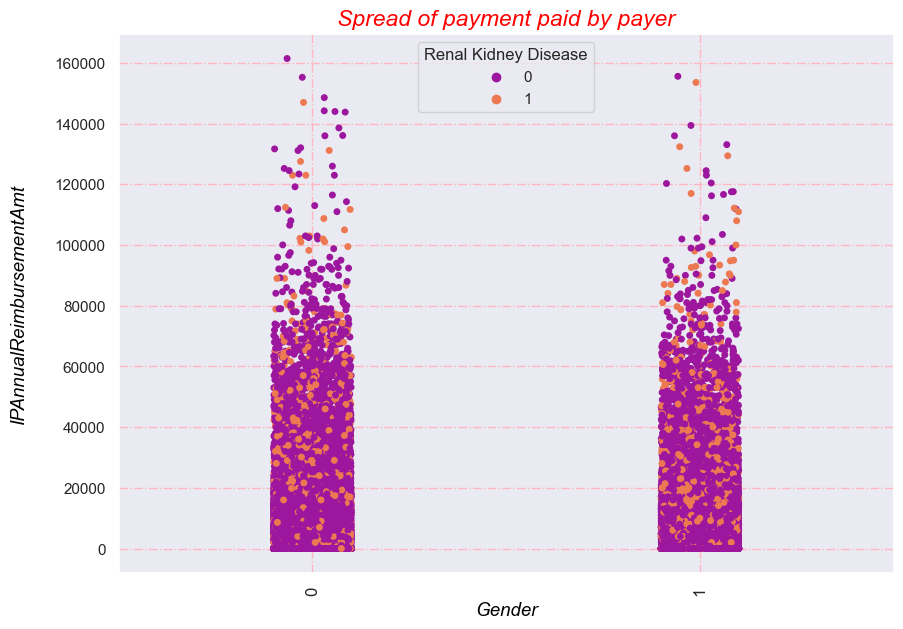

In [140]:
plot_stripplots(x_col='Gender', y_col='IPAnnualReimbursementAmt',hue_col="ChronicCond_Cancer",  lgd_title="Renal Kidney Disease")

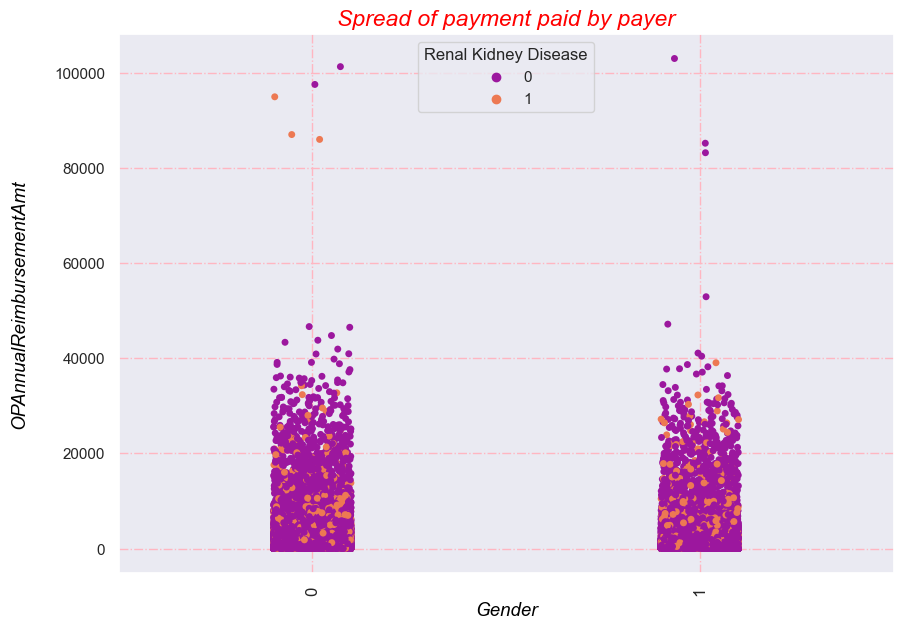

In [141]:
plot_stripplots(x_col='Gender', y_col='OPAnnualReimbursementAmt',hue_col="ChronicCond_Cancer",  lgd_title="Renal Kidney Disease")

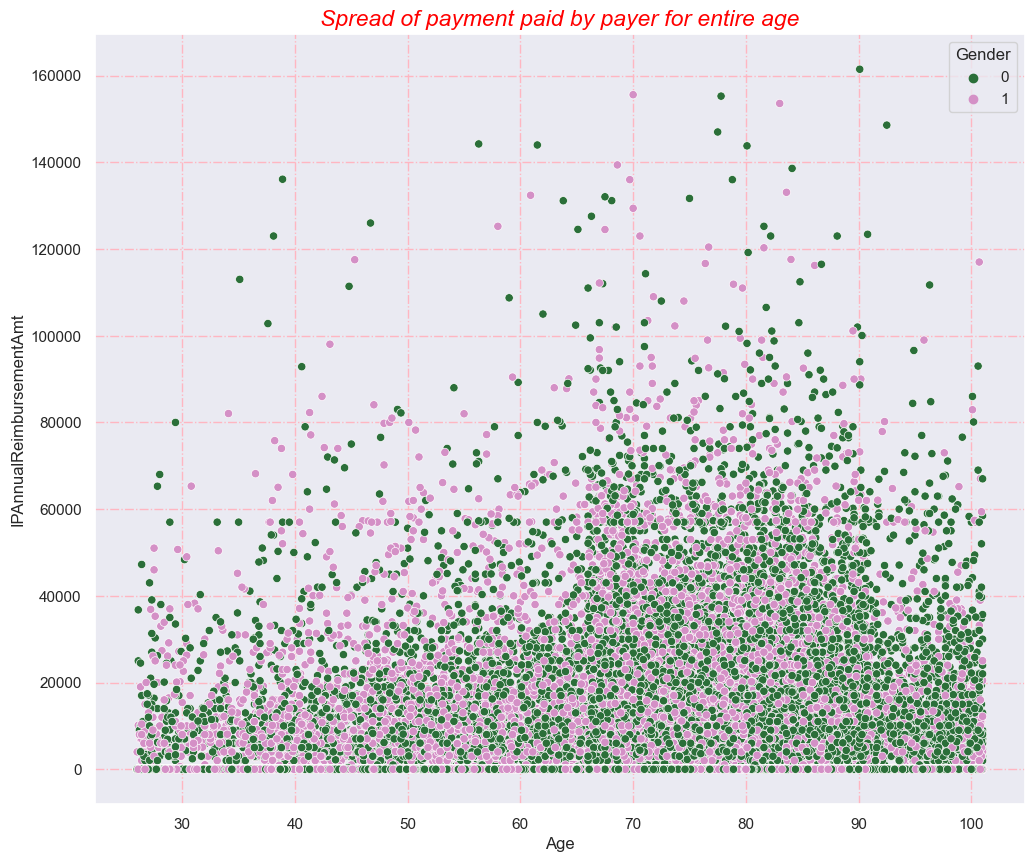

In [142]:
# Spread of payment made by payer on the basis of age for IPAnnual Reimb
plt.figure(figsize=(12,10))
sns.scatterplot(data=bene_train_df,x='Age',y='IPAnnualReimbursementAmt',hue='Gender',palette='cubehelix')
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer for entire age", fontdict=title_font_dict)
plt.show()

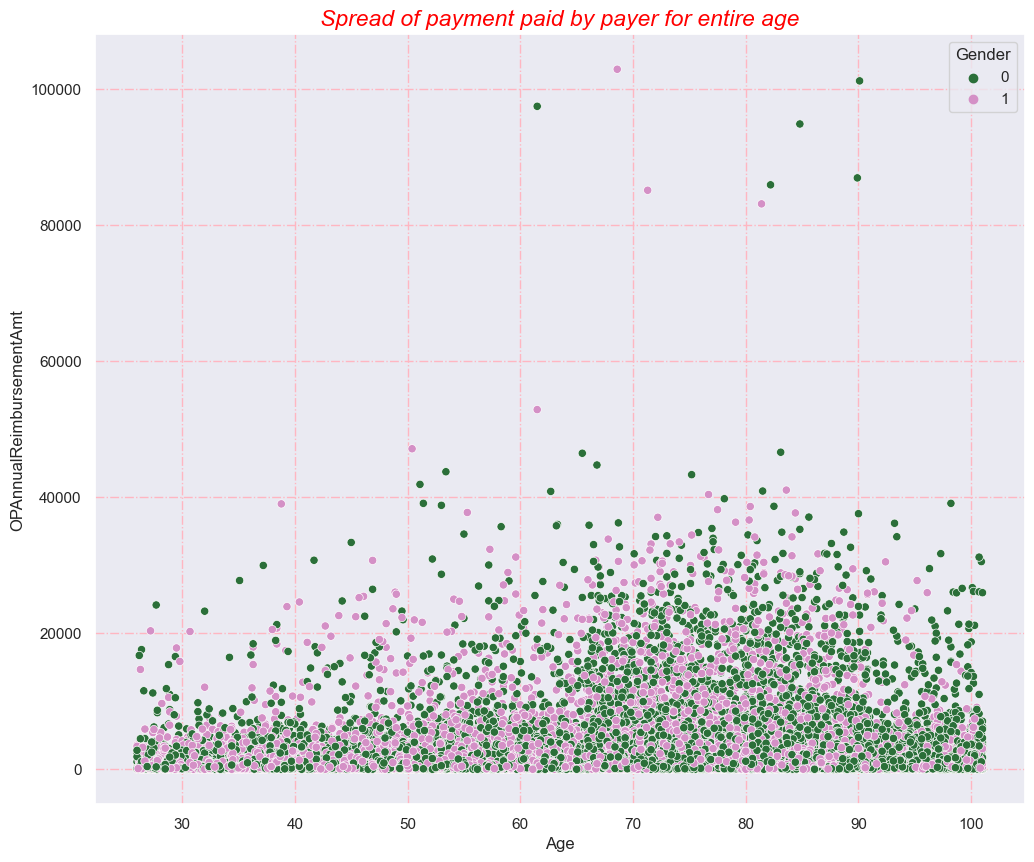

In [143]:
# Spread of payment made by payer on the basis of age for OPAnnualReimb
plt.figure(figsize=(12,10))
sns.scatterplot(data=bene_train_df,x='Age',y='OPAnnualReimbursementAmt',hue='Gender',palette='cubehelix')
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer for entire age", fontdict=title_font_dict)
plt.show()

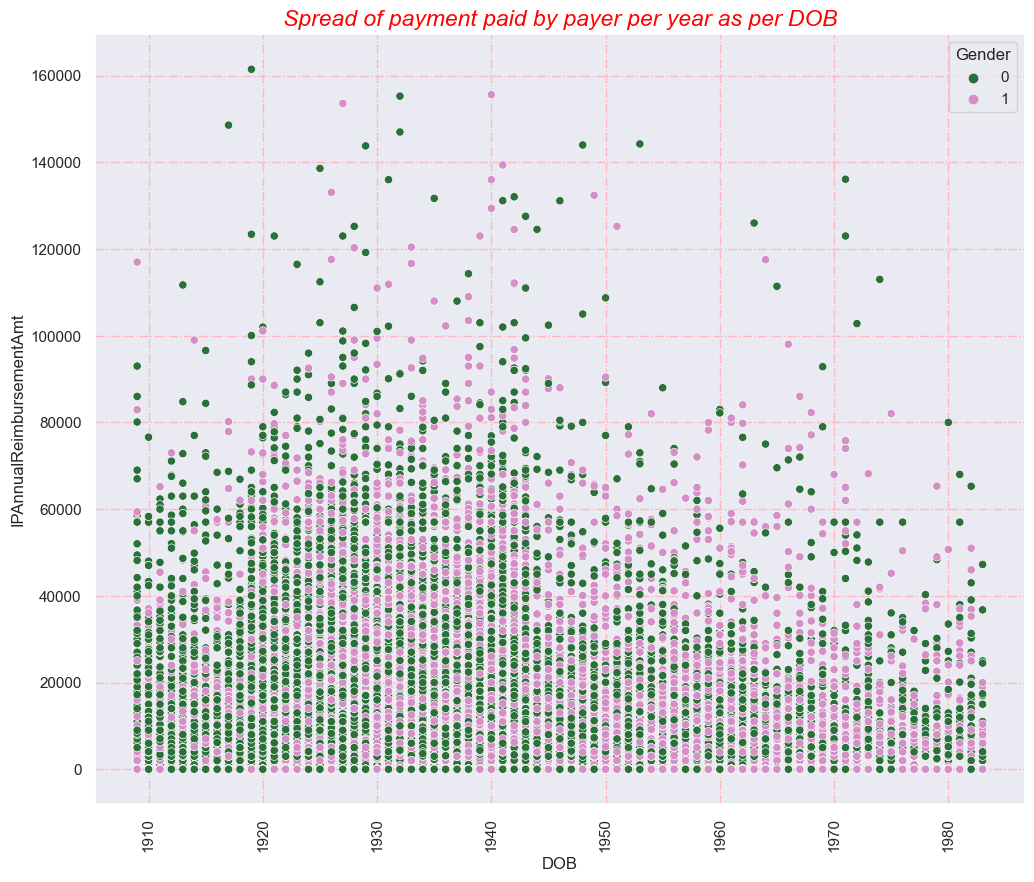

In [144]:
# Spread of payment made by payer on the yearwise
plt.figure(figsize=(12,10))
sns.scatterplot(data=bene_train_df,x=bene_train_df['DOB'].dt.year,y='IPAnnualReimbursementAmt',hue='Gender',palette='cubehelix')
plt.xticks(rotation=90,fontsize=11)
plt.grid(which='major', linestyle="-.", color='lightpink')
plt.minorticks_on()
plt.title("Spread of payment paid by payer per year as per DOB", fontdict=title_font_dict)
plt.show()

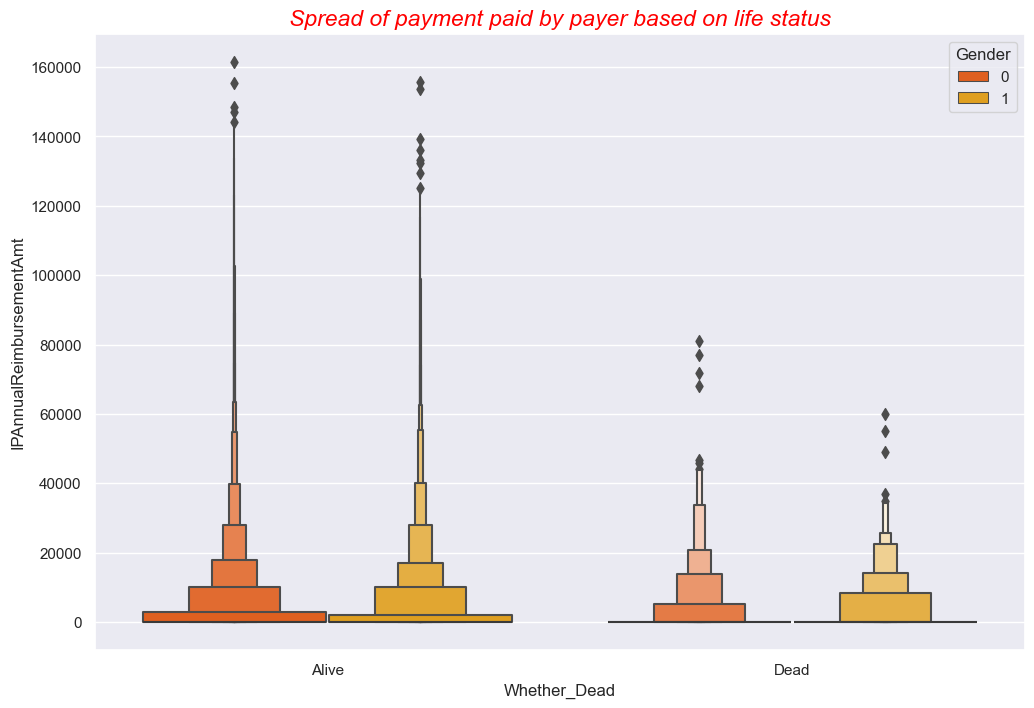

In [145]:
# payment based on dead or alive
plt.figure(figsize=(12,8))
sns.boxenplot(data=bene_train_df, x='Whether_Dead', y='IPAnnualReimbursementAmt', hue='Gender', palette='autumn')
plt.minorticks_on()
plt.xticks(ticks=[0,1],labels=['Alive','Dead'],rotation=0)
plt.title("Spread of payment paid by payer based on life status", fontdict=title_font_dict)
plt.show()

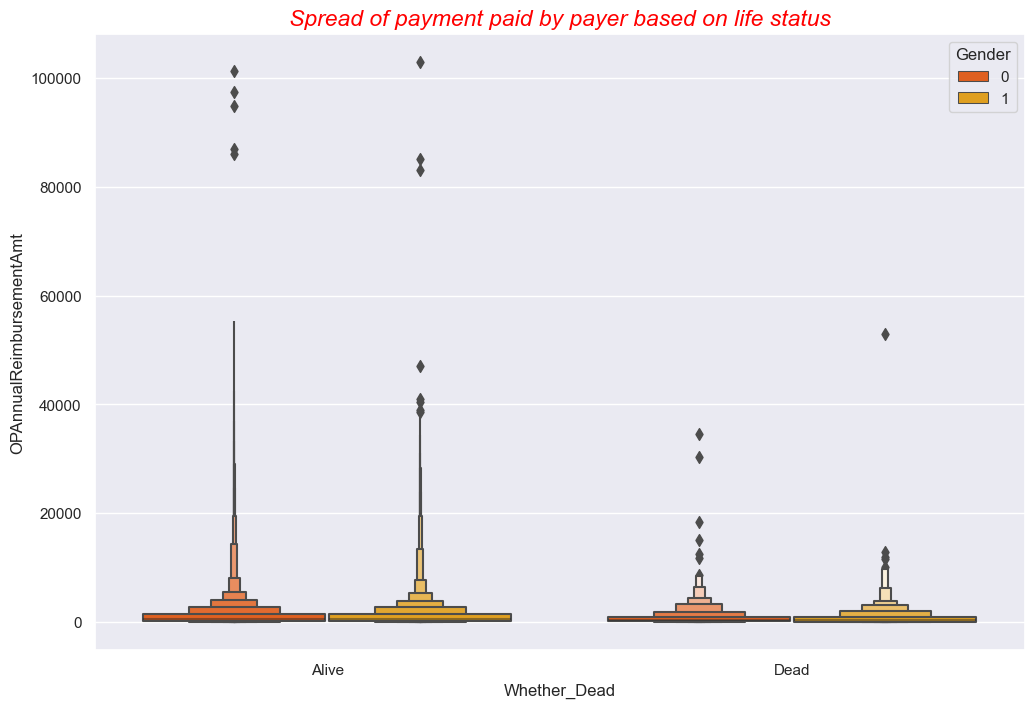

In [146]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=bene_train_df, x='Whether_Dead', y='OPAnnualReimbursementAmt', hue='Gender', palette='autumn')
plt.minorticks_on()
plt.xticks(ticks=[0,1],labels=['Alive','Dead'],rotation=0)
plt.title("Spread of payment paid by payer based on life status", fontdict=title_font_dict)
plt.show()

In [147]:
train_alldata['AdmitDays'].isnull().sum()  # so it means that we have 517737 OP claims verified from OP table
# we have 517737 rows with admit days null values which is equivalent to number OP claims.
# so we will update the null values with zero as OP patients admit days should be zero.

517737

In [148]:
train_alldata.shape

(558211, 57)

In [149]:
op_train_df.shape

(517737, 27)

In [150]:
# rows with admit days as zero are outpatient claims so they have admit days as zero so filling with zero
train_alldata['AdmitDays']=train_alldata['AdmitDays'].fillna(0)
test_alldata['AdmitDays']=test_alldata['AdmitDays'].fillna(0)

In [151]:
print(train_alldata['AdmitDays'].isnull().sum())  # now we have no null values in admit days.
print(test_alldata['AdmitDays'].isnull().sum())

0
0


In [152]:
# Copy the train all and test all dataset for backup purpose
train_alldata_1=train_alldata.copy()
test_alldata_1=test_alldata.copy()

In [153]:
train_alldata_1.shape

(558211, 57)

In [154]:
# Restore the data
#train_alldata=train_alldata_1.copy()
#test_alldata=test_alldata_1.copy()

In [155]:
####################### For Train Data    ################################

# For Diags related feild we will Assign value to 1 and null claim to 0
train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']] = train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
          'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
          'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].where(~train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 
          'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
          'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].notna(),1)

train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']] = train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
          'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
          'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].where(train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 
          'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
          'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].notna(),0)



#change type of columns from string into int
train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']] = train_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].astype('int64')

# Sum number of claims
claim_diagnose = []

for i in range(len(train_alldata)):
    claim_diagnose.append(train_alldata['ClmDiagnosisCode_1'][i]+ train_alldata['ClmDiagnosisCode_2'][i]+ 
                          train_alldata['ClmDiagnosisCode_3'][i]+ train_alldata['ClmDiagnosisCode_4'][i]+ 
                          train_alldata['ClmDiagnosisCode_5'][i]+ train_alldata['ClmDiagnosisCode_6'][i]+
                          train_alldata['ClmDiagnosisCode_7'][i]+ train_alldata['ClmDiagnosisCode_8'][i]+
                          train_alldata['ClmDiagnosisCode_9'][i]+ train_alldata['ClmDiagnosisCode_10'][i]+
                          train_alldata['ClmAdmitDiagnosisCode'][i])

#Put into a column.
train_alldata['num_claim_diagnose'] = claim_diagnose

In [156]:
train_alldata['num_claim_diagnose'].value_counts()

1     150215
2     132284
3      86963
4      57620
5      30567
10     27682
6      19709
9      15833
7      13882
8      11208
0       8319
11      3929
Name: num_claim_diagnose, dtype: int64

In [157]:
#drop columns of claim code.
train_alldata.drop(columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                         'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode'], axis = 1, inplace = True)

In [158]:
####################### For Test Data    ################################

# For Diags related feild we will Assign value to 1 and null claim to 0
test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']] = test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
          'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
          'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].where(~test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 
          'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
          'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].notna(),1)

test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']] = test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
          'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
          'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].where(test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 
          'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5','ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
          'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].notna(),0)



#change type of columns from string into int
test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']] = test_alldata[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
          'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
          'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode']].astype('int64')

# Sum number of claims
claim_diagnose = []

for i in range(len(test_alldata)):
    claim_diagnose.append(test_alldata['ClmDiagnosisCode_1'][i]+ test_alldata['ClmDiagnosisCode_2'][i]+ 
                          test_alldata['ClmDiagnosisCode_3'][i]+ test_alldata['ClmDiagnosisCode_4'][i]+ 
                          test_alldata['ClmDiagnosisCode_5'][i]+ test_alldata['ClmDiagnosisCode_6'][i]+
                          test_alldata['ClmDiagnosisCode_7'][i]+ test_alldata['ClmDiagnosisCode_8'][i]+
                          test_alldata['ClmDiagnosisCode_9'][i]+ test_alldata['ClmDiagnosisCode_10'][i]+
                          test_alldata['ClmAdmitDiagnosisCode'][i])

#Put into a column.
test_alldata['num_claim_diagnose'] = claim_diagnose

In [159]:
test_alldata['num_claim_diagnose'].value_counts()

1     36648
2     32079
3     21013
4     14072
5      7435
10     6548
6      4748
9      3850
7      3358
8      2668
0      2086
11      887
Name: num_claim_diagnose, dtype: int64

In [160]:
#drop columns of claim code.
test_alldata.drop(columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                         'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                         'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10','ClmAdmitDiagnosisCode'], axis = 1, inplace = True)

In [161]:
############################## For Train Data ##########################
# For procedure codes related feild we will Assign value to 1 and null claim to 0
train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']] = train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].where(~train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].notna(),1)
train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']] = train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].where(train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].notna(),0)



#change type of columns from string into int
train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']] = train_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].astype('int64')

# Sum number of claims
claim_procedure = []

for i in range(len(train_alldata)):
    claim_procedure.append(train_alldata['ClmProcedureCode_1'][i]+ train_alldata['ClmProcedureCode_2'][i]+ 
                          train_alldata['ClmProcedureCode_3'][i]+ train_alldata['ClmProcedureCode_4'][i]+ 
                          train_alldata['ClmProcedureCode_5'][i]+ train_alldata['ClmProcedureCode_6'][i])

#Put into a column.
train_alldata['num_claim_procedure'] = claim_procedure

In [162]:
train_alldata['num_claim_procedure'].value_counts()

0    534901
1     17820
2      4521
3       851
4       109
5         9
Name: num_claim_procedure, dtype: int64

In [163]:
#drop columns of procedure codes.
train_alldata.drop(columns = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6'], axis = 1, inplace = True)
# other reasoning to drop these columns could be to that these coln have more than 95% of null values

In [164]:
############################## For Test Data ##########################
# For procedure codes related feild we will Assign value to 1 and null claim to 0
test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']] = test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].where(~test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].notna(),1)
test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']] = test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].where(test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].notna(),0)



#change type of columns from string into int
test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']] = test_alldata[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6']].astype('int64')

# Sum number of claims
claim_procedure = []

for i in range(len(test_alldata)):
    claim_procedure.append(test_alldata['ClmProcedureCode_1'][i]+ test_alldata['ClmProcedureCode_2'][i]+ 
                          test_alldata['ClmProcedureCode_3'][i]+ test_alldata['ClmProcedureCode_4'][i]+ 
                          test_alldata['ClmProcedureCode_5'][i]+ test_alldata['ClmProcedureCode_6'][i])

#Put into a column.
test_alldata['num_claim_procedure'] = claim_procedure

In [165]:
test_alldata['num_claim_procedure'].value_counts()

0    129925
1      4204
2      1038
3       196
4        27
5         2
Name: num_claim_procedure, dtype: int64

In [166]:
#drop columns of procedure codes.
test_alldata.drop(columns = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
          'ClmProcedureCode_6'], axis = 1, inplace = True)
# other reasoning to drop these columns could be to that these coln have more than 95% of null values

In [167]:
print(train_alldata.shape)
print(test_alldata.shape)

(558211, 42)
(135392, 41)


In [168]:
# check NUll values percentages
print(train_alldata.isnull().sum()/len(train_alldata)*100)
print(test_alldata.isnull().sum()/len(test_alldata)*100)

# we can drop AdmissionDt and DischargeDt column as we already have admit days column representing the stay of patient. 
#    if claim will be outpatien tthen that will be zero. 
#    Also the frauds will not be dependent on the dates those pateints are coming in

BeneID                              0.000000
ClaimID                             0.000000
ClaimStartDt                        0.000000
ClaimEndDt                          0.000000
Provider                            0.000000
InscClaimAmtReimbursed              0.000000
AttendingPhysician                  0.270149
OperatingPhysician                 79.497538
OtherPhysician                     64.218548
DeductibleAmtPaid                   0.161050
AdmissionDt                        92.749337
DischargeDt                        92.749337
DiagnosisGroupCode                 92.749337
AdmitDays                           0.000000
DOB                                 0.000000
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCon

In [169]:
print('Train Data Details:')
a=(train_alldata["AttendingPhysician"]==train_alldata["OperatingPhysician"])
print('Records with same AttendingPhysician and OperatingPhysician is:', a.sum())

b=(train_alldata["AttendingPhysician"]==train_alldata["OtherPhysician"])
print('Records with same AttendingPhysician and OtherPhysician is:', b.sum())

c=(train_alldata["OtherPhysician"]==train_alldata["OperatingPhysician"])
print('Records with same OtherPhysician and OperatingPhysician is:', c.sum())

print('\nTest Data Details:')

d=(test_alldata["AttendingPhysician"]==test_alldata["OperatingPhysician"])
print('Records with same AttendingPhysician and OperatingPhysician is:', d.sum())

e=(test_alldata["AttendingPhysician"]==test_alldata["OtherPhysician"])
print('Records with same AttendingPhysician and OtherPhysician is:', e.sum())

f=(test_alldata["OtherPhysician"]==test_alldata["OperatingPhysician"])
print('Records with same OtherPhysician and OperatingPhysician is:', f.sum())
# we cann see on many claims multiple physicians are same, 

Train Data Details:
Records with same AttendingPhysician and OperatingPhysician is: 61164
Records with same AttendingPhysician and OtherPhysician is: 85258
Records with same OtherPhysician and OperatingPhysician is: 15884

Test Data Details:
Records with same AttendingPhysician and OperatingPhysician is: 14280
Records with same AttendingPhysician and OtherPhysician is: 20164
Records with same OtherPhysician and OperatingPhysician is: 3788


In [170]:
# so we will create a column specifying if attendng physicians are same or not

def phy_same(row):
    atte_oper=row['AttendingPhysician']==row['OperatingPhysician']
    oper_oth=row['OperatingPhysician']==row['OtherPhysician']
    atte_oth=row['AttendingPhysician']==row['OtherPhysician']
    if atte_oper==True and oper_oth==True:
        return 0
    elif atte_oper==True and oper_oth==False:
        return 1
    elif atte_oper==False and oper_oth==True:
        return 2
    else:
        return 3

In [171]:
physician_same=train_alldata.apply(phy_same,axis=1)
train_alldata['physician_same']=physician_same

In [172]:
physician_same=test_alldata.apply(phy_same,axis=1)
test_alldata['physician_same']=physician_same

In [173]:
train_alldata.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      40          PHY334319                NaN   

  OtherPhysician  DeductibleAmtPaid AdmissionDt DischargeDt  \
0            NaN                0.0         NaT         NaT   
1            NaN                0.0         NaT         NaT   

  DiagnosisGroupCode  AdmitDays        DOB  ...  ChronicCond_Diabetes  \
0                NaN        0.0 1936-09-01  ...                     0   
1                NaN        0.0 1922-07-01  ...                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          0                         0   
1                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                0                   0   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                         0                      0                        30   
1                         0                      0                      1810   

   OPAnnualDeductibleAmt  Whether_Dead   Age  PotentialFraud  \
0                     50             0  73.3             Yes   
1                    760             0  87.5             Yes   

   num_claim_diagnose  num_claim_procedure  physician_same  
0                   4                    0               3  
1                   1                    0               3  

[2 rows x 43 columns]

In [174]:
test_alldata.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11536  CLM169510   2009-02-01  2009-02-01  PRV55962   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                     100          PHY404476                NaN   

  OtherPhysician  DeductibleAmtPaid AdmissionDt DischargeDt  \
0      PHY347633                0.0         NaT         NaT   
1            NaN                0.0         NaT         NaT   

  DiagnosisGroupCode  AdmitDays        DOB  ...  ChronicCond_Depression  \
0                NaN        0.0 1943-01-01  ...                       1   
1                NaN        0.0 1924-05-01  ...                       1   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         0   
1                     1                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   1   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                      3000                   1068                      1580   

   OPAnnualDeductibleAmt  Whether_Dead   Age  num_claim_diagnose  \
0                     70             0  67.0                   6   
1                    160             0  85.6                   4   

   num_claim_procedure  physician_same  
0                    0               3  
1                    0               3  

[2 rows x 42 columns]

In [175]:
# check if we have negative values for deduct features
print('Min IP Deduct:',train_alldata['InscClaimAmtReimbursed'].min())
print('Min OP Deduct:',train_alldata['DeductibleAmtPaid'].min())
print('Min IP Deduct:',test_alldata['InscClaimAmtReimbursed'].min())
print('Min OP Deduct:',test_alldata['DeductibleAmtPaid'].min())

Min IP Deduct: 0
Min OP Deduct: 0.0
Min IP Deduct: 0
Min OP Deduct: 0.0


In [176]:
# we will also create a function for different unique physicians on the claim
def phy_count(row,list_count):
    count=0
    for value in list_count:
        if pd.isnull(row[value]):
            continue
        else:
            count+=1
    return count
    
list_count=['AttendingPhysician','OperatingPhysician','OtherPhysician']

physician_count=train_alldata.apply(phy_count,axis=1,args=(list_count,))
train_alldata['physician_count']=physician_count

physician_count=test_alldata.apply(phy_count,axis=1,args=(list_count,))
test_alldata['physician_count']=physician_count

In [177]:
train_alldata.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      40          PHY334319                NaN   

  OtherPhysician  DeductibleAmtPaid AdmissionDt DischargeDt  \
0            NaN                0.0         NaT         NaT   
1            NaN                0.0         NaT         NaT   

  DiagnosisGroupCode  AdmitDays        DOB  ...  ChronicCond_IschemicHeart  \
0                NaN        0.0 1936-09-01  ...                          0   
1                NaN        0.0 1922-07-01  ...                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                0   
1                         1                                1   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   0                         0                      0   
1                   0                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Whether_Dead   Age  \
0                        30                     50             0  73.3   
1                      1810                    760             0  87.5   

   PotentialFraud  num_claim_diagnose  num_claim_procedure  physician_same  \
0             Yes                   4                    0               3   
1             Yes                   1                    0               3   

   physician_count  
0                1  
1                1  

[2 rows x 44 columns]

In [178]:
test_alldata.head(2)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11536  CLM169510   2009-02-01  2009-02-01  PRV55962   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                     100          PHY404476                NaN   

  OtherPhysician  DeductibleAmtPaid AdmissionDt DischargeDt  \
0      PHY347633                0.0         NaT         NaT   
1            NaN                0.0         NaT         NaT   

  DiagnosisGroupCode  AdmitDays        DOB  ...  ChronicCond_Diabetes  \
0                NaN        0.0 1943-01-01  ...                     1   
1                NaN        0.0 1924-05-01  ...                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   1   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                      3000                   1068                      1580   

   OPAnnualDeductibleAmt  Whether_Dead   Age  num_claim_diagnose  \
0                     70             0  67.0                   6   
1                    160             0  85.6                   4   

   num_claim_procedure  physician_same  physician_count  
0                    0               3                2  
1                    0               3                1  

[2 rows x 43 columns]

In [179]:
train_alldata.info()
#ClaimStartDt and ClaimEndDt are object type. SO we will be changing them to datetype and calculate the period of claim

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  object        
 1   ClaimID                          558211 non-null  object        
 2   ClaimStartDt                     558211 non-null  object        
 3   ClaimEndDt                       558211 non-null  object        
 4   Provider                         558211 non-null  object        
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               556703 non-null  object        
 7   OperatingPhysician               114447 non-null  object        
 8   OtherPhysician                   199736 non-null  object        
 9   DeductibleAmtPaid                557312 non-null  float64       
 10  AdmissionDt                      40474 non-n

In [180]:
train_alldata['ClaimStartDt']=pd.to_datetime(train_alldata['ClaimStartDt'],format = '%Y-%m-%d')
train_alldata['ClaimEndDt']=pd.to_datetime(train_alldata['ClaimEndDt'],format = '%Y-%m-%d')
period_of_claim=(train_alldata['ClaimEndDt']-train_alldata['ClaimStartDt']).dt.days+1
period_of_claim
train_alldata['period_of_claim']=period_of_claim

In [181]:
test_alldata['ClaimStartDt']=pd.to_datetime(test_alldata['ClaimStartDt'],format = '%Y-%m-%d')
test_alldata['ClaimEndDt']=pd.to_datetime(test_alldata['ClaimEndDt'],format = '%Y-%m-%d')
period_of_claim=(test_alldata['ClaimEndDt']-test_alldata['ClaimStartDt']).dt.days+1
period_of_claim
test_alldata['period_of_claim']=period_of_claim

In [182]:
train_alldata.head(2)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11 2009-10-11  PRV56011   
1  BENE11004  CLM121801   2009-01-06 2009-01-06  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      40          PHY334319                NaN   

  OtherPhysician  DeductibleAmtPaid AdmissionDt DischargeDt  \
0            NaN                0.0         NaT         NaT   
1            NaN                0.0         NaT         NaT   

  DiagnosisGroupCode  AdmitDays        DOB  ...  ChronicCond_Osteoporasis  \
0                NaN        0.0 1936-09-01  ...                         0   
1                NaN        0.0 1922-07-01  ...                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                0                   0   
1                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                         0                      0                        30   
1                         0                      0                      1810   

   OPAnnualDeductibleAmt  Whether_Dead   Age  PotentialFraud  \
0                     50             0  73.3             Yes   
1                    760             0  87.5             Yes   

   num_claim_diagnose  num_claim_procedure  physician_same  physician_count  \
0                   4                    0               3                1   
1                   1                    0               3                1   

   period_of_claim  
0                1  
1                1  

[2 rows x 45 columns]

In [183]:
test_alldata.head(2)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02 2009-06-02  PRV55962   
1  BENE11536  CLM169510   2009-02-01 2009-02-01  PRV55962   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                     100          PHY404476                NaN   

  OtherPhysician  DeductibleAmtPaid AdmissionDt DischargeDt  \
0      PHY347633                0.0         NaT         NaT   
1            NaN                0.0         NaT         NaT   

  DiagnosisGroupCode  AdmitDays        DOB  ...  ChronicCond_IschemicHeart  \
0                NaN        0.0 1943-01-01  ...                          1   
1                NaN        0.0 1924-05-01  ...                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         1                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   1                      3000                   1068   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Whether_Dead   Age  \
0                        60                     70             0  67.0   
1                      1580                    160             0  85.6   

   num_claim_diagnose  num_claim_procedure  physician_same  physician_count  \
0                   6                    0               3                2   
1                   4                    0               3                1   

   period_of_claim  
0                1  
1                1  

[2 rows x 44 columns]

In [184]:
# we will drop the unwanted columsn which we have already manipulated
train_alldata.drop(columns=['ClaimStartDt', 'ClaimEndDt','AttendingPhysician', 'OperatingPhysician','OtherPhysician',
                'AdmissionDt', 'DischargeDt','DiagnosisGroupCode','DOB'],axis=1,inplace=True)
test_alldata.drop(columns=['ClaimStartDt', 'ClaimEndDt','AttendingPhysician', 'OperatingPhysician','OtherPhysician',
                'AdmissionDt', 'DischargeDt','DiagnosisGroupCode','DOB'],axis=1,inplace=True)

In [185]:
print(train_alldata.shape)
print(test_alldata.shape)

(558211, 36)
(135392, 35)


In [186]:
train_alldata['PotentialFraud']=train_alldata['PotentialFraud'].map({'No':0,'Yes':1})

In [187]:
print(train_alldata.info())
## Now all the features are converted to numerical form except for BeneficiaryID,ClaimID and ProviderID
print(test_alldata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   Provider                         558211 non-null  object 
 3   InscClaimAmtReimbursed           558211 non-null  int64  
 4   DeductibleAmtPaid                557312 non-null  float64
 5   AdmitDays                        558211 non-null  float64
 6   Gender                           558211 non-null  int64  
 7   Race                             558211 non-null  int64  
 8   RenalDiseaseIndicator            558211 non-null  int64  
 9   State                            558211 non-null  int64  
 10  County                           558211 non-null  int64  
 11  NoOfMonths_PartACov              558211 non-null  int64  
 12  No

In [188]:
train_alldata['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [189]:
train_alldata.isnull().sum()/len(train_alldata)*100
# still we have .16% of the data in which deducctibel amount paid is null

BeneID                             0.00000
ClaimID                            0.00000
Provider                           0.00000
InscClaimAmtReimbursed             0.00000
DeductibleAmtPaid                  0.16105
AdmitDays                          0.00000
Gender                             0.00000
Race                               0.00000
RenalDiseaseIndicator              0.00000
State                              0.00000
County                             0.00000
NoOfMonths_PartACov                0.00000
NoOfMonths_PartBCov                0.00000
ChronicCond_Alzheimer              0.00000
ChronicCond_Heartfailure           0.00000
ChronicCond_KidneyDisease          0.00000
ChronicCond_Cancer                 0.00000
ChronicCond_ObstrPulmonary         0.00000
ChronicCond_Depression             0.00000
ChronicCond_Diabetes               0.00000
ChronicCond_IschemicHeart          0.00000
ChronicCond_Osteoporasis           0.00000
ChronicCond_rheumatoidarthritis    0.00000
ChronicCond

In [190]:
test_alldata.isnull().sum()/len(test_alldata)*100

BeneID                             0.000000
ClaimID                            0.000000
Provider                           0.000000
InscClaimAmtReimbursed             0.000000
DeductibleAmtPaid                  0.144765
AdmitDays                          0.000000
Gender                             0.000000
Race                               0.000000
RenalDiseaseIndicator              0.000000
State                              0.000000
County                             0.000000
NoOfMonths_PartACov                0.000000
NoOfMonths_PartBCov                0.000000
ChronicCond_Alzheimer              0.000000
ChronicCond_Heartfailure           0.000000
ChronicCond_KidneyDisease          0.000000
ChronicCond_Cancer                 0.000000
ChronicCond_ObstrPulmonary         0.000000
ChronicCond_Depression             0.000000
ChronicCond_Diabetes               0.000000
ChronicCond_IschemicHeart          0.000000
ChronicCond_Osteoporasis           0.000000
ChronicCond_rheumatoidarthritis 

In [191]:
train_alldata['DeductibleAmtPaid'].value_counts()/len(train_alldata)*100
# almost 88% of the deductible paid columns are having 0 values whcih is justified by the fact that most of the 
#services under medicare are sponsered by payers so we will append the null values with 0

0.0       88.980869
1068.0     7.089613
100.0      0.820837
70.0       0.433528
60.0       0.369932
40.0       0.366349
80.0       0.362587
50.0       0.352734
20.0       0.251876
30.0       0.239336
90.0       0.223034
10.0       0.215510
200.0      0.131491
876.0      0.000358
865.0      0.000358
897.0      0.000358
886.0      0.000179
Name: DeductibleAmtPaid, dtype: float64

In [192]:
train_alldata['DeductibleAmtPaid'].describe()

count    557312.000000
mean         78.421085
std         274.016812
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1068.000000
Name: DeductibleAmtPaid, dtype: float64

In [193]:
train_alldata['DeductibleAmtPaid']=train_alldata['DeductibleAmtPaid'].fillna(0)
test_alldata['DeductibleAmtPaid']=test_alldata['DeductibleAmtPaid'].fillna(0)

In [194]:
train_alldata.isnull().sum()/len(train_alldata)*100
# now we dont have any null value

BeneID                             0.0
ClaimID                            0.0
Provider                           0.0
InscClaimAmtReimbursed             0.0
DeductibleAmtPaid                  0.0
AdmitDays                          0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt    

In [195]:
test_alldata.isnull().sum()/len(test_alldata)*100
# now we dont have any null value

BeneID                             0.0
ClaimID                            0.0
Provider                           0.0
InscClaimAmtReimbursed             0.0
DeductibleAmtPaid                  0.0
AdmitDays                          0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt    

In [196]:
# we will drop the beneID and ClaimID  as ID will not matter in prediction gif its a fraud or not
train_alldata.drop(columns=['BeneID','ClaimID'],axis=1,inplace=True)
test_alldata.drop(columns=['BeneID','ClaimID'],axis=1,inplace=True)


In [197]:
train_alldata['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [198]:
# from the above EDA we can see that the potential frauds are not dependent on state ,race,gender and county so we will drop these columns
train_alldata.drop(columns=['Gender','Race','State','County'],axis=1,inplace=True)
test_alldata.drop(columns=['Gender','Race','State','County'],axis=1,inplace=True)


In [199]:
# final shape after cleaning and removing unwanted variables
train_alldata.shape

(558211, 30)

In [200]:
# final test shape after cleaning and removing unwanted variables
test_alldata.shape

(135392, 29)

### As per the data there is a very important assumption: 
#### Practically speaking one provider can be involved on more than 1 claim. So, it does not mean that all those claims will be potential fraudelent claims
#### This cannot holds True for all the providers because if one provider has filed say 50 claims  then we can't say that all the claims for that provider are fraudulent. 
#### There may exists a pattern that out of 50 claims a provider files 1 or 2 fraudulent claims. 

#### Therefore, it is a big assumption to make that all the claims filed by a potentially fraud provider are fraudulent. But as per data we need to take that assumption as the potential fraud column is ties to the provider feild.

In [201]:
# save dataframe for backup
train_alldata_2=train_alldata.copy()
test_alldata_2=test_alldata.copy()

In [202]:
# # Restore data 
# train_alldata=train_alldata_2.copy()
# test_alldata=test_alldata_2.copy()

In [203]:
# we will groupthe train data on the basis of provider ID as the frauds column is specific to a provider ID.
train_alldata = train_alldata.groupby(['Provider'],as_index=False).agg('mean')
print('Shape of train Data:',train_alldata.shape)
train_alldata.head(2)

Shape of train Data: (5410, 30)


Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitDays  \
0  PRV51001             4185.600000         213.600000   1.200000   
1  PRV51003             4588.409091         502.166667   2.893939   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0               0.320000            12.000000            12.000000   
1               0.219697            11.818182            11.871212   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0               0.600000                  0.760000                   0.680000   
1               0.424242                  0.606061                   0.484848   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0            0.200000                    0.400000                0.360000   
1            0.075758                    0.310606                0.409091   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0              0.840000                   0.920000                      0.24   
1              0.757576                   0.848485                      0.25   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                         0.320000            0.240000   
1                         0.287879            0.090909   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0              17606.000000             897.120000               2615.200000   
1               7568.181818             931.424242               2678.181818   

   OPAnnualDeductibleAmt  Whether_Dead        Age  PotentialFraud  \
0             463.920000      0.000000  78.804000             0.0   
1             737.121212      0.007576  70.044697             1.0   

   num_claim_diagnose  num_claim_procedure  physician_same  physician_count  \
0            3.640000             0.120000        2.960000         1.600000   
1            5.840909             0.363636        2.439394         1.530303   

   period_of_claim  
0         2.440000  
1         4.674242

In [204]:
# we will group the test data on the basis of provider ID as the frauds column is specific to a provider ID.
test_alldata = test_alldata.groupby(['Provider'],as_index=False).agg('mean')
print('Shape of train Data:',test_alldata.shape)
test_alldata.head(2)

Shape of train Data: (1353, 29)


Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitDays  \
0  PRV51002              262.390244           1.853659        0.0   
1  PRV51006              301.176471           0.000000        0.0   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0               0.156098             11.82439                 12.0   
1               0.098039             12.00000                 12.0   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0               0.385366                  0.526829                   0.351220   
1               0.343137                  0.676471                   0.490196   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0            0.121951                    0.312195                0.443902   
1            0.147059                    0.362745                0.519608   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0              0.717073                   0.736585                  0.297561   
1              0.705882                   0.764706                  0.254902   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                         0.263415            0.092683   
1                         0.156863            0.078431   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0               5180.926829             548.253659               2345.073171   
1               3767.549020             479.647059               2401.666667   

   OPAnnualDeductibleAmt  Whether_Dead        Age  num_claim_diagnose  \
0             677.951220      0.014634  72.368780            2.878049   
1             605.882353      0.000000  74.806863            3.019608   

   num_claim_procedure  physician_same  physician_count  period_of_claim  
0                  0.0        2.858537         1.521951         1.980488  
1                  0.0        2.509804         1.607843         3.088235

In [205]:
train_alldata.drop(columns=['Provider'],axis=1,inplace=True)
test_alldata.drop(columns=['Provider'],axis=1,inplace=True)

In [206]:
# MOve the target column to the last
import movecolumn as mc
mc.MoveToLast(train_alldata,'PotentialFraud')
train_alldata.head()


InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitDays  \
0             4185.600000         213.600000   1.200000   
1             4588.409091         502.166667   2.893939   
2              350.134228           2.080537   0.000000   
3              241.124464           3.175966   0.000000   
4              468.194444          45.333333   0.263889   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0               0.320000            12.000000            12.000000   
1               0.219697            11.818182            11.871212   
2               0.154362            11.865772            11.959732   
3               0.222318            11.907296            11.939914   
4               0.152778            11.833333            11.833333   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0               0.600000                  0.760000                   0.680000   
1               0.424242                  0.606061                   0.484848   
2               0.429530                  0.590604                   0.335570   
3               0.365665                  0.583691                   0.435193   
4               0.361111                  0.555556                   0.305556   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0            0.200000                    0.400000                0.360000   
1            0.075758                    0.310606                0.409091   
2            0.107383                    0.275168                0.422819   
3            0.141631                    0.253219                0.416309   
4            0.166667                    0.222222                0.402778   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0              0.840000                   0.920000                  0.240000   
1              0.757576                   0.848485                  0.250000   
2              0.704698                   0.724832                  0.328859   
3              0.685837                   0.768240                  0.295279   
4              0.680556                   0.708333                  0.291667   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                         0.320000            0.240000   
1                         0.287879            0.090909   
2                         0.308725            0.114094   
3                         0.284120            0.106438   
4                         0.305556            0.166667   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0              17606.000000             897.120000               2615.200000   
1               7568.181818             931.424242               2678.181818   
2               4351.879195             434.953020               2194.899329   
3               3623.991416             379.162232               2109.733906   
4               3050.000000             445.000000               1729.722222   

   OPAnnualDeductibleAmt  Whether_Dead        Age  num_claim_diagnose  \
0             463.920000      0.000000  78.804000            3.640000   
1             737.121212      0.007576  70.044697            5.840909   
2             622.751678      0.006711  72.229530            2.771812   
3             636.328755      0.003433  70.509528            2.805150   
4             469.722222      0.013889  69.275000            3.222222   

   num_claim_procedure  physician_same  physician_count  period_of_claim  \
0             0.120000        2.960000         1.600000         2.440000   
1             0.363636        2.439394         1.530303         4.674242   
2             0.000000        2.818792         1.604027         2.429530   
3             0.000000        2.731330         1.599142         2.088412   
4             0.013889        2.736111         1.527778         1.958333   

   PotentialFraud  
0             0.0  
1             1.0  
2         

In [207]:
train_alldata['PotentialFraud'].value_counts() 
# data is highly imbalace so we will use oversampling technique to balance the dataset

0.0    4904
1.0     506
Name: PotentialFraud, dtype: int64

In [ ]:
# data for backup
train_alldata_3=train_alldata.copy()
test_alldata_3=test_alldata.copy()

<AxesSubplot: >

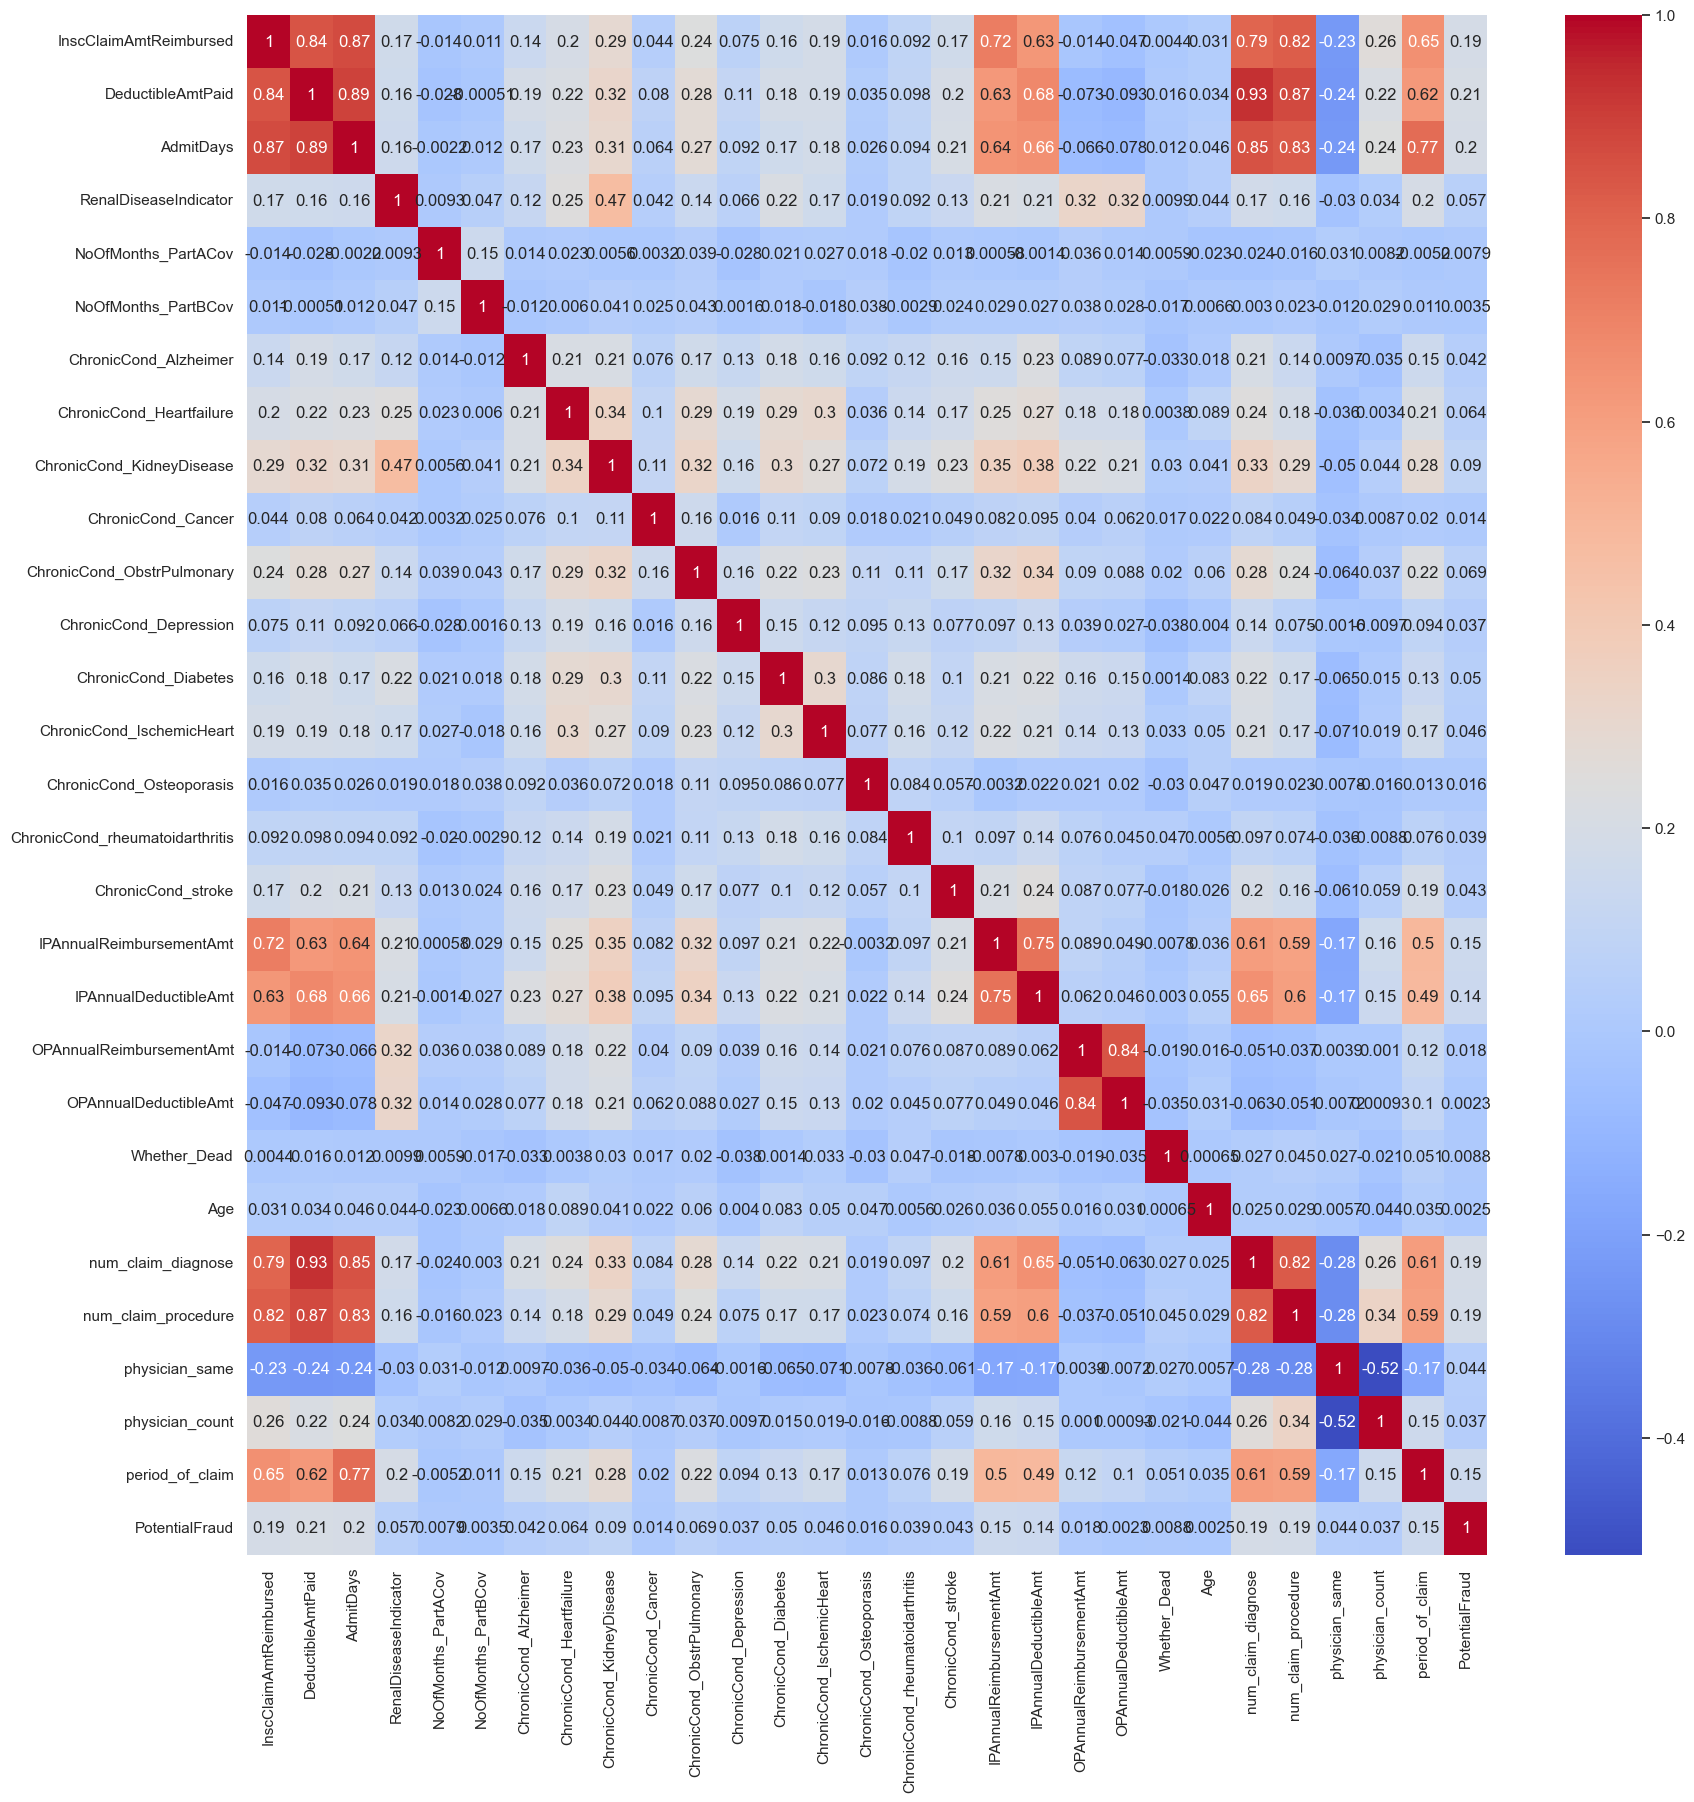

In [208]:
# See if there is a correlation  between features
plt.figure(figsize=(20,20))
sns.heatmap(data=train_alldata.corr(), annot=True,cmap='coolwarm')
# we can see some of the features are 80% correlated but we are not gonna drop them as they might have an 
#impact over model accuracy

In [209]:
X=train_alldata.iloc[:,:-1]
Y=train_alldata.iloc[:,-1]

In [210]:
X.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitDays  \
0             4185.600000         213.600000   1.200000   
1             4588.409091         502.166667   2.893939   
2              350.134228           2.080537   0.000000   
3              241.124464           3.175966   0.000000   
4              468.194444          45.333333   0.263889   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0               0.320000            12.000000            12.000000   
1               0.219697            11.818182            11.871212   
2               0.154362            11.865772            11.959732   
3               0.222318            11.907296            11.939914   
4               0.152778            11.833333            11.833333   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0               0.600000                  0.760000                   0.680000   
1               0.424242                  0.606061                   0.484848   
2               0.429530                  0.590604                   0.335570   
3               0.365665                  0.583691                   0.435193   
4               0.361111                  0.555556                   0.305556   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0            0.200000                    0.400000                0.360000   
1            0.075758                    0.310606                0.409091   
2            0.107383                    0.275168                0.422819   
3            0.141631                    0.253219                0.416309   
4            0.166667                    0.222222                0.402778   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0              0.840000                   0.920000                  0.240000   
1              0.757576                   0.848485                  0.250000   
2              0.704698                   0.724832                  0.328859   
3              0.685837                   0.768240                  0.295279   
4              0.680556                   0.708333                  0.291667   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                         0.320000            0.240000   
1                         0.287879            0.090909   
2                         0.308725            0.114094   
3                         0.284120            0.106438   
4                         0.305556            0.166667   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0              17606.000000             897.120000               2615.200000   
1               7568.181818             931.424242               2678.181818   
2               4351.879195             434.953020               2194.899329   
3               3623.991416             379.162232               2109.733906   
4               3050.000000             445.000000               1729.722222   

   OPAnnualDeductibleAmt  Whether_Dead        Age  num_claim_diagnose  \
0             463.920000      0.000000  78.804000            3.640000   
1             737.121212      0.007576  70.044697            5.840909   
2             622.751678      0.006711  72.229530            2.771812   
3             636.328755      0.003433  70.509528            2.805150   
4             469.722222      0.013889  69.275000            3.222222   

   num_claim_procedure  physician_same  physician_count  period_of_claim  
0             0.120000        2.960000         1.600000         2.440000  
1             0.363636        2.439394         1.530303         4.674242  
2             0.000000        2.818792         1.604027         2.429530  
3             0.000000        2.731330         1.599142         2.088412  
4             0.013889        2.736111         1.527778         1.958333

In [211]:
Y.head()


0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: PotentialFraud, dtype: float64

In [212]:
# Standardize the data as we will use  differnt models some can get impacted by the weights.
# so we will standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 0.70172636,  0.20079312,  0.09771025, ...,  0.79094977,
         0.08434558, -0.27896878],
       [ 0.81733819,  1.15976255,  0.86566126, ..., -0.68691047,
        -0.21270196,  0.80691631],
       [-0.39910587, -0.5021318 , -0.44631228, ...,  0.39009818,
         0.10150794, -0.2840573 ],
       ...,
       [-0.43495114, -0.49405087, -0.44631228, ...,  0.90449898,
         0.12592594, -0.3031512 ],
       [ 0.04572725, -0.50904587, -0.44631228, ...,  0.90449898,
        -2.47284627, -0.97883666],
       [-0.39352573, -0.49806236, -0.44631228, ..., -0.22618176,
        -0.0167863 , -0.1427186 ]])

In [213]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=101)

In [214]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4328, 28), (1082, 28), (4328,), (1082,))

In [215]:
# we will apply the oversampling technique only on train data as anything is possible is test data so we will not balance that
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [216]:
x_train.shape,y_train.shape


((7820, 28), (7820,))

In [217]:
y_train.value_counts()
# now we have balanced dats

0.0    3910
1.0    3910
Name: PotentialFraud, dtype: int64

In [218]:
y_test.value_counts()

0.0    994
1.0     88
Name: PotentialFraud, dtype: int64

In [219]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7820, 28), (1082, 28), (7820,), (1082,))

In [220]:
# Import Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score,f1_score

## Model-1 Logistics Regression


In [221]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(random_state=101)
logit.fit(x_train,y_train)

LogisticRegression(random_state=101)

In [222]:
y_pred_logit_train=logit.predict(x_train)
y_pred_logit_test=logit.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_logit_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_logit_test))

Training Accuracy Score: 0.6852941176470588
Test Accuracy Score: 0.7606284658040665


Text(0.5, 11.249999999999995, 'Predicted label')

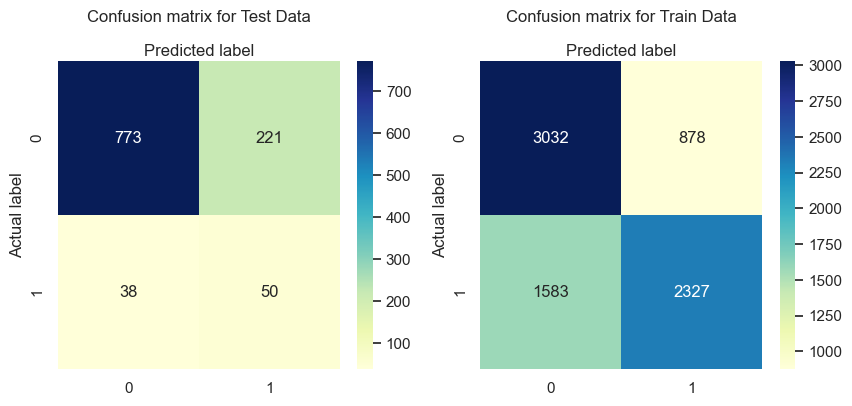

In [223]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_logit_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_logit_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 50 frauds sucessfully out of 88 frauds which is pretty good but we will try other models to 
#see if we can increase it.

In [224]:
print('Training f1 Score:',f1_score(y_train,y_pred_logit_train))
print('Test f1 Score:',f1_score(y_test,y_pred_logit_test))

Training f1 Score: 0.6541110330288123
Test f1 Score: 0.27855153203342614


In [225]:
print(classification_report(y_test,y_pred_logit_test))
# we can see that specificicy or TNR is 57% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       994
         1.0       0.18      0.57      0.28        88

    accuracy                           0.76      1082
   macro avg       0.57      0.67      0.57      1082
weighted avg       0.89      0.76      0.81      1082



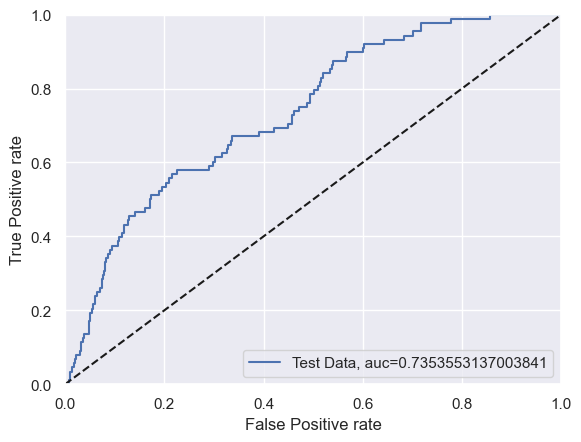

In [313]:
y_pred_proba = logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

## Model-2 Decision Tree Classifier

In [238]:
dt=DecisionTreeClassifier(random_state=101)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [239]:
y_pred_dt_train=dt.predict(x_train)
y_pred_dt_test=dt.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_dt_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_dt_test))
print('Training f1 Score:',f1_score(y_train,y_pred_dt_train))
print('Test f1 Score:',f1_score(y_test,y_pred_dt_test))

Training Accuracy Score: 1.0
Test Accuracy Score: 0.8752310536044362
Training f1 Score: 1.0
Test f1 Score: 0.425531914893617


Text(0.5, 11.249999999999995, 'Predicted label')

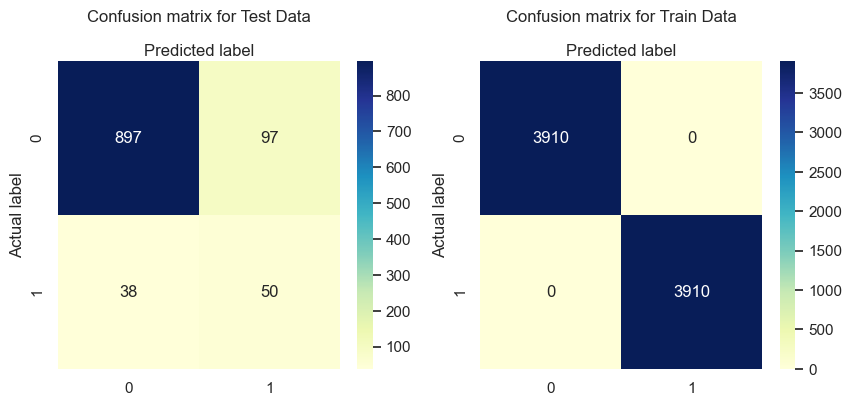

In [242]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_dt_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_dt_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

In [243]:
print(classification_report(y_test,y_pred_dt_test))
# we can see that specificicy or TNR is 56% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       994
         1.0       0.34      0.57      0.43        88

    accuracy                           0.88      1082
   macro avg       0.65      0.74      0.68      1082
weighted avg       0.91      0.88      0.89      1082



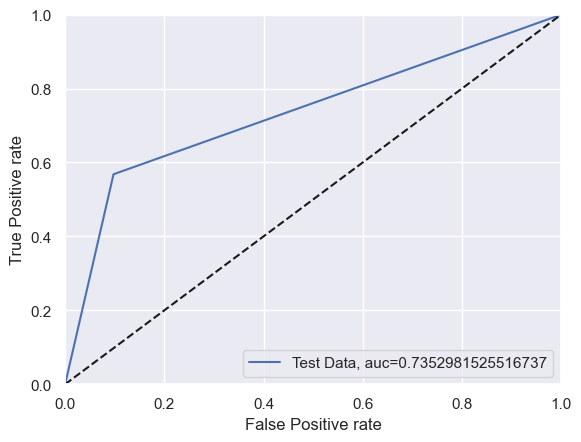

In [312]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [ ]:
# we will try to hypertune the Decisiontree parameters to see if the accuracy is getting improved

In [245]:
dt_tune=DecisionTreeClassifier()

In [246]:
import time
np.random.seed(101)
start=time.time()
param_dist={'criterion':['gini','entropy'],
            'max_depth':[10,11,12],
            'min_samples_split':[4,5,6],
            'min_samples_leaf':[1,3,5]}
cv_dt=GridSearchCV(dt_tune,cv=10,param_grid=param_dist,n_jobs=2)
cv_dt.fit(x_train,y_train)
print('Best parameters using gridsearch: \n',cv_dt.best_params_)
end=time.time()
print('Time taken in grid search:{0: .2f}'.format(end-start))

Best parameters using gridsearch: 
 {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 6}
Time taken in grid search: 192.25


In [247]:
dt_tune.set_params(criterion='gini', max_depth=12, min_samples_leaf=1, min_samples_split=6)

DecisionTreeClassifier(max_depth=12, min_samples_split=6)

In [248]:
dt_tune.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=6)

In [249]:
y_pred_dt1_train=dt_tune.predict(x_train)
y_pred_dt1_test=dt_tune.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_dt1_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_dt1_test))
print('Training f1 Score:',f1_score(y_train,y_pred_dt1_train))
print('Test f1 Score:',f1_score(y_test,y_pred_dt1_test))

Training Accuracy Score: 0.9827365728900256
Test Accuracy Score: 0.8844731977818854
Training f1 Score: 0.9828832255610498
Test f1 Score: 0.47257383966244726


In [250]:
print(classification_report(y_test,y_pred_dt1_test))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       994
         1.0       0.38      0.64      0.47        88

    accuracy                           0.88      1082
   macro avg       0.67      0.77      0.70      1082
weighted avg       0.92      0.88      0.90      1082



Text(0.5, 11.249999999999995, 'Predicted label')

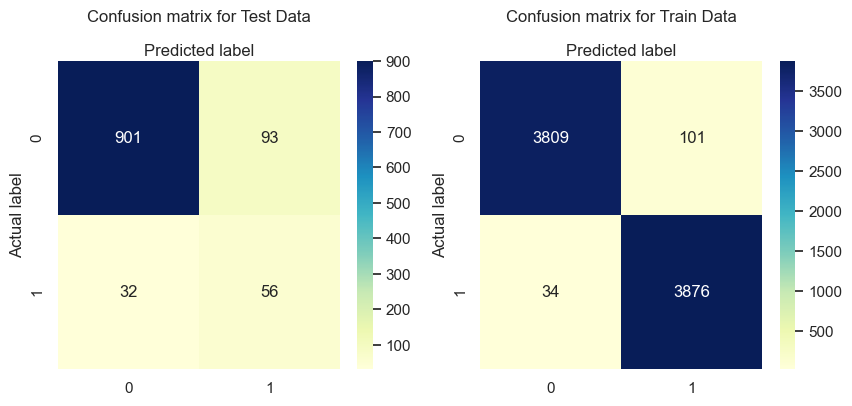

In [251]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_dt1_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_dt1_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

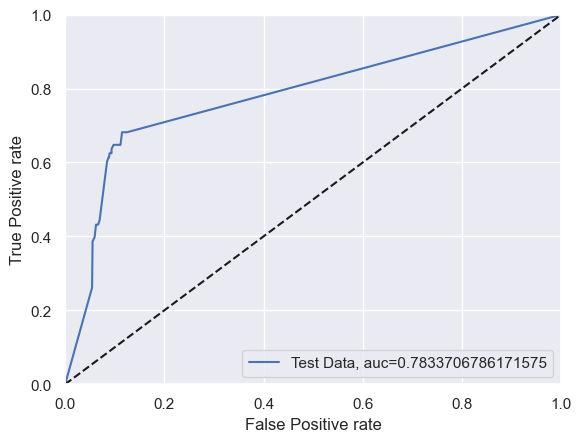

In [314]:
y_pred_proba = dt_tune.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

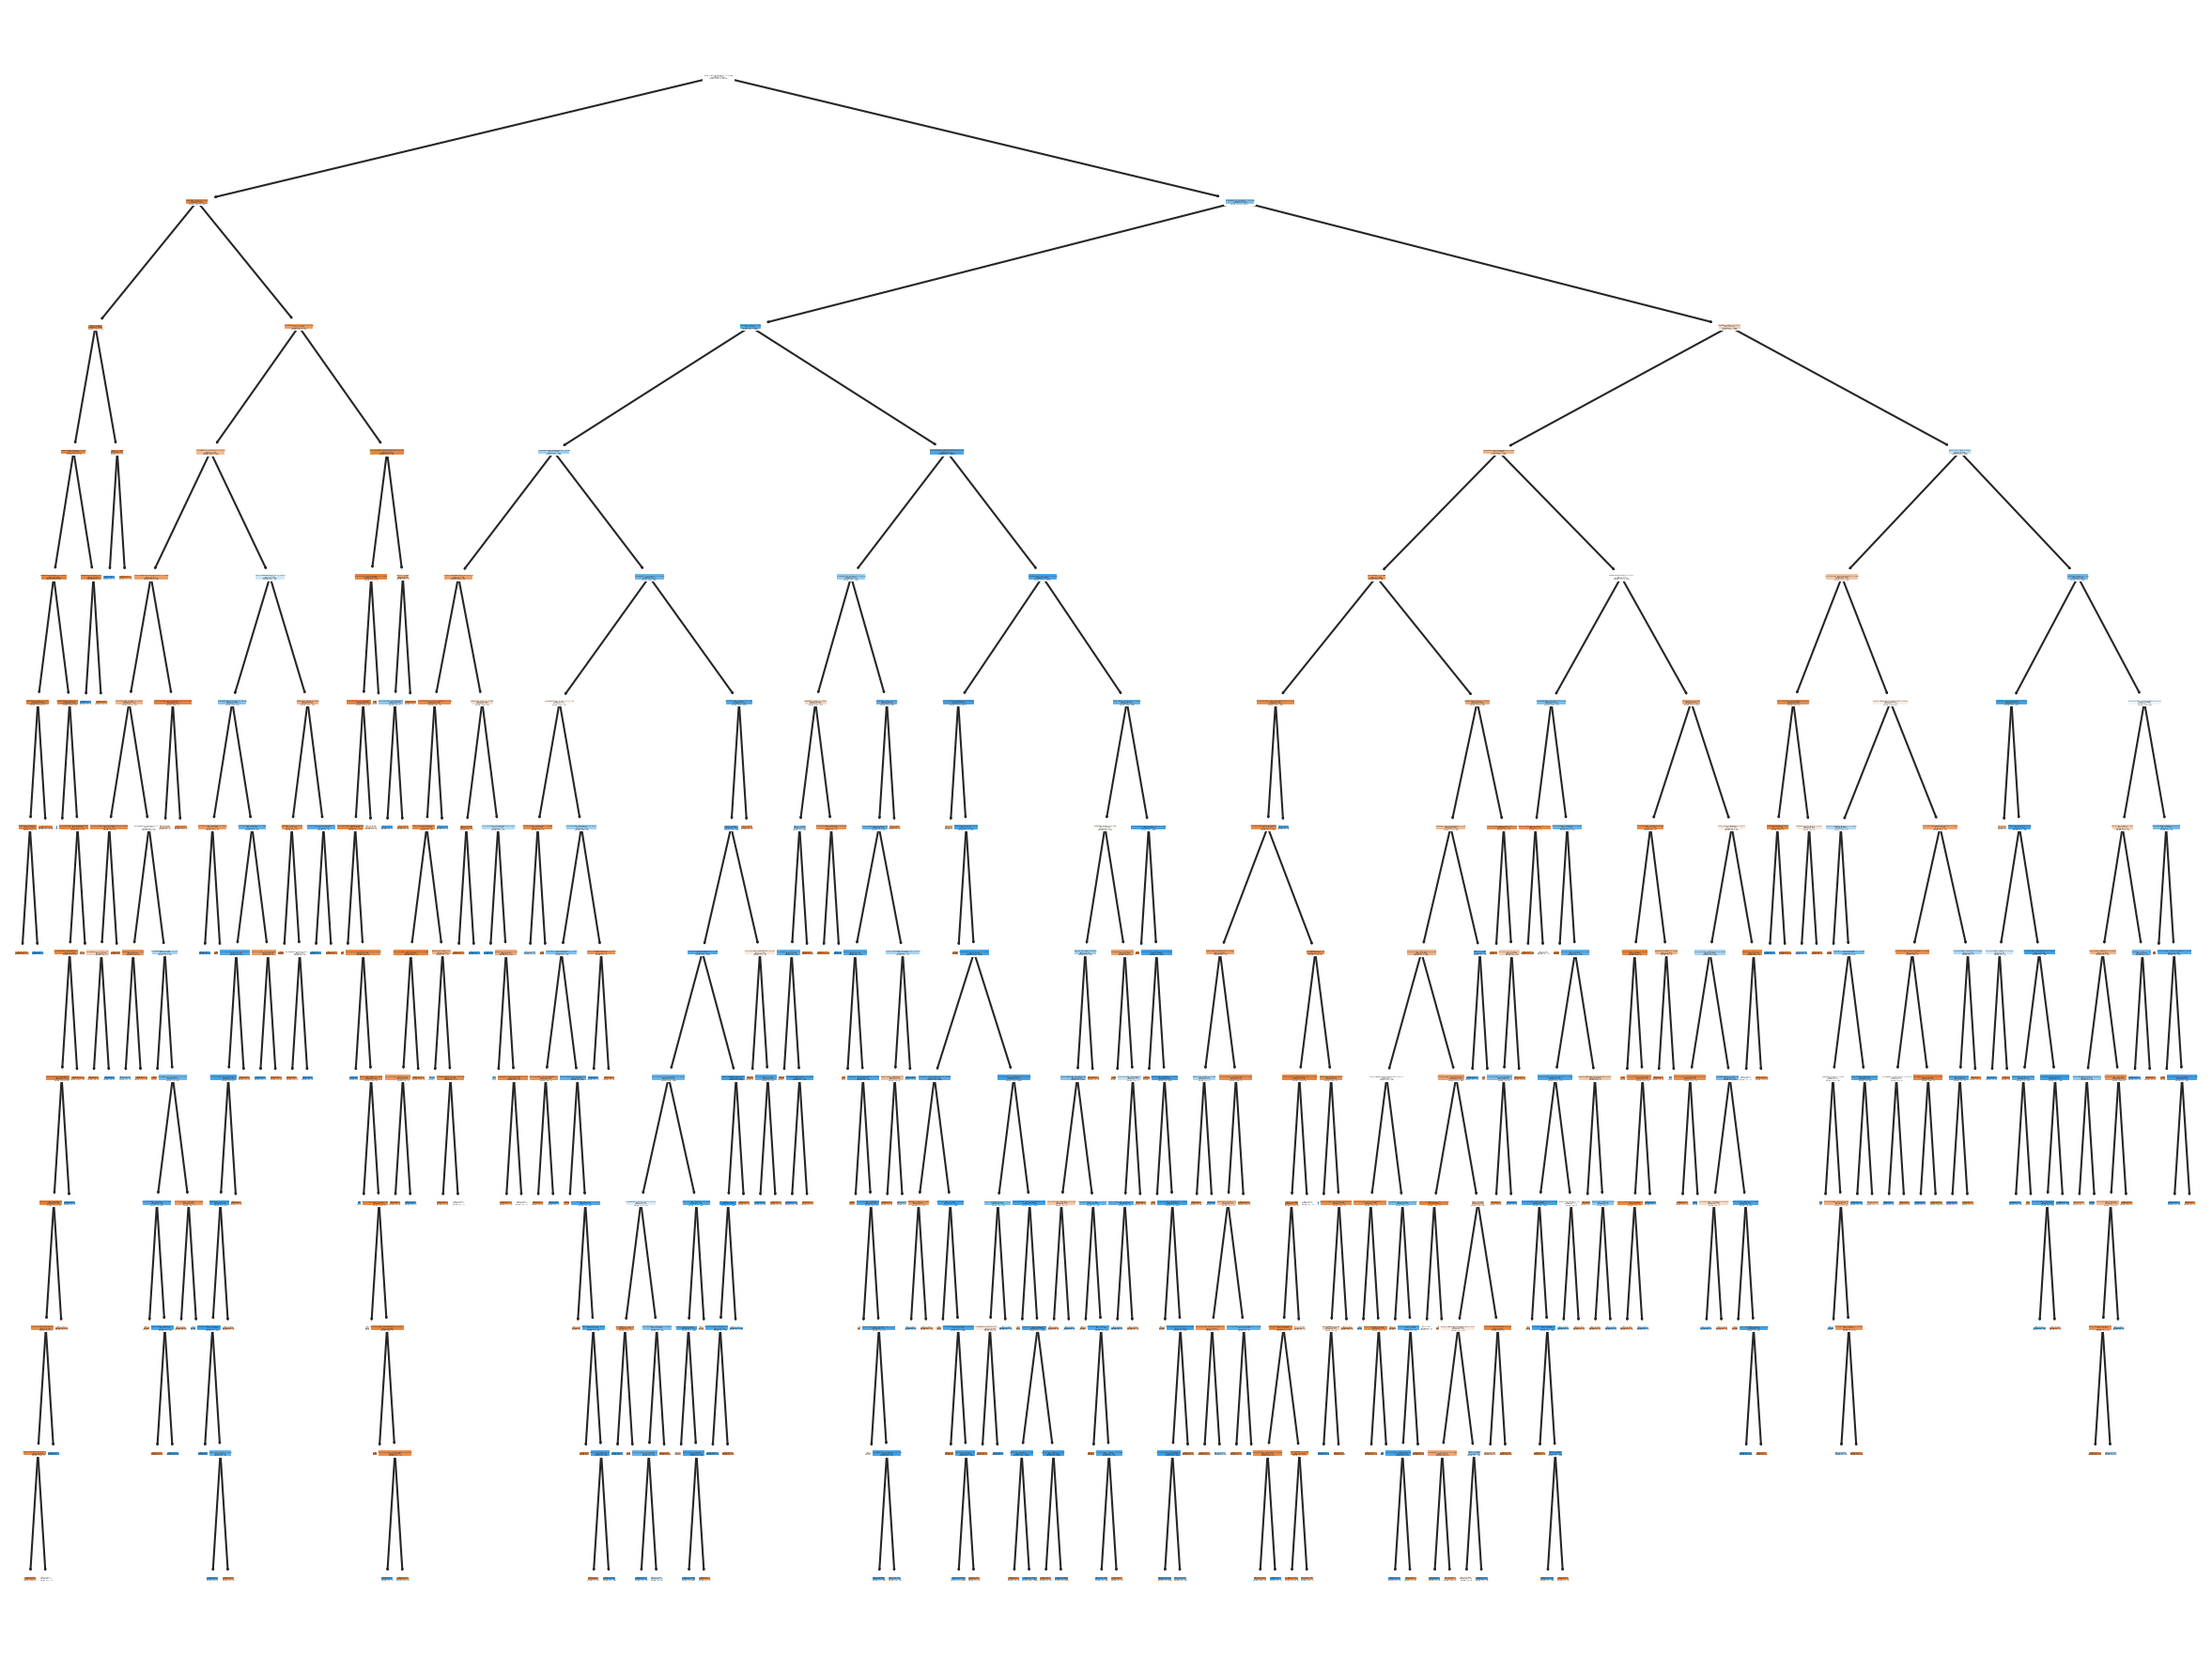

In [253]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi=150)
plot_tree(dt_tune,filled=True,feature_names=X.columns)
plt.show()

In [254]:
# plotting a depth=3 true just for understanding purpose
pruned_tree3=DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)
pruned_tree3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

In [255]:
def report_model(model):
    model_preds=model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print("\n")
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       994
         1.0       0.31      0.62      0.42        88

    accuracy                           0.86      1082
   macro avg       0.64      0.75      0.67      1082
weighted avg       0.91      0.86      0.88      1082





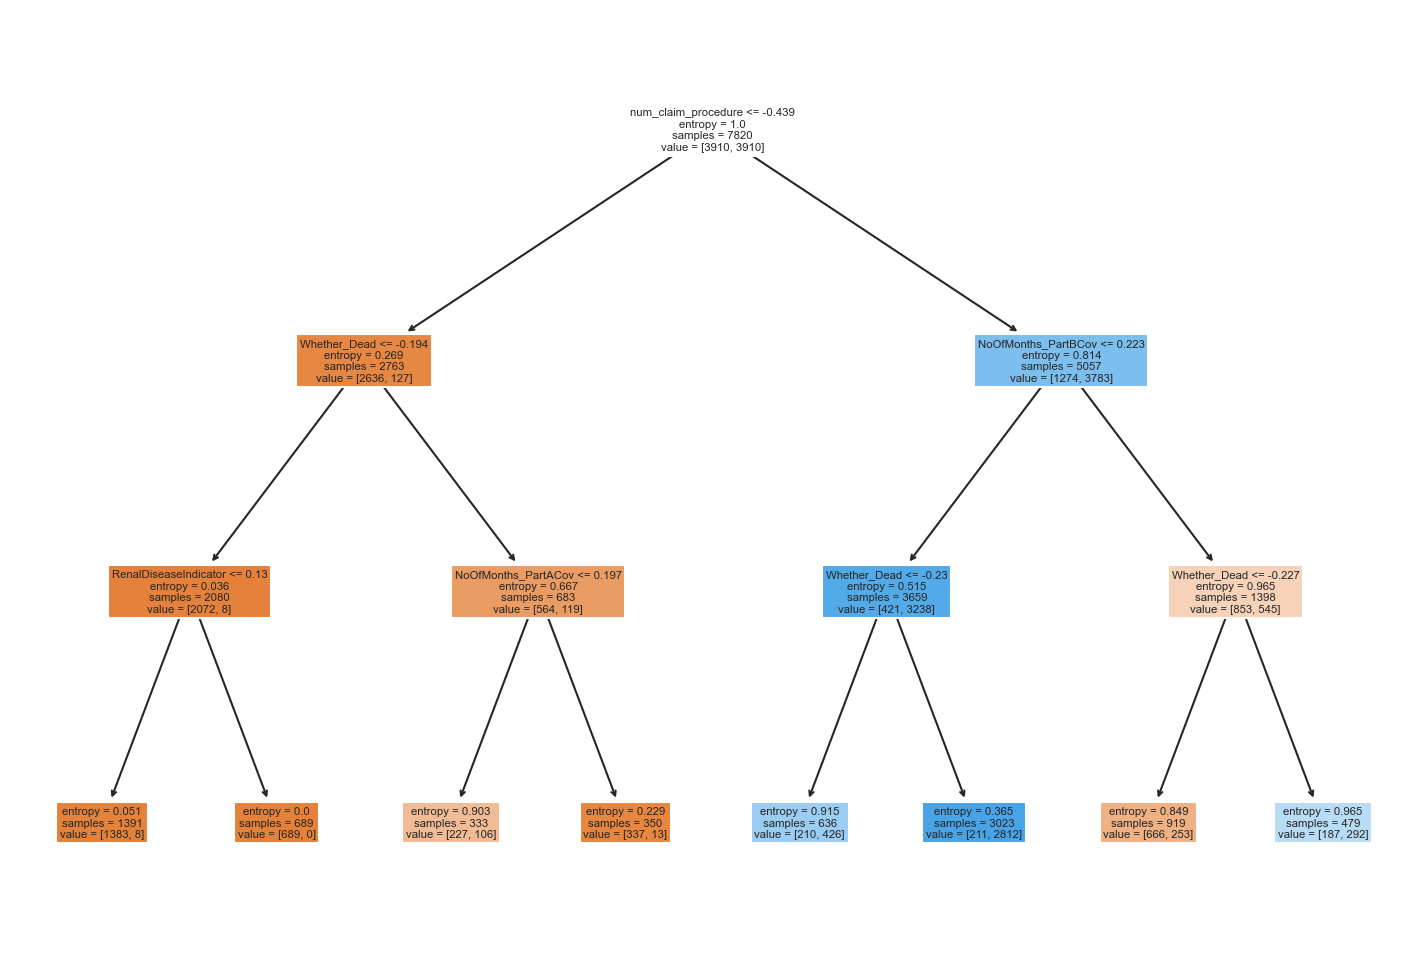

In [256]:
report_model(pruned_tree3)

In [327]:
# check feature importance
feats_imps = pd.DataFrame({'Features': X.columns, 'Importance_Model_1': dt_tune.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps
# we can see that num claim procedure is the most important feature followed by part B cpverage

Features  Importance_Model_1
0            InscClaimAmtReimbursed            0.051746
1                 DeductibleAmtPaid            0.015043
2                         AdmitDays            0.006566
3             RenalDiseaseIndicator            0.016925
4               NoOfMonths_PartACov            0.027754
5               NoOfMonths_PartBCov            0.147427
6             ChronicCond_Alzheimer            0.007580
7          ChronicCond_Heartfailure            0.008832
8         ChronicCond_KidneyDisease            0.005816
9                ChronicCond_Cancer            0.007386
10       ChronicCond_ObstrPulmonary            0.011041
11           ChronicCond_Depression            0.005234
12             ChronicCond_Diabetes            0.013642
13        ChronicCond_IschemicHeart            0.006322
14         ChronicCond_Osteoporasis            0.014040
15  ChronicCond_rheumatoidarthritis            0.005448
16               ChronicCond_stroke            0.006888
17         IPAnnualReimbursementAmt            0.007025
18            IPAnnualDeductibleAmt            0.006393
19         OPAnnualReimbursementAmt            0.011442
20            OPAnnualDeductibleAmt            0.007119
21                     Whether_Dead            0.066028
22                              Age            0.010033
23               num_claim_diagnose            0.009374
24              num_claim_procedure            0.489522
25                   physician_same            0.010720
26                  physician_count            0.006110
27                  period_of_claim            0.018544

## Model-3 Random Forest Classifier

In [273]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [274]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_rf_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_rf_test))
print('Training f1 Score:',f1_score(y_train,y_pred_rf_train))
print('Test f1 Score:',f1_score(y_test,y_pred_rf_test))

Training Accuracy Score: 1.0
Test Accuracy Score: 0.9260628465804066
Training f1 Score: 1.0
Test f1 Score: 0.5652173913043478


Text(0.5, 11.249999999999995, 'Predicted label')

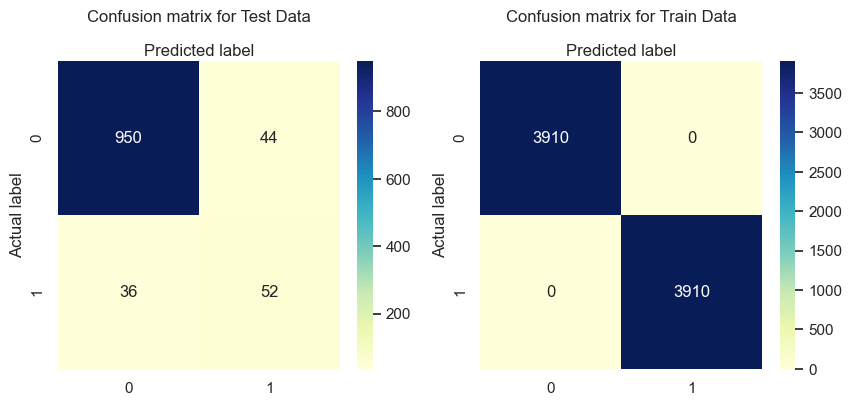

In [275]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_rf_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_rf_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

In [276]:
print(classification_report(y_test,y_pred_rf_test))
# we can see that specificicy or TNR is 56% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       994
         1.0       0.54      0.59      0.57        88

    accuracy                           0.93      1082
   macro avg       0.75      0.77      0.76      1082
weighted avg       0.93      0.93      0.93      1082



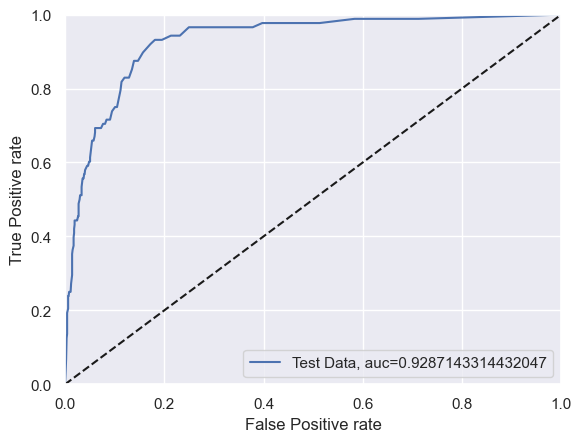

In [315]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [278]:
# Hyper parameter Optimization using gridsearchcv
fit_rf = RandomForestClassifier(random_state=101)
np.random.seed(101)
start = time.time()

param_dist_rf = {'max_depth': [11,12,13,14],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist_rf, n_jobs = 2)  
cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2'}
Time taken in grid search:  8646.43


In [279]:
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'log2'}


In [285]:
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 14,
                 bootstrap=True)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='auto',
                       random_state=101)

In [ ]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators1 = 50
max_estimators1 = 300

error_rate = {}

for i in range(min_estimators1, max_estimators1 + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [ ]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [ ]:
print('OOB Error rate for 250 trees is: {0:.5f}'.format(oob_series[250]))

In [286]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=250,
                  bootstrap = True,
                  max_depth = 5,
                  criterion = 'entropy',
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=250, random_state=101)

In [287]:
#train the RF model
fit_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       n_estimators=250, random_state=101)

In [288]:
y_pred_rf1_train=fit_rf.predict(x_train)
y_pred_rf1_test=fit_rf.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_rf1_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_rf1_test))
print('Training f1 Score:',f1_score(y_train,y_pred_rf1_train))
print('Test f1 Score:',f1_score(y_test,y_pred_rf1_test))

Training Accuracy Score: 0.9130434782608695
Test Accuracy Score: 0.8955637707948244
Training f1 Score: 0.915
Test f1 Score: 0.5311203319502075


Text(0.5, 11.249999999999995, 'Predicted label')

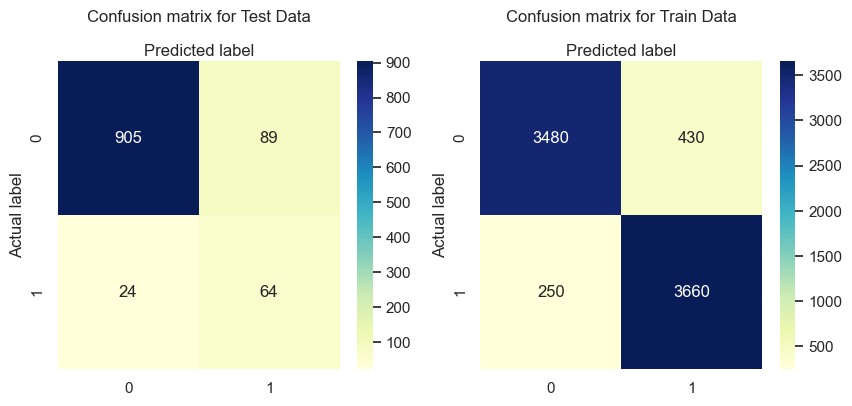

In [289]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_rf1_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_rf1_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

In [284]:
print(classification_report(y_test,y_pred_rf1_test))
# we can see that specificicy or TNR is 56% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       994
         1.0       0.53      0.56      0.54        88

    accuracy                           0.92      1082
   macro avg       0.75      0.76      0.75      1082
weighted avg       0.93      0.92      0.92      1082



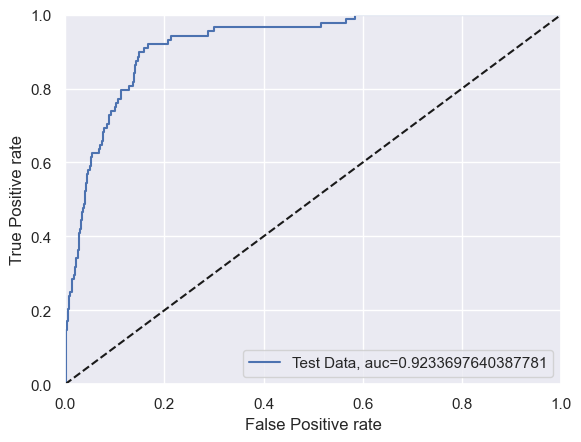

In [316]:
y_pred_proba = fit_rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

## Model-4 Bagging Classifier

In [318]:
bg=BaggingClassifier(base_estimator=dt_tune,n_estimators=100,random_state=101)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                        min_samples_split=6),
                  n_estimators=100, random_state=101)

In [319]:
y_pred_bg_train=bg.predict(x_train)
y_pred_bg_test=bg.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_bg_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_bg_test))
print('Training f1 Score:',f1_score(y_train,y_pred_bg_train))
print('Test f1 Score:',f1_score(y_test,y_pred_bg_test))

Training Accuracy Score: 0.9843989769820972
Test Accuracy Score: 0.9131238447319778
Training f1 Score: 0.9845959595959596
Test f1 Score: 0.5154639175257733


Text(0.5, 11.249999999999995, 'Predicted label')

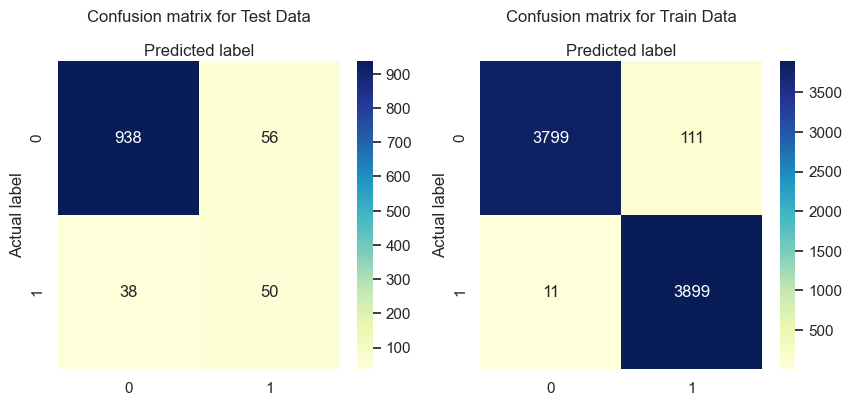

In [320]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_bg_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_bg_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

In [321]:
print(classification_report(y_test,y_pred_bg_test))
# we can see that specificicy or TNR is 56% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       994
         1.0       0.47      0.57      0.52        88

    accuracy                           0.91      1082
   macro avg       0.72      0.76      0.73      1082
weighted avg       0.92      0.91      0.92      1082



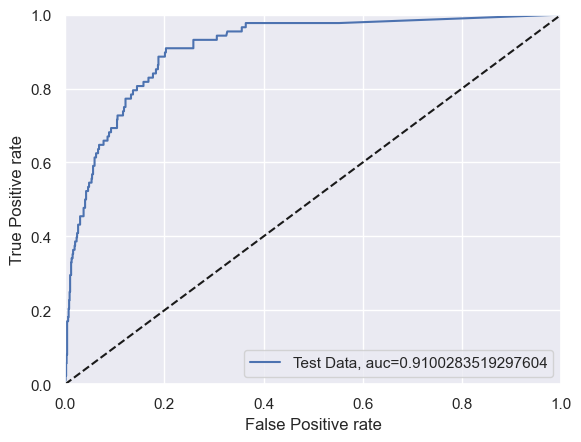

In [322]:
y_pred_proba = bg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

## Model-5 XGBoost Classifier

In [262]:
xgb=XGBClassifier(random_state=101)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=101, ...)

In [263]:
y_pred_xgb_train=xgb.predict(x_train)
y_pred_xgb_test=xgb.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_xgb_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_xgb_test))
print('Training f1 Score:',f1_score(y_train,y_pred_xgb_train))
print('Test f1 Score:',f1_score(y_test,y_pred_xgb_test))

Training Accuracy Score: 1.0
Test Accuracy Score: 0.9288354898336414
Training f1 Score: 1.0
Test f1 Score: 0.5792349726775956


Text(0.5, 11.249999999999995, 'Predicted label')

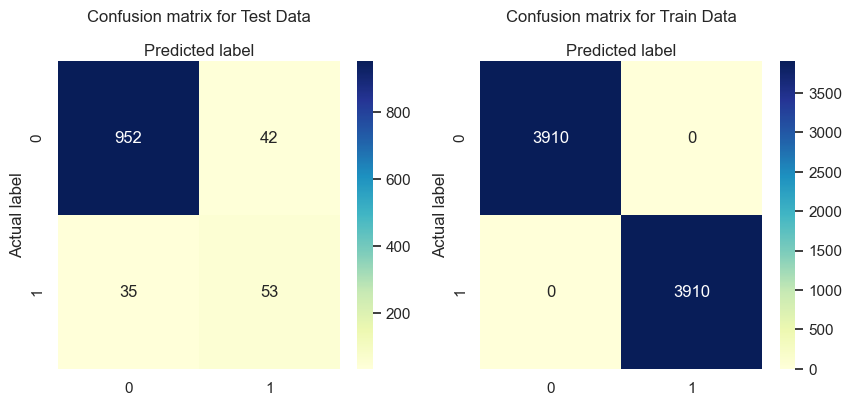

In [264]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_xgb_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_xgb_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

In [265]:
print(classification_report(y_test,y_pred_xgb_test))
# we can see that specificicy or TNR is 56% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       994
         1.0       0.56      0.60      0.58        88

    accuracy                           0.93      1082
   macro avg       0.76      0.78      0.77      1082
weighted avg       0.93      0.93      0.93      1082



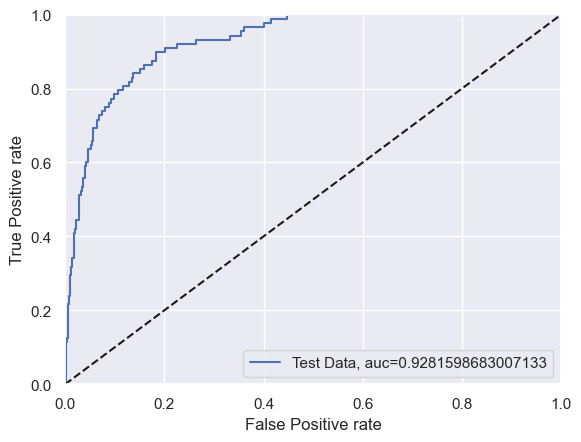

In [323]:
y_pred_proba = xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Test Data, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

## Model-6 Support Vector Machines(SVM)

In [267]:
svm=SVC(random_state=101)
svm.fit(x_train,y_train)

SVC(random_state=101)

In [268]:
y_pred_svm_train=svm.predict(x_train)
y_pred_svm_test=svm.predict(x_test)
print('Training Accuracy Score:',accuracy_score(y_train,y_pred_svm_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_pred_svm_test))
print('Training f1 Score:',f1_score(y_train,y_pred_svm_train))
print('Test f1 Score:',f1_score(y_test,y_pred_svm_test))

Training Accuracy Score: 0.8918158567774936
Test Accuracy Score: 0.8280961182994455
Training f1 Score: 0.8990935114503816
Test f1 Score: 0.42592592592592593


Text(0.5, 11.249999999999995, 'Predicted label')

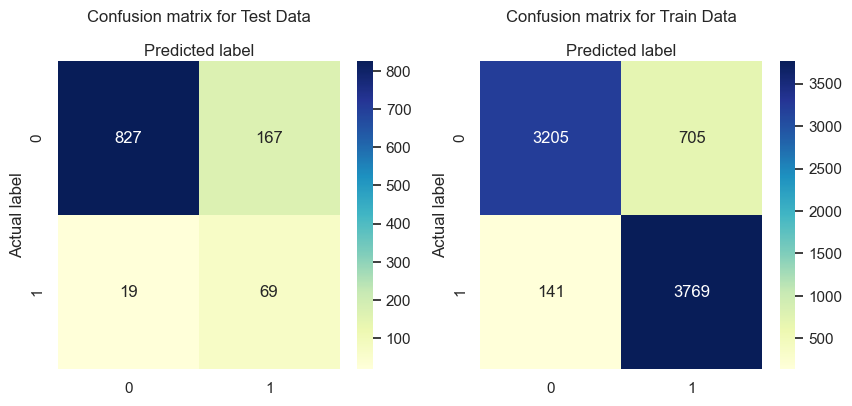

In [269]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_svm_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_pred_svm_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 69 frauds sucessfully out of 88 frauds which is quite good

In [270]:
print(classification_report(y_test,y_pred_svm_test))
# we can see that specificicy or TNR is 78% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       994
         1.0       0.29      0.78      0.43        88

    accuracy                           0.83      1082
   macro avg       0.63      0.81      0.66      1082
weighted avg       0.92      0.83      0.86      1082



0.8080414304005854


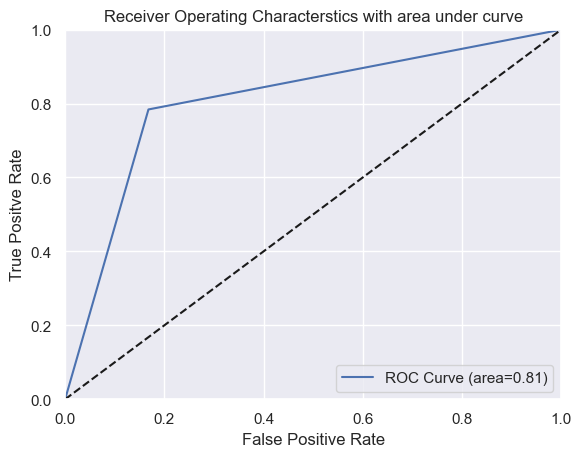

In [271]:
svm_roc_auc=roc_auc_score(y_test,y_pred_svm_test)
print(svm_roc_auc)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_svm_test)
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve (area=%0.2f)" % svm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Receiver Operating Characterstics with area under curve')
plt.legend(loc='lower right')
plt.show()

In [272]:
# with parameter tuning also model is goving same results.

## Model-7 Deep Neural Network

In [293]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input
from keras.models import Model


In [297]:
from keras.optimizers import Adam

In [294]:
inpt=Input((x_train.shape[1]))
d1=Dense(256, activation='relu')(inpt)
d2=Dense(128, activation='relu')(d1)

d3=Dense(1,activation="sigmoid")(d2)

neural_network=Model(inputs=inpt,outputs=d3)

In [300]:
neural_network.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='binary_crossentropy',metrics=["accuracy"])

history=neural_network.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
62/62 [==============================] - 1s 8ms/step - loss: 0.0863 - accuracy: 0.9715 - val_loss: 0.2929 - val_accuracy: 0.9085
Epoch 2/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0849 - accuracy: 0.9740 - val_loss: 0.2933 - val_accuracy: 0.9085
Epoch 3/300
62/62 [==============================] - 0s 8ms/step - loss: 0.0842 - accuracy: 0.9737 - val_loss: 0.2919 - val_accuracy: 0.9113
Epoch 4/300
62/62 [==============================] - 0s 7ms/step - loss: 0.0836 - accuracy: 0.9738 - val_loss: 0.2919 - val_accuracy: 0.9104
Epoch 5/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0825 - accuracy: 0.9742 - val_loss: 0.3005 - val_accuracy: 0.9057
Epoch 6/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.3014 - val_accuracy: 0.9076
Epoch 7/300
62/62 [==============================] - 0s 7ms/step - loss: 0.0808 - accuracy: 0.9743 - val_loss: 0.2939 - val_accuracy: 0.9113
Epoch 8/300
6

Epoch 59/300
62/62 [==============================] - 0s 7ms/step - loss: 0.0452 - accuracy: 0.9885 - val_loss: 0.3534 - val_accuracy: 0.9104
Epoch 60/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 0.3487 - val_accuracy: 0.9168
Epoch 61/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9889 - val_loss: 0.3518 - val_accuracy: 0.9150
Epoch 62/300
62/62 [==============================] - 0s 6ms/step - loss: 0.0437 - accuracy: 0.9891 - val_loss: 0.3563 - val_accuracy: 0.9122
Epoch 63/300
62/62 [==============================] - 0s 7ms/step - loss: 0.0433 - accuracy: 0.9891 - val_loss: 0.3609 - val_accuracy: 0.9131
Epoch 64/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.3507 - val_accuracy: 0.9177
Epoch 65/300
62/62 [==============================] - 0s 7ms/step - loss: 0.0427 - accuracy: 0.9890 - val_loss: 0.3588 - val_accuracy: 0.9122
Epoch 

62/62 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.5592 - val_accuracy: 0.9205
Epoch 174/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.9990 - val_loss: 0.5665 - val_accuracy: 0.9214
Epoch 175/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 0.5669 - val_accuracy: 0.9205
Epoch 176/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.5647 - val_accuracy: 0.9214
Epoch 177/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.5658 - val_accuracy: 0.9224
Epoch 178/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9992 - val_loss: 0.5690 - val_accuracy: 0.9205
Epoch 179/300
62/62 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.5734 - val_accuracy: 0.9205
Epoch 180/300

62/62 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.7977 - val_accuracy: 0.9177
Epoch 288/300
62/62 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7928 - val_accuracy: 0.9205
Epoch 289/300
62/62 [==============================] - 0s 6ms/step - loss: 9.7777e-04 - accuracy: 1.0000 - val_loss: 0.7935 - val_accuracy: 0.9187
Epoch 290/300
62/62 [==============================] - 0s 6ms/step - loss: 9.2861e-04 - accuracy: 1.0000 - val_loss: 0.7956 - val_accuracy: 0.9187
Epoch 291/300
62/62 [==============================] - 0s 7ms/step - loss: 9.0621e-04 - accuracy: 1.0000 - val_loss: 0.7959 - val_accuracy: 0.9187
Epoch 292/300
62/62 [==============================] - 0s 6ms/step - loss: 8.9525e-04 - accuracy: 1.0000 - val_loss: 0.7962 - val_accuracy: 0.9187
Epoch 293/300
62/62 [==============================] - 0s 6ms/step - loss: 8.7456e-04 - accuracy: 1.0000 - val_loss: 0.7967 - val_accuracy: 

In [301]:
y_nn_pred_train=neural_network.predict(x_train)
y_nn_pred_train=np.round(y_nn_pred_train)

y_nn_pred_test=neural_network.predict(x_test)
y_nn_pred_test=np.round(y_nn_pred_test)

print('Training Accuracy Score:',accuracy_score(y_train,y_nn_pred_train))
print('Test Accuracy Score:',accuracy_score(y_test,y_nn_pred_test))

print('Training f1 Score:',f1_score(y_train,y_nn_pred_train))
print('Test f1 Score:',f1_score(y_test,y_nn_pred_test))

34/34 [==============================] - 0s 3ms/step
Training Accuracy Score: 1.0
Test Accuracy Score: 0.9186691312384473
Training f1 Score: 1.0
Test f1 Score: 0.5111111111111111


Text(0.5, 11.249999999999995, 'Predicted label')

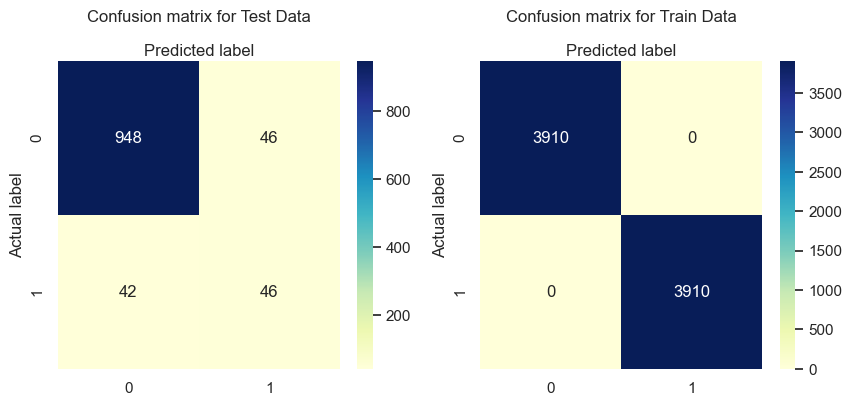

In [302]:
# plot confusion Matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(1,2,figsize=(10,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_nn_pred_test)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[0])
ax[0].xaxis.set_label_position("top")
ax[0].set_title('Confusion matrix for Test Data', y=1.1)
ax[0].set_ylabel('Actual label')
ax[0].set_xlabel('Predicted label')

sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_nn_pred_train)), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[1])
ax[1].xaxis.set_label_position("top")
ax[1].set_title('Confusion matrix for Train Data', y=1.1)
ax[1].set_ylabel('Actual label')
ax[1].set_xlabel('Predicted label')
# we are able to predict 49 frauds sucessfully out of 88 frauds which is lesser than logit model.

In [303]:
print(classification_report(y_test,y_nn_pred_test))
# we can see that specificicy or TNR is 56% whcih is the ideal metrics in our case to judge our model as we are 
# most concerned about identifying the fraud cases

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       994
         1.0       0.50      0.52      0.51        88

    accuracy                           0.92      1082
   macro avg       0.73      0.74      0.73      1082
weighted avg       0.92      0.92      0.92      1082



In [335]:
from sklearn.metrics import precision_score,recall_score

In [334]:
models = [logit,dt_tune,rf,bg,xgb,svm]

accuracy = []
precision = []
recall = []
f1 = []
yhut=[]
# loop through each model
for model in models:
    # make predictions on the test data
    y_pred = model.predict(x_test)
    # calculate the metric scores and append them to the corresponding list
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    #print(model)
metric_scores = {'Model': ['Logistic Regression','Decision Tree','Random Forest','Bagging','Xg Boost','SVM'],
                 'Accuracy': accuracy,
                 'Precision': precision,
                 'Recall': recall,
                 'F1-Score': f1
                }

# create a Pandas DataFrame from the dictionary
data = pd.DataFrame(metric_scores)
data

Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.760628   0.184502  0.568182  0.278552
1        Decision Tree  0.884473   0.375839  0.636364  0.472574
2        Random Forest  0.926063   0.541667  0.590909  0.565217
3              Bagging  0.913124   0.471698  0.568182  0.515464
4             Xg Boost  0.928835   0.557895  0.602273  0.579235
5                  SVM  0.828096   0.292373  0.784091  0.425926

### Best model is SVM as ot is able  to predict most fraud cases our model seems to catch a lot of the fraudulent cases. The number of normal transactions classified as frauds is really high. Based on business decision ,one can set threshold to create a tradeoff between Fraud and Non Fraud class predictions. Adding More data time to time and training will improve the performance of detection of new fraud patterns and help us to understand Providers fradulent behaviour. practically speaking we are able to predict 69 frauds out of 88 frauds in x_test.

## Business Recommendation and Improvement

### 1) Above model will help in predicting Provider fraud ,which will be helpful for insurance companies to scrutinize claims thoroughly.
### 2) Further improvement in the project will help Government to take decision against fradulent health providers and  will help in ammending rules and regulations in this domain.
### 3) Improvement in the model will help in detecting networks of fraud Physicians,Providers and Beneficiaries.
### 4) This type of project will help in improving health of economy by reducing inflation caused by fraud peers and  lowering down insurance premiums which will certainly not cause health to become costly affair.

In [ ]:
Provider_fraud_test=svm.predict(test_alldata)

In [ ]:
test_alldata['Provider_fraud_test']=Provider_fraud_test

In [344]:
test_alldata.head()  # we can see the ;ast target column added

InscClaimAmtReimbursed  DeductibleAmtPaid  AdmitDays  \
0              262.390244           1.853659   0.000000   
1              301.176471           0.000000   0.000000   
2              698.205128          31.743590   0.205128   
3             1699.473684         140.526316   0.763158   
4              324.315789           3.526316   0.000000   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0               0.156098            11.824390            12.000000   
1               0.098039            12.000000            12.000000   
2               0.307692            12.000000            12.000000   
3               0.131579            11.684211            11.684211   
4               0.215789            11.747368            11.978947   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0               0.385366                  0.526829                   0.351220   
1               0.343137                  0.676471                   0.490196   
2               0.205128                  0.435897                   0.487179   
3               0.552632                  0.605263                   0.500000   
4               0.384211                  0.573684                   0.489474   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0            0.121951                    0.312195                0.443902   
1            0.147059                    0.362745                0.519608   
2            0.025641                    0.384615                0.333333   
3            0.184211                    0.342105                0.473684   
4            0.131579                    0.321053                0.452632   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0              0.717073                   0.736585                  0.297561   
1              0.705882                   0.764706                  0.254902   
2              0.743590                   0.794872                  0.512821   
3              0.736842                   0.736842                  0.368421   
4              0.768421                   0.710526                  0.300000   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                         0.263415            0.092683   
1                         0.156863            0.078431   
2                         0.102564            0.076923   
3                         0.263158            0.131579   
4                         0.231579            0.068421   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0               5180.926829             548.253659               2345.073171   
1               3767.549020             479.647059               2401.666667   
2               3004.102564             246.461538               2441.025641   
3               5268.421053             534.000000               1775.789474   
4               4738.947368             534.000000               2812.947368   

   OPAnnualDeductibleAmt  Whether_Dead        Age  num_claim_diagnose  \
0             677.951220      0.014634  72.368780            2.878049   
1             605.882353      0.000000  74.806863            3.019608   
2             646.410256      0.000000  69.628205            3.256410   
3             663.947368      0.000000  75.292105            3.447368   
4             826.105263      0.010526  73.392632            2.868421   

   num_claim_procedure  physician_same  physician_count  period_of_claim  \
0             0.000000        2.858537         1.521951         1.980488   
1             0.000000        2.509804         1.607843         3.088235   
2             0.076923        2.512821         1.538462         3.589744   
3             0.078947        2.973684         1.500000         2.184211   
4             0.000000        2.757895         1.536842         2.389474   

   Provider_fraud_test  
0                  0.0  
1                  0